In [5]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import geopandas as gpd
from shapely.geometry import Point

In [15]:
point = gpd.GeoDataFrame(geometry=[Point([37.623941, 55.770445]), Point([37.606467, 55.768714])])

<AxesSubplot:>

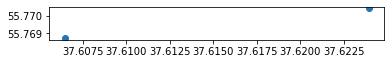

In [16]:
point.plot()

In [17]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

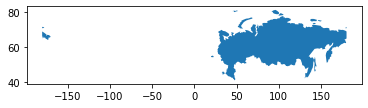

In [23]:
# world.plot();
russia = world.query('name == "Russia"')
russia.plot();

In [2]:
import pickle
import pandas as pd
with open('banki.ru_atms_fullInfo.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)

In [3]:
df = pd.DataFrame(data)

In [4]:
df['coord'] = f"{df['longitude']}, {df['latitude']}"

In [41]:
# point = gpd.GeoDataFrame(geometry=[Point(x, y) for x, y in df['longitude'], df['latitude']])
    
#     Point([df['longitude'], df['latitude']])])

In [42]:
pip install urllib2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement urllib2 (from versions: none)
ERROR: No matching distribution found for urllib2


In [49]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from geopy.geocoders import Nominatim
import time
from pprint import pprint

In [6]:
app = Nominatim(user_agent="tutorial")

In [46]:
import numpy as np

In [13]:
def get_address_by_location(latitude, longitude, language="en"):
    """This function returns an address as raw from a location
    will repeat until success"""
    # build coordinates string to pass to reverse() function
    coordinates = f"{latitude}, {longitude}"
    # sleep for a second to respect Usage Policy
    time.sleep(1)
    try:
        return app.reverse(coordinates, language=language).raw
    except:
        return get_address_by_location(latitude, longitude)
    


In [55]:
# df = pd.read_csv('data_with_OSM.csv').tail(4746)
# 8345 - 5378
# len(cities)
# len(cities_1) + len(cities_2)
# 8345-5377
# df.tail(2969)

In [56]:
df = pd.read_csv('data_with_OSM.csv').tail(2969)
d = list(zip(df['lat'], df['lng']))

id = []
id_r = []

cities, regions, states = [], [], []
for i, item in enumerate(d):
    address = get_address_by_location(*item)
    pprint(address)
    try:
        cities.append(address['address']['city'])
    except KeyError:
        try:
            cities.append(address['address']['town'])
        except KeyError:
            try:
                cities.append(address['address']['village'])
            except:
                try:
                    cities.append(address['address']['hamlet'])
                except:
                    try:
                        cities.append(address['address']['municipality'])
                    except:
                        cities.append(address['address']['county'])
                        id.append(i)
                        
    try:
        regions.append(address['address']['region'])
    except:
        regions.append(np.nan)
        id_r.append(i)
    
    states.append(address['address']['state'])
#     pprint(address)
#     print(*item)

df['city'], df['regions'], df['states']  = cities, regions, states

{'address': {'city': 'Зелёновское сельское поселение',
             'country': 'Ukraine',
             'country_code': 'ua',
             'county': 'Bakhchysarai Raion',
             'postcode': '98473',
             'state': 'Republic of Crimea',
             'village': 'Nahirne'},
 'boundingbox': ['44.5794023', '44.5801625', '33.9914764', '33.9922536'],
 'display_name': 'Nahirne, Зелёновское сельское поселение, Bakhchysarai Raion, '
                 'Republic of Crimea, 98473, Ukraine',
 'lat': '44.579850077040454',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '33.99179580952928',
 'osm_id': 291979714,
 'osm_type': 'way',
 'place_id': 175720136}
{'address': {'ISO3166-2-lvl4': 'RU-YAR',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Yaroslavsky District',
             'house_number': 'С1',
             'municipality': 'Заволжское сельское поселение',
             'postcode': '

{'address': {'ISO3166-2-lvl4': 'RU-IVA',
             'city': 'Ivanovo',
             'city_district': 'Ленинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Ivanovo',
             'house_number': '36',
             'postcode': '153000',
             'region': 'Central Federal District',
             'road': 'проспект Ленина',
             'state': 'Ivanovo Oblast'},
 'boundingbox': ['56.9984221', '56.9986606', '40.9743786', '40.974815'],
 'display_name': '36, проспект Ленина, Ленинский район, Ivanovo, Ivanovo '
                 'Oblast, Central Federal District, 153000, Russia',
 'lat': '56.998540199999994',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '40.97459573698141',
 'osm_id': 464537247,
 'osm_type': 'way',
 'place_id': 209476597}
{'address': {'ISO3166-2-lvl4': 'RU-IVA',
             'city': 'Ivanovo',
             'city_district': 'Ленинский район',
        

{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'city': 'Dolgoprudny',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Dolgoprudny',
             'house_number': '9',
             'neighbourhood': 'посёлок Краснополянской сельхозшколы',
             'postcode': '141707',
             'region': 'Central Federal District',
             'road': 'проспект Пацаева',
             'state': 'Moscow Oblast',
             'suburb': 'Водники'},
 'boundingbox': ['55.9476758', '55.9481314', '37.4986603', '37.4995448'],
 'display_name': '9, проспект Пацаева, посёлок Краснополянской сельхозшколы, '
                 'Водники, Dolgoprudny, Moscow Oblast, Central Federal '
                 'District, 141707, Russia',
 'lat': '55.9479015',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.49928371199104',
 'osm_id': 7161165,
 'osm_type': 'relation',
 'place_id': 298903809}
{'address': {'ISO31

{'address': {'ISO3166-2-lvl4': 'RU-BEL',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Valuysky District',
             'postcode': '309990',
             'quarter': 'Соцгородок',
             'region': 'Central Federal District',
             'state': 'Belgorod Oblast',
             'town': 'Valuyki'},
 'boundingbox': ['50.1777826', '50.1785042', '38.1214574', '38.1236454'],
 'display_name': 'Соцгородок, Valuyki, Valuysky District, Belgorod Oblast, '
                 'Central Federal District, 309990, Russia',
 'lat': '50.17817487961909',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '38.122456027033',
 'osm_id': 85830580,
 'osm_type': 'way',
 'place_id': 124708801}
{'address': {'ISO3166-2-lvl4': 'RU-KHA',
             'city': 'Komsomolsk-on-Amur',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Komsomolsk-on-Amur',
             'ho

{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'city': 'Vladivostok',
             'city_district': 'Ленинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Владивостокский городской округ',
             'house_number': '51',
             'postcode': '690109',
             'region': 'Far Eastern Federal District',
             'road': 'Neybut Street',
             'state': 'Primorsky Krai'},
 'boundingbox': ['43.1121049', '43.1131888', '131.9612569', '131.9615298'],
 'display_name': '51, Neybut Street, Ленинский район, Vladivostok, '
                 'Владивостокский городской округ, Primorsky Krai, Far Eastern '
                 'Federal District, 690109, Russia',
 'lat': '43.112762599999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '131.96135226027417',
 'osm_id': 81902276,
 'osm_type': 'way',
 'place_id': 123970773}
{'address': {'ISO3166-2-lvl4': 'RU-KEM

{'address': {'ISO3166-2-lvl4': 'RU-KEM',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Belovsky Urban Okrug',
             'house_number': '5',
             'postcode': '652615',
             'region': 'Siberian Federal District',
             'road': 'Юбилейная улица',
             'state': 'Kemerovo Oblast–Kuzbass',
             'town': 'Belovo'},
 'boundingbox': ['54.4110593', '54.4112062', '86.3104413', '86.3115084'],
 'display_name': '5, Юбилейная улица, Belovo, Belovsky Urban Okrug, Kemerovo '
                 'Oblast–Kuzbass, Siberian Federal District, 652615, Russia',
 'lat': '54.41113275',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '86.31097487192278',
 'osm_id': 95141607,
 'osm_type': 'way',
 'place_id': 126944124}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
           

{'address': {'ISO3166-2-lvl4': 'RU-KIR',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Слободской',
             'house_number': '10',
             'postcode': '613150',
             'region': 'Volga Federal District',
             'road': 'улица Грина',
             'shop': 'Глобус',
             'state': 'Kirov Oblast',
             'town': 'Slobodskoy'},
 'boundingbox': ['58.7237902', '58.7240114', '50.1801785', '50.1812201'],
 'display_name': 'Глобус, 10, улица Грина, Slobodskoy, городской округ '
                 'Слободской, Kirov Oblast, Volga Federal District, 613150, '
                 'Russia',
 'lat': '58.7239007',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '50.18069930524713',
 'osm_id': 142395114,
 'osm_type': 'way',
 'place_id': 138339151}
{'address': {'ISO3166-2-lvl4': 'RU-KIR',
             'city': 'Kirov',
             'city_district': 'Перво

{'address': {'ISO3166-2-lvl4': 'RU-STA',
             'city': 'Stavropol',
             'city_district': 'Промышленный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Stavropol',
             'house_number': '11',
             'postcode': '355000',
             'region': 'North Caucasian Federal District',
             'road': 'улица Бруснева',
             'state': 'Stavropol Krai',
             'suburb': 'Северо-Западный'},
 'boundingbox': ['45.0645776', '45.064781', '41.9308795', '41.9320401'],
 'display_name': '11, улица Бруснева, Северо-Западный, Промышленный район, '
                 'Stavropol, Stavropol Krai, North Caucasian Federal District, '
                 '355000, Russia',
 'lat': '45.0646793',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '41.9314598',
 'osm_id': 91229417,
 'osm_type': 'way',
 'place_id': 125122444}
{'address': {'ISO3166-2-lvl4': 'RU-KAM',


{'address': {'ISO3166-2-lvl4': 'RU-CHE',
             'city': 'Chelyabinsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Chelyabinsk',
             'house_number': '1',
             'postcode': '454084',
             'region': 'Ural Federal District',
             'road': 'улица Кирова',
             'state': 'Chelyabinsk Oblast',
             'suburb': 'Kalininskiy District'},
 'boundingbox': ['55.182399', '55.1836473', '61.3996152', '61.3999871'],
 'display_name': '1, улица Кирова, Kalininskiy District, Chelyabinsk, '
                 'Chelyabinsk Oblast, Ural Federal District, 454084, Russia',
 'lat': '55.1830232',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '61.399837928329774',
 'osm_id': 59176629,
 'osm_type': 'way',
 'place_id': 120755270}
{'address': {'ISO3166-2-lvl4': 'RU-CHE',
             'city': 'Chelyabinsk',
             'country': 'Russia',
             'coun

{'address': {'ISO3166-2-lvl4': 'RU-PNZ',
             'city': 'Penza',
             'city_district': 'Железнодорожный район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '71',
             'postcode': '440000',
             'region': 'Volga Federal District',
             'road': 'ulitsa Kirova',
             'state': 'Penza Oblast',
             'suburb': 'Стрела'},
 'boundingbox': ['53.1969873', '53.1978546', '45.020511', '45.0210714'],
 'display_name': '71, ulitsa Kirova, Стрела, Железнодорожный район, Penza, '
                 'Penza Oblast, Volga Federal District, 440000, Russia',
 'lat': '53.1973933',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '45.020737030852985',
 'osm_id': 37523691,
 'osm_type': 'way',
 'place_id': 115498326}
{'address': {'ISO3166-2-lvl4': 'RU-PNZ',
             'city': 'Penza',
             'city_district': 'Железнодорожный район',
         

{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'city': 'Novosibirsk',
             'city_district': 'Ленинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Novosibirsk',
             'house_number': '7',
             'postcode': '630048',
             'region': 'Siberian Federal District',
             'road': 'Karl Marx square',
             'shop': 'Сан Сити',
             'state': 'Novosibirsk Oblast'},
 'boundingbox': ['54.979692', '54.9809593', '82.8969104', '82.8990928'],
 'display_name': 'Сан Сити, 7, Karl Marx square, Ленинский район, Novosibirsk, '
                 'Novosibirsk Oblast, Siberian Federal District, 630048, '
                 'Russia',
 'lat': '54.98019025000001',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '82.8979176007924',
 'osm_id': 89548074,
 'osm_type': 'way',
 'place_id': 125195153}
{'address': {'ISO3166-2-lvl4': 'RU-KHA',
       

{'address': {'ISO3166-2-lvl4': 'RU-KGD',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Zelenogradsky District',
             'house_number': '5',
             'postcode': '238530',
             'region': 'Northwestern Federal District',
             'road': 'Окружная улица',
             'shop': 'Виктория',
             'state': 'Kaliningrad',
             'suburb': 'Vishnyovoye',
             'town': 'Zelenogradsk'},
 'boundingbox': ['54.9557759', '54.9562794', '20.4871338', '20.4880185'],
 'display_name': 'Виктория, 5, Окружная улица, Vishnyovoye, Zelenogradsk, '
                 'Zelenogradsky District, Kaliningrad, Northwestern Federal '
                 'District, 238530, Russia',
 'lat': '54.9560277',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '20.487576151419503',
 'osm_id': 174717157,
 'osm_type': 'way',
 'place_id': 146384617}
{'address': {'ISO3166-2-lvl4': 'RU-NIZ'

{'address': {'ISO3166-2-lvl4': 'RU-AST',
             'city': 'Astrakhan',
             'city_district': 'Sovetsky District',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Astrakhan',
             'house_number': '22/20',
             'postcode': '414024',
             'region': 'Southern Federal District',
             'road': 'улица Богдана Хмельницкого',
             'state': 'Astrakhan Oblast'},
 'boundingbox': ['46.3349761', '46.3353971', '48.0170683', '48.0176164'],
 'display_name': '22/20, улица Богдана Хмельницкого, Sovetsky District, '
                 'Astrakhan, Astrakhan Oblast, Southern Federal District, '
                 '414024, Russia',
 'lat': '46.33526565',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '48.01743606121046',
 'osm_id': 125295230,
 'osm_type': 'way',
 'place_id': 134327821}
{'address': {'ISO3166-2-lvl4': 'RU-AST',
             'city': 'Astrakhan

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '97',
             'postcode': '129085',
             'region': 'Central Federal District',
             'road': 'Проспект Мира (дублёр)',
             'state': 'Moscow',
             'suburb': 'Ostankinsky District'},
 'boundingbox': ['55.8083037', '55.8098424', '37.6361275', '37.6366009'],
 'display_name': '97, Проспект Мира (дублёр), Ostankinsky District, Moscow, '
                 'Central Federal District, 129085, Russia',
 'lat': '55.8090817',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.636363030438574',
 'osm_id': 27873300,
 'osm_type': 'way',
 'place_id': 111883590}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '97',
    

{'address': {'ISO3166-2-lvl4': 'RU-SAR',
             'city': 'Saratov',
             'city_district': 'Октябрьский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '51',
             'postcode': '410000',
             'region': 'Volga Federal District',
             'road': 'Sovetskaya Street',
             'state': 'Saratov Oblast',
             'suburb': 'Первомайский'},
 'boundingbox': ['51.5295438', '51.5297511', '46.0179868', '46.0184222'],
 'display_name': '51, Sovetskaya Street, Первомайский, Октябрьский район, '
                 'Saratov, Saratov Oblast, Volga Federal District, 410000, '
                 'Russia',
 'lat': '51.52964745',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '46.01820450893423',
 'osm_id': 165330164,
 'osm_type': 'way',
 'place_id': 143684026}
{'address': {'ISO3166-2-lvl4': 'RU-NIZ',
             'city': 'Nizhny Novgorod',
            

{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'city': 'Artyom',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Артёмовский городской округ',
             'house_number': '72',
             'postcode': '692700',
             'region': 'Far Eastern Federal District',
             'road': 'улица Кирова',
             'state': 'Primorsky Krai'},
 'boundingbox': ['43.3612331', '43.3618401', '132.2097405', '132.2107851'],
 'display_name': '72, улица Кирова, Artyom, Артёмовский городской округ, '
                 'Primorsky Krai, Far Eastern Federal District, 692700, Russia',
 'lat': '43.361592200000004',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '132.21036840124205',
 'osm_id': 129145697,
 'osm_type': 'way',
 'place_id': 135215301}
{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Dmitrovsk

{'address': {'ISO3166-2-lvl4': 'RU-SAR',
             'city': 'Engels',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Engelssky District',
             'house_number': '1',
             'municipality': 'городское поселение Энгельс',
             'postcode': '413100',
             'region': 'Volga Federal District',
             'road': 'улица Волоха',
             'state': 'Saratov Oblast'},
 'boundingbox': ['51.4937368', '51.4943559', '46.1222242', '46.1229449'],
 'display_name': '1, улица Волоха, Engels, городское поселение Энгельс, '
                 'Engelssky District, Saratov Oblast, Volga Federal District, '
                 '413100, Russia',
 'lat': '51.494006',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '46.12254406106912',
 'osm_id': 91511070,
 'osm_type': 'way',
 'place_id': 126031834}
{'address': {'ISO3166-2-lvl4': 'RU-BRY',
             'city': 'Bryansk',
      

{'address': {'ISO3166-2-lvl4': 'RU-IRK',
             'amenity': 'VTB',
             'city': 'Irkutsk',
             'city_district': 'Правобережный административный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Иркутск',
             'house_number': '10',
             'postcode': '664011',
             'region': 'Siberian Federal District',
             'road': 'Rossiyskaya Street',
             'state': 'Irkutsk Oblast',
             'suburb': 'Irkutsk'},
 'boundingbox': ['52.2848472', '52.2851642', '104.2753096', '104.2758282'],
 'display_name': 'VTB, 10, Rossiyskaya Street, Irkutsk, Правобережный '
                 'административный округ, Irkutsk, городской округ Иркутск, '
                 'Irkutsk Oblast, Siberian Federal District, 664011, Russia',
 'lat': '52.2850057',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '104.2755689',
 'osm_id': 802407

{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Наро-Фоминский городской округ',
             'house_number': '16',
             'postcode': '143300',
             'region': 'Central Federal District',
             'road': 'улица Маршала Жукова',
             'state': 'Moscow Oblast',
             'town': 'Naro-Fominsk'},
 'boundingbox': ['55.3817297', '55.3823307', '36.7175542', '36.7183462'],
 'display_name': '16, улица Маршала Жукова, Naro-Fominsk, Наро-Фоминский '
                 'городской округ, Moscow Oblast, Central Federal District, '
                 '143300, Russia',
 'lat': '55.3820243',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '36.71814380083249',
 'osm_id': 172449584,
 'osm_type': 'way',
 'place_id': 146285230}
{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'country': 'Russia',
             'country_code': 'ru',


{'address': {'ISO3166-2-lvl4': 'RU-SPE',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '3',
             'postcode': '197706',
             'region': 'Northwestern Federal District',
             'residential': 'ТСЖ «Сказка»',
             'road': 'улица Всеволода Боброва',
             'state': 'Saint Petersburg',
             'suburb': 'Gorskaya',
             'town': 'Sestroretsk'},
 'boundingbox': ['60.0577863', '60.0579658', '29.9986467', '29.9989468'],
 'display_name': '3, улица Всеволода Боброва, ТСЖ «Сказка», Gorskaya, '
                 'Sestroretsk, Saint Petersburg, Northwestern Federal '
                 'District, 197706, Russia',
 'lat': '60.05787605',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '29.99879675',
 'osm_id': 310929984,
 'osm_type': 'way',
 'place_id': 181066682}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
           

{'address': {'ISO3166-2-lvl4': 'RU-SAM',
             'city': 'Samara',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Samara',
             'house_number': '283',
             'postcode': '443028',
             'region': 'Volga Federal District',
             'road': 'prospekt Kirova',
             'state': 'Samara Oblast',
             'suburb': 'Promyishlennyiy rayon'},
 'boundingbox': ['53.2423453', '53.2435786', '50.2331697', '50.2348379'],
 'display_name': '283, prospekt Kirova, Promyishlennyiy rayon, Samara, Samara '
                 'Oblast, Volga Federal District, 443028, Russia',
 'lat': '53.242940450000006',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '50.23432999233363',
 'osm_id': 23204069,
 'osm_type': 'way',
 'place_id': 110016552}
{'address': {'ISO3166-2-lvl4': 'RU-SAM',
             'city': 'Samara',
             'country': 'Russia',
             'country_code

{'address': {'ISO3166-2-lvl4': 'RU-TAM',
             'city': 'Tambov',
             'city_district': 'Ленинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '99А',
             'neighbourhood': 'Набережная',
             'postcode': '392017',
             'region': 'Central Federal District',
             'road': 'Советская улица',
             'shop': 'ТРЦ "Рио"',
             'state': 'Tambov Oblast'},
 'boundingbox': ['52.7238859', '52.7246019', '41.4561699', '41.4581861'],
 'display_name': 'ТРЦ "Рио", 99А, Советская улица, Набережная, Ленинский '
                 'район, Tambov, Tambov Oblast, Central Federal District, '
                 '392017, Russia',
 'lat': '52.72423435',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '41.45716670523798',
 'osm_id': 8055609,
 'osm_type': 'relation',
 'place_id': 298823286}
{'address': {'ISO3166-2-lvl4': 'RU-MOS',
       

{'address': {'ISO3166-2-lvl4': 'RU-ROS',
             'city': 'Novocherkassk',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '32',
             'postcode': '346429',
             'region': 'Southern Federal District',
             'road': 'Atamanskaya Street',
             'state': 'Rostov Oblast',
             'suburb': 'Центр'},
 'boundingbox': ['47.4100856', '47.410572', '40.1053969', '40.1059127'],
 'display_name': '32, Atamanskaya Street, Центр, Novocherkassk, Rostov Oblast, '
                 'Southern Federal District, 346429, Russia',
 'lat': '47.41033229999999',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '40.105655005714944',
 'osm_id': 289336054,
 'osm_type': 'way',
 'place_id': 174807674}
{'address': {'ISO3166-2-lvl4': 'RU-KK',
             'city': 'Abakan',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '5Б'

{'address': {'ISO3166-2-lvl4': 'RU-TUL',
             'city': 'Tula',
             'city_district': 'Зареченский территориальный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Тула',
             'postcode': '300057',
             'region': 'Central Federal District',
             'road': 'улица Пузакова',
             'shop': 'Дочки-сыночки',
             'state': 'Tula Oblast'},
 'boundingbox': ['54.219787', '54.219887', '37.615043', '37.615143'],
 'display_name': 'Дочки-сыночки, улица Пузакова, Зареченский территориальный '
                 'округ, Tula, городской округ Тула, Tula Oblast, Central '
                 'Federal District, 300057, Russia',
 'lat': '54.219837',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.615093',
 'osm_id': 6924634118,
 'osm_type': 'node',
 'place_id': 72865398}
{'address': {'ISO3166-2-lvl4': 'RU-TUL',
             'cit

{'address': {'ISO3166-2-lvl4': 'RU-SMO',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Vyazemsky District',
             'house_number': '4',
             'neighbourhood': 'микрорайон Берёзы',
             'postcode': '215119',
             'region': 'Central Federal District',
             'road': 'улица Строителей',
             'state': 'Smolensk Oblast',
             'town': 'Vyazma'},
 'boundingbox': ['55.2171596', '55.2177988', '34.312445', '34.3135321'],
 'display_name': '4, улица Строителей, микрорайон Берёзы, Vyazma, Vyazemsky '
                 'District, Smolensk Oblast, Central Federal District, 215119, '
                 'Russia',
 'lat': '55.2174792',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '34.31298855',
 'osm_id': 95161014,
 'osm_type': 'way',
 'place_id': 125609999}
{'address': {'ISO3166-2-lvl4': 'RU-VGG',
             'city': 'Volzhsky',
             'co

{'address': {'ISO3166-2-lvl4': 'RU-SVE',
             'city': 'Yekaterinburg',
             'city_district': 'Орджоникидзевский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Yekaterinburg Municipality',
             'house_number': '102А',
             'postcode': '620058',
             'quarter': 'Калиновский',
             'region': 'Ural Federal District',
             'road': 'проспект Космонавтов',
             'shop': 'Metro',
             'state': 'Sverdlovsk Oblast'},
 'boundingbox': ['56.9126834', '56.9137354', '60.613373', '60.6153572'],
 'display_name': 'Metro, 102А, проспект Космонавтов, Калиновский, '
                 'Орджоникидзевский район, Yekaterinburg, Yekaterinburg '
                 'Municipality, Sverdlovsk Oblast, Ural Federal District, '
                 '620058, Russia',
 'lat': '56.9131431',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '60.614

{'address': {'ISO3166-2-lvl4': 'RU-AMU',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Белогорск',
             'house_number': '16',
             'postcode': '676850',
             'region': 'Far Eastern Federal District',
             'road': 'Почтовая улица',
             'state': 'Amur Oblast',
             'town': 'Belogorsk'},
 'boundingbox': ['50.922633', '50.9237311', '128.4645495', '128.4656124'],
 'display_name': '16, Почтовая улица, Belogorsk, городской округ Белогорск, '
                 'Amur Oblast, Far Eastern Federal District, 676850, Russia',
 'lat': '50.92318205',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '128.46508095000002',
 'osm_id': 119414650,
 'osm_type': 'way',
 'place_id': 132487529}
{'address': {'ISO3166-2-lvl4': 'RU-AMU',
             'city': 'Blagoveshchensk',
             'country': 'Russia',
             'country_code': 'ru',
 

{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'city': 'Novosibirsk',
             'city_district': 'Заельцовский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Novosibirsk',
             'house_number': '23/5',
             'postcode': '630082',
             'region': 'Siberian Federal District',
             'road': 'Дачная улица',
             'state': 'Novosibirsk Oblast'},
 'boundingbox': ['55.0612082', '55.0619075', '82.9034998', '82.9043745'],
 'display_name': '23/5, Дачная улица, Заельцовский район, Novosibirsk, '
                 'Novosibirsk Oblast, Siberian Federal District, 630082, '
                 'Russia',
 'lat': '55.0616214',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '82.90386909477736',
 'osm_id': 242172808,
 'osm_type': 'way',
 'place_id': 165072246}
{'address': {'ISO3166-2-lvl4': 'RU-SAK',
             'city': 'Yuzhno-Sakhalinsk',
        

{'address': {'ISO3166-2-lvl4': 'RU-VLG',
             'city': 'Vologda',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Vologda',
             'house_number': '20',
             'postcode': '160000',
             'region': 'Northwestern Federal District',
             'road': 'улица Герцена',
             'state': 'Vologda Oblast',
             'suburb': 'Нижний посад'},
 'boundingbox': ['59.2131476', '59.2138902', '39.8899381', '39.8912618'],
 'display_name': '20, улица Герцена, Нижний посад, Vologda, Vologda Oblast, '
                 'Northwestern Federal District, 160000, Russia',
 'lat': '59.2135189',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '39.89059995000001',
 'osm_id': 60410134,
 'osm_type': 'way',
 'place_id': 120265314}
{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Chernigovsk

{'address': {'ISO3166-2-lvl4': 'RU-NIZ',
             'city': 'Nizhny Novgorod',
             'city_district': 'Канавинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Nizhny Novgorod',
             'house_number': '17А',
             'postcode': '603116',
             'region': 'Volga Federal District',
             'road': 'Московское шоссе',
             'state': 'Nizhny Novgorod Oblast'},
 'boundingbox': ['56.3210474', '56.3214387', '43.9317402', '43.932399'],
 'display_name': '17А, Московское шоссе, Канавинский район, Nizhny Novgorod, '
                 'Nizhny Novgorod Oblast, Volga Federal District, 603116, '
                 'Russia',
 'lat': '56.321212',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '43.93206961745495',
 'osm_id': 180443593,
 'osm_type': 'way',
 'place_id': 148705252}
{'address': {'ISO3166-2-lvl4': 'RU-NIZ',
             'city': 'Nizhny Novgo

{'address': {'ISO3166-2-lvl4': 'RU-KHA',
             'city': 'Khabarovsk',
             'city_district': 'Краснофлотский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Khabarovsk',
             'house_number': '56',
             'postcode': '680018',
             'region': 'Far Eastern Federal District',
             'road': 'улица Руднева',
             'state': 'Khabarovsk Krai',
             'suburb': 'База КАФ'},
 'boundingbox': ['48.5616889', '48.5631468', '135.0405734', '135.0415106'],
 'display_name': '56, улица Руднева, База КАФ, Краснофлотский район, '
                 'Khabarovsk, Khabarovsk Krai, Far Eastern Federal District, '
                 '680018, Russia',
 'lat': '48.562742400000005',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '135.0410568497401',
 'osm_id': 73551972,
 'osm_type': 'way',
 'place_id': 122554946}
{'address': {'ISO3166-2-lvl4': 'RU-YEV

{'address': {'ISO3166-2-lvl4': 'RU-SAR',
             'building': 'Аткарск',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Atkarsky District',
             'municipality': 'городское поселение Аткарск',
             'postcode': '412425',
             'region': 'Volga Federal District',
             'road': 'улица Степана Разина',
             'state': 'Saratov Oblast',
             'town': 'Atkarsk'},
 'boundingbox': ['51.8773745', '51.877671', '45.0100297', '45.011001'],
 'display_name': 'Аткарск, улица Степана Разина, Atkarsk, городское поселение '
                 'Аткарск, Atkarsky District, Saratov Oblast, Volga Federal '
                 'District, 412425, Russia',
 'lat': '51.87752275',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '45.01051535',
 'osm_id': 204005379,
 'osm_type': 'way',
 'place_id': 154068451}
{'address': {'ISO3166-2-lvl4': 'RU-VGG',
             'city'

{'address': {'ISO3166-2-lvl4': 'RU-ZAB',
             'aeroway': 'Chita (Kadala) Airport',
             'city': 'Chita',
             'city_district': 'Черновский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Chita',
             'postcode': '672018',
             'region': 'Far Eastern Federal District',
             'road': 'Аэродромная улица',
             'state': 'Zabaykalsky Krai',
             'suburb': 'Кадала'},
 'boundingbox': ['52.0194474', '52.030766', '113.2791629', '113.3409959'],
 'display_name': 'Chita (Kadala) Airport, Аэродромная улица, Кадала, '
                 'Черновский район, Chita, Zabaykalsky Krai, Far Eastern '
                 'Federal District, 672018, Russia',
 'lat': '52.02481615',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '113.31022128113224',
 'osm_id': 2637028,
 'osm_type': 'relation',
 'place_id': 297451607}
{'address': {'ISO3166-2

{'address': {'ISO3166-2-lvl4': 'RU-SAR',
             'city': 'Saratov',
             'city_district': 'Заводской район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '1А',
             'postcode': '410000',
             'region': 'Volga Federal District',
             'road': 'улица Орджоникидзе',
             'state': 'Saratov Oblast',
             'suburb': 'Комбайн'},
 'boundingbox': ['51.5001454', '51.5005687', '45.9523255', '45.9531602'],
 'display_name': '1А, улица Орджоникидзе, Комбайн, Заводской район, Saratov, '
                 'Saratov Oblast, Volga Federal District, 410000, Russia',
 'lat': '51.50036805',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '45.95278283698718',
 'osm_id': 86967323,
 'osm_type': 'way',
 'place_id': 124219457}
{'address': {'ISO3166-2-lvl4': 'RU-SAR',
             'city': 'Engels',
             'country': 'Russia',
             'countr

{'address': {'ISO3166-2-lvl4': 'RU-AMU',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Белогорск',
             'house_number': '17',
             'postcode': '676853',
             'region': 'Far Eastern Federal District',
             'road': 'улица Скорикова',
             'shop': 'Статус',
             'state': 'Amur Oblast',
             'town': 'Belogorsk'},
 'boundingbox': ['50.9191107', '50.9193969', '128.4798693', '128.4802312'],
 'display_name': 'Статус, 17, улица Скорикова, Belogorsk, городской округ '
                 'Белогорск, Amur Oblast, Far Eastern Federal District, '
                 '676853, Russia',
 'lat': '50.919253749999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '128.48005023783378',
 'osm_id': 686097085,
 'osm_type': 'way',
 'place_id': 242620862}
{'address': {'ISO3166-2-lvl4': 'RU-KHA',
             'city': 'Khabarovsk',
      

{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'city': 'Novosibirsk',
             'city_district': 'Калининский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Novosibirsk',
             'house_number': '17',
             'postcode': '630000',
             'region': 'Siberian Federal District',
             'road': 'улица Богдана Хмельницкого',
             'state': 'Novosibirsk Oblast'},
 'boundingbox': ['55.0694737', '55.0697442', '82.9407831', '82.9413169'],
 'display_name': '17, улица Богдана Хмельницкого, Калининский район, '
                 'Novosibirsk, Novosibirsk Oblast, Siberian Federal District, '
                 '630000, Russia',
 'lat': '55.0696286',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '82.94104729768307',
 'osm_id': 48119783,
 'osm_type': 'way',
 'place_id': 118386088}
{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'city': 'Novosib

{'address': {'ISO3166-2-lvl4': 'RU-TA',
             'city': 'Nizhnekamsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Rajon Nischnekamsk',
             'house_number': '41',
             'municipality': 'городское поселение Нижнекамск',
             'postcode': '423570',
             'region': 'Volga Federal District',
             'road': 'проспект Строителей',
             'state': 'Tatarstan'},
 'boundingbox': ['55.6347363', '55.6351549', '51.8045896', '51.8053311'],
 'display_name': '41, проспект Строителей, Nizhnekamsk, городское поселение '
                 'Нижнекамск, Rajon Nischnekamsk, Tatarstan, Volga Federal '
                 'District, 423570, Russia',
 'lat': '55.634945599999995',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '51.80496034999999',
 'osm_id': 132693570,
 'osm_type': 'way',
 'place_id': 135716950}
{'address': {'ISO3166-2-lvl4': 'RU-TA',
        

{'address': {'ISO3166-2-lvl4': 'RU-ALT',
             'city': 'Barnaul',
             'city_district': 'Ленинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Барнаул',
             'house_number': '48',
             'postcode': '656000',
             'region': 'Siberian Federal District',
             'road': 'улица Малахова',
             'state': 'Altai Krai'},
 'boundingbox': ['53.3677799', '53.3680714', '83.7049676', '83.7052365'],
 'display_name': '48, улица Малахова, Ленинский район, Barnaul, городской '
                 'округ Барнаул, Altai Krai, Siberian Federal District, '
                 '656000, Russia',
 'lat': '53.36786245',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '83.7051177426559',
 'osm_id': 39729840,
 'osm_type': 'way',
 'place_id': 115163671}
{'address': {'ISO3166-2-lvl4': 'RU-KEM',
             'city': 'Kemerovo',
           

{'address': {'ISO3166-2-lvl4': 'RU-STA',
             'city': 'Stavropol',
             'city_district': 'Промышленный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Stavropol',
             'house_number': '11',
             'postcode': '355000',
             'region': 'North Caucasian Federal District',
             'road': 'улица Бруснева',
             'state': 'Stavropol Krai',
             'suburb': 'Северо-Западный'},
 'boundingbox': ['45.0645776', '45.064781', '41.9308795', '41.9320401'],
 'display_name': '11, улица Бруснева, Северо-Западный, Промышленный район, '
                 'Stavropol, Stavropol Krai, North Caucasian Federal District, '
                 '355000, Russia',
 'lat': '45.0646793',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '41.9314598',
 'osm_id': 91229417,
 'osm_type': 'way',
 'place_id': 125122444}
{'address': {'ISO3166-2-lvl4': 'RU-CU',
 

{'address': {'ISO3166-2-lvl4': 'RU-KGD',
             'city': 'Kaliningrad',
             'city_district': 'Московский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Kaliningrad',
             'house_number': '1',
             'postcode': '236011',
             'region': 'Northwestern Federal District',
             'road': 'бульвар Любови Шевцовой',
             'shop': 'Виктория',
             'state': 'Kaliningrad',
             'suburb': 'Ponarth'},
 'boundingbox': ['54.6719538', '54.6727376', '20.5014728', '20.5022686'],
 'display_name': 'Виктория, 1, бульвар Любови Шевцовой, Ponarth, Московский '
                 'район, Kaliningrad, Northwestern Federal District, 236011, '
                 'Russia',
 'lat': '54.6722003',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '20.501887181953304',
 'osm_id': 69227450,
 'osm_type': 'way',
 'place_id': 121409427}
{'address': 

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '9',
             'postcode': '127051',
             'region': 'Central Federal District',
             'road': 'Tsvetnoy Blvd',
             'state': 'Moscow',
             'suburb': 'Tverskoy District'},
 'boundingbox': ['55.7694336', '55.7696681', '37.6205367', '37.6208192'],
 'display_name': '9, Tsvetnoy Blvd, Tverskoy District, Moscow, Central Federal '
                 'District, 127051, Russia',
 'lat': '55.76955205',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.62069021056311',
 'osm_id': 176371353,
 'osm_type': 'way',
 'place_id': 147679411}
{'address': {'ISO3166-2-lvl4': 'RU-VOR',
             'city': 'Voronezh',
             'city_district': 'Советский район',
             'country': 'Russia',
             'country_code': 'ru',
             

{'address': {'ISO3166-2-lvl4': 'RU-BEL',
             'city': 'Belgorod',
             'city_district': 'Восточный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Белгород',
             'house_number': '36',
             'postcode': '308009',
             'region': 'Central Federal District',
             'road': 'Гражданский проспект',
             'state': 'Belgorod Oblast',
             'suburb': 'Савино'},
 'boundingbox': ['50.594117', '50.5945172', '36.5966794', '36.5975731'],
 'display_name': '36, Гражданский проспект, Савино, Восточный округ, Belgorod, '
                 'городской округ Белгород, Belgorod Oblast, Central Federal '
                 'District, 308009, Russia',
 'lat': '50.59431605',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '36.596968655737435',
 'osm_id': 475079351,
 'osm_type': 'way',
 'place_id': 210479945}
{'address': {'ISO3

{'address': {'ISO3166-2-lvl4': 'RU-BRY',
             'city': 'Bryansk',
             'city_district': 'Фокинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Bryansk',
             'house_number': '15',
             'postcode': '241029',
             'region': 'Central Federal District',
             'road': 'Московский проспект',
             'state': 'Bryansk Oblast',
             'suburb': 'Фокинский район'},
 'boundingbox': ['53.2177819', '53.2181797', '34.3992433', '34.4011059'],
 'display_name': '15, Московский проспект, Фокинский район, Bryansk, Bryansk '
                 'Oblast, Central Federal District, 241029, Russia',
 'lat': '53.2179557',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '34.4003454239452',
 'osm_id': 103129215,
 'osm_type': 'way',
 'place_id': 128884350}
{'address': {'ISO3166-2-lvl4': 'RU-TY',
             'building': 'Республиканский медици

{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'city': 'Nakhodka',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Находкинский городской округ',
             'house_number': '10',
             'postcode': '692916',
             'region': 'Far Eastern Federal District',
             'road': 'Ленинская улица',
             'state': 'Primorsky Krai'},
 'boundingbox': ['42.8108126', '42.8110579', '132.8682734', '132.8688526'],
 'display_name': '10, Ленинская улица, Nakhodka, Находкинский городской округ, '
                 'Primorsky Krai, Far Eastern Federal District, 692916, Russia',
 'lat': '42.81092635',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '132.86856997729296',
 'osm_id': 94011910,
 'osm_type': 'way',
 'place_id': 125797828}
{'address': {'ISO3166-2-lvl4': 'RU-VGG',
             'city': 'Volzhsky',
             'country': 'Russia',
             'country_code': 'r

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '38 к1 с2',
             'postcode': '129281',
             'region': 'Central Federal District',
             'road': 'улица Менжинского',
             'state': 'Moscow',
             'suburb': 'Babushkinsky District'},
 'boundingbox': ['55.8703406', '55.8709949', '37.6589539', '37.6623537'],
 'display_name': '38 к1 с2, улица Менжинского, Babushkinsky District, Moscow, '
                 'Central Federal District, 129281, Russia',
 'lat': '55.870676399999994',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.66063365377759',
 'osm_id': 28195594,
 'osm_type': 'way',
 'place_id': 111857956}
{'address': {'ISO3166-2-lvl4': 'RU-ROS',
             'amenity': 'Пункт техосмотра',
             'country': 'Russia',
             'country_code': 'ru',
             'c

{'address': {'ISO3166-2-lvl4': 'RU-ORL',
             'city': 'Oryol',
             'city_district': 'Железнодорожный район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '1',
             'postcode': '302030',
             'region': 'Central Federal District',
             'road': 'площадь Мира',
             'shop': 'ЦУМ',
             'state': 'Oryol Oblast'},
 'boundingbox': ['52.9672456', '52.9678535', '36.0746319', '36.0753147'],
 'display_name': 'ЦУМ, 1, площадь Мира, Железнодорожный район, Oryol, Oryol '
                 'Oblast, Central Federal District, 302030, Russia',
 'lat': '52.96754645',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '36.075142699344276',
 'osm_id': 102525069,
 'osm_type': 'way',
 'place_id': 128373095}
{'address': {'ISO3166-2-lvl4': 'RU-ZAB',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Krasno

{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'city': 'Vladivostok',
             'city_district': 'Первомайский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Владивостокский городской округ',
             'house_number': '275',
             'postcode': '690021',
             'region': 'Far Eastern Federal District',
             'road': 'Kalinin Street',
             'shop': 'Первомай',
             'state': 'Primorsky Krai'},
 'boundingbox': ['43.0939', '43.0941916', '131.9019556', '131.9034525'],
 'display_name': 'Первомай, 275, Kalinin Street, Первомайский район, '
                 'Vladivostok, Владивостокский городской округ, Primorsky '
                 'Krai, Far Eastern Federal District, 690021, Russia',
 'lat': '43.094042400000006',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '131.9027041800137',
 'osm_id': 44670143,
 'osm_type': 'way',
 'place_id': 

{'address': {'ISO3166-2-lvl4': 'RU-AST',
             'city': 'Astrakhan',
             'city_district': 'Leninsky District',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Astrakhan',
             'house_number': '68',
             'postcode': '414040',
             'region': 'Southern Federal District',
             'road': 'Kommunisticheskaya Street',
             'shop': 'Золотая рыбка',
             'state': 'Astrakhan Oblast'},
 'boundingbox': ['46.3615794', '46.3617801', '48.0455758', '48.0463687'],
 'display_name': 'Золотая рыбка, 68, Kommunisticheskaya Street, Leninsky '
                 'District, Astrakhan, Astrakhan Oblast, Southern Federal '
                 'District, 414040, Russia',
 'lat': '46.36167975',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '48.045972250000005',
 'osm_id': 94839068,
 'osm_type': 'way',
 'place_id': 125546658}
{'address': {'ISO3166-2-lvl

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '7 к2',
             'postcode': '125040',
             'region': 'Central Federal District',
             'road': '5-я улица Ямского Поля',
             'state': 'Moscow',
             'suburb': 'Begovoy District'},
 'boundingbox': ['55.784785', '55.7855301', '37.5827552', '37.5837726'],
 'display_name': '7 к2, 5-я улица Ямского Поля, Begovoy District, Moscow, '
                 'Central Federal District, 125040, Russia',
 'lat': '55.78515755',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.5832639216174',
 'osm_id': 28684112,
 'osm_type': 'way',
 'place_id': 112585900}
{'address': {'ISO3166-2-lvl4': 'RU-TOM',
             'amenity': 'Ust-Bakchar School',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Chains

{'address': {'ISO3166-2-lvl4': 'RU-SMO',
             'city': 'Smolensk',
             'city_district': 'Ленинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '10/2',
             'postcode': '214000',
             'region': 'Central Federal District',
             'road': 'проспект Гагарина',
             'shop': 'Торговый центр "Гамаюн"',
             'state': 'Smolensk Oblast'},
 'boundingbox': ['54.7745682', '54.7754232', '32.0451626', '32.046557'],
 'display_name': 'Торговый центр "Гамаюн", 10/2, проспект Гагарина, Ленинский '
                 'район, Smolensk, Smolensk Oblast, Central Federal District, '
                 '214000, Russia',
 'lat': '54.77498465',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '32.04600318998956',
 'osm_id': 766353258,
 'osm_type': 'way',
 'place_id': 255393498}
{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'country': '

{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'city': 'Krasnoyarsk',
             'city_district': 'Советский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Krasnoyarsk Urban Okrug',
             'house_number': '59',
             'postcode': '660000',
             'region': 'Siberian Federal District',
             'road': 'Взлётная улица',
             'state': 'Krasnoyarsk Krai',
             'suburb': 'Взлётка'},
 'boundingbox': ['56.0328934', '56.0332732', '92.8925277', '92.8932406'],
 'display_name': '59, Взлётная улица, Взлётка, Советский район, Krasnoyarsk, '
                 'Krasnoyarsk Urban Okrug, Krasnoyarsk Krai, Siberian Federal '
                 'District, 660000, Russia',
 'lat': '56.0330833',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '92.89288415',
 'osm_id': 176913581,
 'osm_type': 'way',
 'place_id': 147364498}
{'address': {'ISO3166-2-lvl

{'address': {'ISO3166-2-lvl4': 'RU-ROS',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Azov',
             'house_number': '27',
             'office': 'ООО "Фрито Лей Мануфактуринг"',
             'postcode': '346789',
             'region': 'Southern Federal District',
             'road': 'улица Победы',
             'state': 'Rostov Oblast',
             'town': 'Azov'},
 'boundingbox': ['47.0758038', '47.0801369', '39.4274668', '39.4375201'],
 'display_name': 'ООО "Фрито Лей Мануфактуринг", 27, улица Победы, Azov, '
                 'Rostov Oblast, Southern Federal District, 346789, Russia',
 'lat': '47.0773187',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '39.43248802099437',
 'osm_id': 273073447,
 'osm_type': 'way',
 'place_id': 171798084}
{'address': {'ISO3166-2-lvl4': 'RU-SAM',
             'city': 'Samara',
             'country': 'Russia',
             'country_cod

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '42',
             'postcode': '111116',
             'region': 'Central Federal District',
             'road': 'Волгоградский проспект',
             'state': 'Moscow',
             'suburb': 'Pechatniki District'},
 'boundingbox': ['55.7056294', '55.7068324', '37.7246602', '37.7264768'],
 'display_name': '42, Волгоградский проспект, Pechatniki District, Moscow, '
                 'Central Federal District, 111116, Russia',
 'lat': '55.70624635',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.725910374579186',
 'osm_id': 5620160,
 'osm_type': 'relation',
 'place_id': 298496198}
{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Ramensky District',
             'hamlet': 

{'address': {'ISO3166-2-lvl4': 'RU-CHE',
             'city': 'Chelyabinsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Chelyabinsk',
             'house_number': '12',
             'postcode': '454017',
             'region': 'Ural Federal District',
             'road': 'улица 60 лет Октября',
             'state': 'Chelyabinsk Oblast',
             'suburb': 'Metallurgicheskiy District'},
 'boundingbox': ['55.2646098', '55.2648906', '61.3974001', '61.3980419'],
 'display_name': '12, улица 60 лет Октября, Metallurgicheskiy District, '
                 'Chelyabinsk, Chelyabinsk Oblast, Ural Federal District, '
                 '454017, Russia',
 'lat': '55.26473265',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '61.39772133105375',
 'osm_id': 114648378,
 'osm_type': 'way',
 'place_id': 131594068}
{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'amenity': 'Сибирский Ф

{'address': {'ISO3166-2-lvl4': 'RU-AST',
             'city': 'Astrakhan',
             'city_district': 'Kirovsky District',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Astrakhan',
             'postcode': '414000',
             'region': 'Southern Federal District',
             'road': 'Karl Marx Square',
             'state': 'Astrakhan Oblast'},
 'boundingbox': ['46.3530441', '46.3543614', '48.0522809', '48.0571231'],
 'display_name': 'Karl Marx Square, Kirovsky District, Astrakhan, Astrakhan '
                 'Oblast, Southern Federal District, 414000, Russia',
 'lat': '46.35387703364381',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '48.05399472685516',
 'osm_id': 372206037,
 'osm_type': 'way',
 'place_id': 193633301}
{'address': {'ISO3166-2-lvl4': 'RU-SAM',
             'city': 'Samara',
             'country': 'Russia',
             'country_code': 'ru',
          

{'address': {'ISO3166-2-lvl4': 'RU-AST',
             'city': 'Astrakhan',
             'city_district': 'Sovetsky District',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Astrakhan',
             'house_number': '10',
             'postcode': '414019',
             'region': 'Southern Federal District',
             'road': 'улица Гужвина',
             'state': 'Astrakhan Oblast'},
 'boundingbox': ['46.2653801', '46.2654888', '47.9701761', '47.9703267'],
 'display_name': '10, улица Гужвина, Sovetsky District, Astrakhan, Astrakhan '
                 'Oblast, Southern Federal District, 414019, Russia',
 'lat': '46.26543445',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '47.970251420005525',
 'osm_id': 696210143,
 'osm_type': 'way',
 'place_id': 244838852}
{'address': {'ISO3166-2-lvl4': 'RU-TOM',
             'country': 'Russia',
             'country_code': 'ru',
             

{'address': {'ISO3166-2-lvl4': 'RU-KDA',
             'city': 'Krasnodar',
             'city_district': 'Карасунский округ',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Krasnodar Municipality',
             'house_number': '2',
             'postcode': '350912',
             'region': 'Southern Federal District',
             'road': 'Крылатая улица',
             'shop': 'Oz mall',
             'state': 'Krasnodar Krai',
             'suburb': 'Pashkivskyi'},
 'boundingbox': ['45.0092662', '45.0135828', '39.1188236', '39.1256956'],
 'display_name': 'Oz mall, 2, Крылатая улица, Pashkivskyi, Карасунский округ, '
                 'Krasnodar, Krasnodar Municipality, Krasnodar Krai, Southern '
                 'Federal District, 350912, Russia',
 'lat': '45.0114344',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '39.12188113713897',
 'osm_id': 5638959,
 'osm_type': 'relation',
 

{'address': {'ISO3166-2-lvl4': 'RU-SA',
             'city': 'Yakutsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Yakutsk Urban District',
             'house_number': '16',
             'postcode': '677007',
             'quarter': 'Optoviki',
             'region': 'Far Eastern Federal District',
             'road': 'Avtodorozhnaya Street',
             'state': 'Sakha Republic'},
 'boundingbox': ['61.9985887', '61.9987806', '129.6886279', '129.6889292'],
 'display_name': '16, Avtodorozhnaya Street, Optoviki, Yakutsk, Yakutsk Urban '
                 'District, Sakha Republic, Far Eastern Federal District, '
                 '677007, Russia',
 'lat': '61.99868465',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '129.68877855',
 'osm_id': 159537160,
 'osm_type': 'way',
 'place_id': 141958982}
{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'city': 'Krasnoyarsk',
    

{'address': {'ISO3166-2-lvl4': 'RU-ALT',
             'amenity': 'Медицинский Университет (главный корпус)',
             'city': 'Barnaul',
             'city_district': 'Центральный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Барнаул',
             'house_number': '40',
             'postcode': '656000',
             'region': 'Siberian Federal District',
             'road': 'проспект Ленина',
             'state': 'Altai Krai'},
 'boundingbox': ['53.3422748', '53.3430754', '83.7831855', '83.7842871'],
 'display_name': 'Медицинский Университет (главный корпус), 40, проспект '
                 'Ленина, Центральный район, Barnaul, городской округ Барнаул, '
                 'Altai Krai, Siberian Federal District, 656000, Russia',
 'lat': '53.3426914',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '83.78343712531645',
 'osm_id': 41387126,
 'osm_type': 

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '122',
             'postcode': '115582',
             'region': 'Central Federal District',
             'road': 'Каширское шоссе (дублёр)',
             'state': 'Moscow',
             'suburb': 'Orekhovo-Borisovo Yuzhnoye District'},
 'boundingbox': ['55.6056234', '55.6062978', '37.7177853', '37.7185763'],
 'display_name': '122, Каширское шоссе (дублёр), Orekhovo-Borisovo Yuzhnoye '
                 'District, Moscow, Central Federal District, 115582, Russia',
 'lat': '55.60596805',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.7181884499102',
 'osm_id': 705480388,
 'osm_type': 'way',
 'place_id': 246570465}
{'address': {'ISO3166-2-lvl4': 'RU-BU',
             'city': 'Ulan-Ude',
             'city_district': 'Железнодорожный район',
             'co

{'address': {'ISO3166-2-lvl4': 'RU-CHE',
             'city': 'Magnitogorsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Magnitogorsk',
             'house_number': '26',
             'postcode': '455000',
             'region': 'Ural Federal District',
             'road': 'Ленинградская улица',
             'state': 'Chelyabinsk Oblast'},
 'boundingbox': ['53.4179482', '53.4183102', '58.9800442', '58.9812232'],
 'display_name': '26, Ленинградская улица, Magnitogorsk, Chelyabinsk Oblast, '
                 'Ural Federal District, 455000, Russia',
 'lat': '53.4182152',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '58.9811257',
 'osm_id': 33255898,
 'osm_type': 'way',
 'place_id': 114006656}
{'address': {'ISO3166-2-lvl4': 'RU-TY',
             'city': 'Kyzyl',
             'country': 'Russia',
             'country_code': 'ru',
             'postcode': '667000',
            

{'address': {'ISO3166-2-lvl4': 'RU-IVA',
             'city': 'Ivanovo',
             'city_district': 'Фрунзенский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Ivanovo',
             'house_number': '144',
             'postcode': '153000',
             'region': 'Central Federal District',
             'road': 'Лежневская улица',
             'shop': 'Magnit',
             'state': 'Ivanovo Oblast'},
 'boundingbox': ['56.9651648', '56.965819', '40.9718825', '40.9727007'],
 'display_name': 'Magnit, 144, Лежневская улица, Фрунзенский район, Ivanovo, '
                 'Ivanovo Oblast, Central Federal District, 153000, Russia',
 'lat': '56.9654435',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '40.97229194997779',
 'osm_id': 202639622,
 'osm_type': 'way',
 'place_id': 152870440}
{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'country': 'Russia',
             'co

{'address': {'ISO3166-2-lvl4': 'RU-TOM',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Zyryansky District',
             'municipality': 'Зырянское сельское поселение',
             'postcode': '636850',
             'region': 'Siberian Federal District',
             'road': 'улица Ефанова',
             'state': 'Tomsk Oblast',
             'town': 'Zyryanskoye'},
 'boundingbox': ['56.8378582', '56.8394736', '86.6355162', '86.6430491'],
 'display_name': 'улица Ефанова, Zyryanskoye, Зырянское сельское поселение, '
                 'Zyryansky District, Tomsk Oblast, Siberian Federal District, '
                 '636850, Russia',
 'lat': '56.83842883741708',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '86.64087678482726',
 'osm_id': 279927784,
 'osm_type': 'way',
 'place_id': 172900542}
{'address': {'ISO3166-2-lvl4': 'RU-BU',
             'country': 'Russia',
             'cou

{'address': {'ISO3166-2-lvl4': 'RU-OMS',
             'city': 'Omsk',
             'city_district': 'Советский административный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '69',
             'postcode': '644000',
             'region': 'Siberian Federal District',
             'road': 'проспект Мира',
             'state': 'Omsk Oblast'},
 'boundingbox': ['55.0281872', '55.0283658', '73.2497328', '73.2503254'],
 'display_name': '69, проспект Мира, Советский административный округ, Omsk, '
                 'Omsk Oblast, Siberian Federal District, 644000, Russia',
 'lat': '55.028276500000004',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '73.25002912433908',
 'osm_id': 54965120,
 'osm_type': 'way',
 'place_id': 119508976}
{'address': {'ISO3166-2-lvl4': 'RU-VOR',
             'city': 'Voronezh',
             'city_district': 'Железнодорожный район',
             'c

{'address': {'ISO3166-2-lvl4': 'RU-ALT',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '7',
             'neighbourhood': 'Северный',
             'postcode': '659900',
             'region': 'Siberian Federal District',
             'road': 'Советская улица',
             'state': 'Altai Krai',
             'town': 'Belokurikha'},
 'boundingbox': ['51.9967973', '51.9972967', '84.9809046', '84.9816997'],
 'display_name': '7, Советская улица, Северный, Belokurikha, Altai Krai, '
                 'Siberian Federal District, 659900, Russia',
 'lat': '51.9970081',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '84.9812422608046',
 'osm_id': 182546593,
 'osm_type': 'way',
 'place_id': 148658020}
{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'building': 'Торгово-деловой комплекс "Город"',
             'country': 'Russia',
             'country_code': 'ru',
             'c

{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'amenity': 'Лицей №12',
             'city': 'Khimki',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Khimki Urban Okrug',
             'postcode': '141407',
             'region': 'Central Federal District',
             'road': 'улица Лавочкина',
             'state': 'Moscow Oblast',
             'suburb': 'Новые Химки'},
 'boundingbox': ['55.8894828', '55.8916056', '37.4187324', '37.4223046'],
 'display_name': 'Лицей №12, улица Лавочкина, Новые Химки, Khimki, Khimki '
                 'Urban Okrug, Moscow Oblast, Central Federal District, '
                 '141407, Russia',
 'lat': '55.8905728',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.42095485919738',
 'osm_id': 8273116,
 'osm_type': 'relation',
 'place_id': 298592324}
{'address': {'ISO3166-2-lvl15': 'RU-SPE',
             'ISO3166-2-lvl4': 'RU-SPE',
          

{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'building': 'Новосибирск-Главный, пригородный вокзал',
             'city': 'Novosibirsk',
             'city_district': 'Железнодорожный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Novosibirsk',
             'house_number': '41',
             'postcode': '630000',
             'region': 'Siberian Federal District',
             'road': 'улица Дмитрия Шамшурина',
             'state': 'Novosibirsk Oblast'},
 'boundingbox': ['55.0343965', '55.0348169', '82.8967267', '82.8978474'],
 'display_name': 'Новосибирск-Главный, пригородный вокзал, 41, улица Дмитрия '
                 'Шамшурина, Железнодорожный район, Novosibirsk, Novosibirsk '
                 'Oblast, Siberian Federal District, 630000, Russia',
 'lat': '55.034603649999994',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '82.89719310779202',
 'osm_id': 52078

{'address': {'ISO3166-2-lvl4': 'RU-ALT',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Алейск',
             'house_number': '115А',
             'industrial': 'Водострой',
             'postcode': '658130',
             'region': 'Siberian Federal District',
             'road': 'Комсомольская улица',
             'shop': 'ЦУМ',
             'state': 'Altai Krai',
             'town': 'Aleysk'},
 'boundingbox': ['52.4942388', '52.4950457', '82.772146', '82.7734188'],
 'display_name': 'ЦУМ, 115А, Комсомольская улица, Водострой, Aleysk, городской '
                 'округ Алейск, Altai Krai, Siberian Federal District, 658130, '
                 'Russia',
 'lat': '52.4946598',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '82.77278239681635',
 'osm_id': 143949718,
 'osm_type': 'way',
 'place_id': 139488383}
{'address': {'ISO3166-2-lvl4': 'RU-BA',
             'cit

{'address': {'ISO3166-2-lvl4': 'RU-NIZ',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Voskresensky District',
             'hamlet': 'Краснояр',
             'municipality': 'Староустинский сельсовет',
             'postcode': '606743',
             'region': 'Volga Federal District',
             'state': 'Nizhny Novgorod Oblast'},
 'boundingbox': ['56.9393734', '56.9415255', '45.4506218', '45.4544949'],
 'display_name': 'Краснояр, Староустинский сельсовет, Voskresensky District, '
                 'Nizhny Novgorod Oblast, Volga Federal District, 606743, '
                 'Russia',
 'lat': '56.939540280161154',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '45.4519499999356',
 'osm_id': 707277070,
 'osm_type': 'way',
 'place_id': 247043913}
{'address': {'ISO3166-2-lvl4': 'RU-KEM',
             'city': 'Kemerovo',
             'city_district': 'Рудничный район',
             

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '36',
             'postcode': '115035',
             'region': 'Central Federal District',
             'road': 'Pyatnitskaya Street',
             'state': 'Moscow',
             'suburb': 'Zamoskvorechye District'},
 'boundingbox': ['55.7389149', '55.7391126', '37.6278733', '37.6281574'],
 'display_name': '36, Pyatnitskaya Street, Zamoskvorechye District, Moscow, '
                 'Central Federal District, 115035, Russia',
 'lat': '55.738986249999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.62801128861439',
 'osm_id': 251776317,
 'osm_type': 'way',
 'place_id': 168309800}
{'address': {'ISO3166-2-lvl4': 'RU-KAM',
             'city': 'Petropavlovsk-Kamchatsky',
             'country': 'Russia',
             'country_code': 'ru',
             

{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Novosyolovsky Rayon',
             'municipality': 'Новосёловский сельсовет',
             'office': 'МТС',
             'postcode': '662430',
             'region': 'Siberian Federal District',
             'road': 'улица Возрождения',
             'state': 'Krasnoyarsk Krai',
             'town': 'Novosyolovo'},
 'boundingbox': ['55.00376', '55.00386', '90.967252', '90.967352'],
 'display_name': 'МТС, улица Возрождения, Novosyolovo, Новосёловский '
                 'сельсовет, Novosyolovsky Rayon, Krasnoyarsk Krai, Siberian '
                 'Federal District, 662430, Russia',
 'lat': '55.00381',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '90.967302',
 'osm_id': 9612453346,
 'osm_type': 'node',
 'place_id': 97264726}
{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'city': 'Vladivo

{'address': {'ISO3166-2-lvl4': 'RU-SAM',
             'city': 'Togliatti',
             'city_district': 'Автозаводский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '52А',
             'postcode': '445028',
             'region': 'Volga Federal District',
             'road': 'Революционная улица',
             'shop': 'DNS',
             'state': 'Samara Oblast'},
 'boundingbox': ['53.517874', '53.517974', '49.271879', '49.271979'],
 'display_name': 'DNS, 52А, Революционная улица, Автозаводский район, '
                 'Togliatti, Samara Oblast, Volga Federal District, 445028, '
                 'Russia',
 'lat': '53.517924',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '49.271929',
 'osm_id': 6265767786,
 'osm_type': 'node',
 'place_id': 67520395}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
        

{'address': {'ISO3166-2-lvl4': 'RU-TA',
             'city': 'Kazan',
             'city_district': 'Ново-Савиновский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '76',
             'postcode': '420126',
             'region': 'Volga Federal District',
             'road': 'проспект Ямашева',
             'state': 'Tatarstan'},
 'boundingbox': ['55.8274865', '55.8276679', '49.1356973', '49.1390729'],
 'display_name': '76, проспект Ямашева, Ново-Савиновский район, Kazan, '
                 'Tatarstan, Volga Federal District, 420126, Russia',
 'lat': '55.8275744',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '49.1373849807952',
 'osm_id': 281569177,
 'osm_type': 'way',
 'place_id': 173765741}
{'address': {'ISO3166-2-lvl4': 'RU-NGR',
             'city': 'Veliky Novgorod',
             'country': 'Russia',
             'country_code': 'ru',
             'house_numbe

{'address': {'ISO3166-2-lvl4': 'RU-NIZ',
             'amenity': 'Автомеханический техникум',
             'city': 'Nizhny Novgorod',
             'city_district': 'Автозаводский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Nizhny Novgorod',
             'house_number': '111',
             'postcode': '603004',
             'region': 'Volga Federal District',
             'road': 'проспект Ленина',
             'state': 'Nizhny Novgorod Oblast'},
 'boundingbox': ['56.2476369', '56.2489747', '43.8742854', '43.8766683'],
 'display_name': 'Автомеханический техникум, 111, проспект Ленина, '
                 'Автозаводский район, Nizhny Novgorod, Nizhny Novgorod '
                 'Oblast, Volga Federal District, 603004, Russia',
 'lat': '56.24831545000001',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '43.87595456882704',
 'osm_id': 2311991,
 'osm_type': 'relation',
 'pla

{'address': {'ISO3166-2-lvl4': 'RU-ALT',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '4',
             'postcode': '658076',
             'region': 'Siberian Federal District',
             'road': 'улица 40 лет РВСН',
             'state': 'Altai Krai',
             'town': 'Sibirsky'},
 'boundingbox': ['53.5576385', '53.5583659', '83.8376752', '83.8386707'],
 'display_name': '4, улица 40 лет РВСН, Sibirsky, Altai Krai, Siberian Federal '
                 'District, 658076, Russia',
 'lat': '53.55801525',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '83.83811975730954',
 'osm_id': 125178872,
 'osm_type': 'way',
 'place_id': 133571356}
{'address': {'ISO3166-2-lvl4': 'RU-TOM',
             'city': 'Tomsk',
             'city_district': 'Ленинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Томск',
 

{'address': {'ISO3166-2-lvl4': 'RU-AST',
             'city': 'Astrakhan',
             'city_district': 'Leninsky District',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Astrakhan',
             'house_number': '29А',
             'postcode': '414041',
             'region': 'Southern Federal District',
             'road': 'улица Яблочкова',
             'shop': 'Букмекер Паб',
             'state': 'Astrakhan Oblast'},
 'boundingbox': ['46.3630216', '46.3632261', '48.0668', '48.0671037'],
 'display_name': 'Букмекер Паб, 29А, улица Яблочкова, Leninsky District, '
                 'Astrakhan, Astrakhan Oblast, Southern Federal District, '
                 '414041, Russia',
 'lat': '46.36312385',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '48.066951849999995',
 'osm_id': 104164353,
 'osm_type': 'way',
 'place_id': 129100536}
{'address': {'ISO3166-2-lvl4': 'RU-TOM',
        

{'address': {'ISO3166-2-lvl15': 'RU-SPE',
             'ISO3166-2-lvl4': 'RU-SPE',
             'city': 'Saint Petersburg',
             'city_district': 'Георгиевский округ',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '69',
             'postcode': '192284',
             'region': 'Northwestern Federal District',
             'road': 'Бухарестская улица',
             'shop': 'Гипер Лента',
             'state': 'Saint Petersburg',
             'suburb': 'Kupchino'},
 'boundingbox': ['59.8492004', '59.8505737', '30.3965193', '30.3990455'],
 'display_name': 'Гипер Лента, 69, Бухарестская улица, Kupchino, Георгиевский '
                 'округ, Saint Petersburg, Northwestern Federal District, '
                 '192284, Russia',
 'lat': '59.84997225',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '30.397760386246667',
 'osm_id': 27242316,
 'osm_type': 'way',
 'place_id':

{'address': {'ISO3166-2-lvl4': 'RU-CHE',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Kopeysk',
             'house_number': '27А',
             'postcode': '456604',
             'region': 'Ural Federal District',
             'road': 'проспект Победы',
             'state': 'Chelyabinsk Oblast',
             'town': 'Kopeysk'},
 'boundingbox': ['55.1165644', '55.1171708', '61.6022808', '61.6025381'],
 'display_name': '27А, проспект Победы, Kopeysk, Chelyabinsk Oblast, Ural '
                 'Federal District, 456604, Russia',
 'lat': '55.1168785',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '61.602409729901495',
 'osm_id': 52463638,
 'osm_type': 'way',
 'place_id': 119487898}
{'address': {'ISO3166-2-lvl4': 'RU-KHA',
             'city': 'Khabarovsk',
             'city_district': 'Центральный район',
             'country': 'Russia',
             'country_code': 'ru',
   

{'address': {'ISO3166-2-lvl4': 'RU-PSK',
             'city': 'Velikiye Luki',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '11',
             'postcode': '182100',
             'region': 'Northwestern Federal District',
             'road': 'Вокзальная улица',
             'shop': 'Торговый центр Апельсин',
             'state': 'Pskov Oblast'},
 'boundingbox': ['56.3459333', '56.3477278', '30.5588763', '30.5618803'],
 'display_name': 'Торговый центр Апельсин, 11, Вокзальная улица, Velikiye '
                 'Luki, Pskov Oblast, Northwestern Federal District, 182100, '
                 'Russia',
 'lat': '56.346789650000005',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '30.560098025930948',
 'osm_id': 146653348,
 'osm_type': 'way',
 'place_id': 138727476}
{'address': {'ISO3166-2-lvl4': 'RU-KK',
             'country': 'Russia',
             'country_code': 'ru',
      

{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'city': 'Mytishchi',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Mytishchi Urban Okrug',
             'house_number': '23Б',
             'postcode': '141014',
             'region': 'Central Federal District',
             'road': '3-я Крестьянская улица',
             'state': 'Moscow Oblast',
             'suburb': 'микрорайон Перловка'},
 'boundingbox': ['55.8917662', '55.8923549', '37.7154176', '37.7160416'],
 'display_name': '23Б, 3-я Крестьянская улица, микрорайон Перловка, Mytishchi, '
                 'Mytishchi Urban Okrug, Moscow Oblast, Central Federal '
                 'District, 141014, Russia',
 'lat': '55.89204225',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.71571677561988',
 'osm_id': 51820056,
 'osm_type': 'way',
 'place_id': 119561451}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'amenit

{'address': {'ISO3166-2-lvl4': 'RU-TUL',
             'city': 'Tula',
             'city_district': 'Привокзальный территориальный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Тула',
             'house_number': '98',
             'postcode': '300036',
             'region': 'Central Federal District',
             'road': 'Одоевское шоссе',
             'state': 'Tula Oblast'},
 'boundingbox': ['54.1945169', '54.1954383', '37.5435307', '37.5439802'],
 'display_name': '98, Одоевское шоссе, Привокзальный территориальный округ, '
                 'Tula, городской округ Тула, Tula Oblast, Central Federal '
                 'District, 300036, Russia',
 'lat': '54.195095550000005',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.54372673865306',
 'osm_id': 243288391,
 'osm_type': 'way',
 'place_id': 166328153}
{'address': {'ISO3166-2-lvl4': 'RU-TAM',
     

{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'city': 'Noginsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Bogorodsky city district',
             'house_number': '83',
             'postcode': '142400',
             'region': 'Central Federal District',
             'road': 'Рогожская улица',
             'shop': 'Рогожский',
             'state': 'Moscow Oblast',
             'suburb': 'Заречье'},
 'boundingbox': ['55.8559741', '55.8562808', '38.4391561', '38.4397159'],
 'display_name': 'Рогожский, 83, Рогожская улица, Заречье, Noginsk, Bogorodsky '
                 'city district, Moscow Oblast, Central Federal District, '
                 '142400, Russia',
 'lat': '55.856133400000004',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '38.43941743241287',
 'osm_id': 168300461,
 'osm_type': 'way',
 'place_id': 144997913}
{'address': {'ISO3166-2-lvl4': 'RU-CHE',
     

{'address': {'ISO3166-2-lvl4': 'RU-ROS',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '78',
             'postcode': '347874',
             'region': 'Southern Federal District',
             'road': 'улица Ковалёва',
             'state': 'Rostov Oblast',
             'suburb': 'Шахта Антрацит',
             'town': 'Gukovo'},
 'boundingbox': ['48.0540348', '48.0544283', '39.9439306', '39.9446551'],
 'display_name': '78, улица Ковалёва, Шахта Антрацит, Gukovo, Rostov Oblast, '
                 'Southern Federal District, 347874, Russia',
 'lat': '48.0542315',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '39.94429283022134',
 'osm_id': 344075056,
 'osm_type': 'way',
 'place_id': 187749237}
{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'city': 'Novosibirsk',
             'city_district': 'Дзержинский район',
             'country': 'Russia',
             'country_

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '29',
             'office': 'Бизнес-центр Лето',
             'postcode': '119331',
             'region': 'Central Federal District',
             'road': 'проспект Вернадского (дублёр)',
             'state': 'Moscow',
             'suburb': 'Lomonosovsky District'},
 'boundingbox': ['55.6811758', '55.6821893', '37.5156487', '37.5174007'],
 'display_name': 'Бизнес-центр Лето, 29, проспект Вернадского (дублёр), '
                 'Lomonosovsky District, Moscow, Central Federal District, '
                 '119331, Russia',
 'lat': '55.6815985',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.51634615650592',
 'osm_id': 7751611,
 'osm_type': 'relation',
 'place_id': 298356701}
{'address': {'ISO3166-2-lvl4': 'RU-TYU',
             'city': 'Tyumen',
      

{'address': {'ISO3166-2-lvl4': 'RU-AST',
             'city': 'Astrakhan',
             'city_district': 'Sovetsky District',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Astrakhan',
             'house_number': '125',
             'postcode': '414018',
             'region': 'Southern Federal District',
             'road': 'улица Адмирала Нахимова',
             'state': 'Astrakhan Oblast'},
 'boundingbox': ['46.308334', '46.3092159', '47.9935659', '47.9944886'],
 'display_name': '125, улица Адмирала Нахимова, Sovetsky District, Astrakhan, '
                 'Astrakhan Oblast, Southern Federal District, 414018, Russia',
 'lat': '46.308773099999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '47.994024572275436',
 'osm_id': 126489774,
 'osm_type': 'way',
 'place_id': 134562633}
{'address': {'ISO3166-2-lvl4': 'RU-NGR',
             'city': 'Veliky Novgorod',
             '

{'address': {'ISO3166-2-lvl4': 'RU-ALT',
             'amenity': 'ВБРР',
             'city': 'Barnaul',
             'city_district': 'Индустриальный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Барнаул',
             'postcode': '656039',
             'region': 'Siberian Federal District',
             'road': 'Новгородская улица',
             'state': 'Altai Krai'},
 'boundingbox': ['53.355996', '53.356096', '83.697162', '83.697262'],
 'display_name': 'ВБРР, Новгородская улица, Индустриальный район, Barnaul, '
                 'городской округ Барнаул, Altai Krai, Siberian Federal '
                 'District, 656039, Russia',
 'lat': '53.356046',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '83.697212',
 'osm_id': 9221090008,
 'osm_type': 'node',
 'place_id': 95100573}
{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'city': 'Krasnoyarsk',
  

{'address': {'ISO3166-2-lvl4': 'RU-KEM',
             'city': 'Novokuznetsk',
             'city_district': 'Центральный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Novokuznetsky Urban Okrug',
             'house_number': '8',
             'postcode': '654027',
             'region': 'Siberian Federal District',
             'road': 'Bardin street',
             'state': 'Kemerovo Oblast–Kuzbass'},
 'boundingbox': ['53.7483178', '53.7488388', '87.120818', '87.121718'],
 'display_name': '8, Bardin street, Центральный район, Novokuznetsk, '
                 'Novokuznetsky Urban Okrug, Kemerovo Oblast–Kuzbass, Siberian '
                 'Federal District, 654027, Russia',
 'lat': '53.7485783',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '87.121268',
 'osm_id': 132519079,
 'osm_type': 'way',
 'place_id': 135693759}
{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             

{'address': {'ISO3166-2-lvl4': 'RU-SAM',
             'city': 'Togliatti',
             'city_district': 'Автозаводский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '1',
             'postcode': '445039',
             'region': 'Volga Federal District',
             'road': 'улица Свердлова',
             'state': 'Samara Oblast'},
 'boundingbox': ['53.5244468', '53.5249269', '49.3207424', '49.321317'],
 'display_name': '1, улица Свердлова, Автозаводский район, Togliatti, Samara '
                 'Oblast, Volga Federal District, 445039, Russia',
 'lat': '53.5247401',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '49.32103275456053',
 'osm_id': 33622057,
 'osm_type': 'way',
 'place_id': 114398279}
{'address': {'ISO3166-2-lvl4': 'RU-KLU',
             'city': 'Kaluga',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'горо

{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'city': 'Mytishchi',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Mytishchi Urban Okrug',
             'house_number': '12',
             'postcode': '141010',
             'region': 'Central Federal District',
             'road': '1-я Пролетарская улица',
             'shop': '4 Сезона',
             'state': 'Moscow Oblast',
             'suburb': 'Леонидовка'},
 'boundingbox': ['55.9226589', '55.923539', '37.7687287', '37.7698758'],
 'display_name': '4 Сезона, 12, 1-я Пролетарская улица, Леонидовка, Mytishchi, '
                 'Mytishchi Urban Okrug, Moscow Oblast, Central Federal '
                 'District, 141010, Russia',
 'lat': '55.92317625',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.76944105235595',
 'osm_id': 158470435,
 'osm_type': 'way',
 'place_id': 141731266}
{'address': {'ISO3166-2-lvl4': 'RU-BEL

{'address': {'ISO3166-2-lvl4': 'RU-KLU',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Mosalsky District',
             'municipality': 'городское поселение Мосальск',
             'region': 'Central Federal District',
             'road': 'Советская улица',
             'state': 'Kaluga Oblast',
             'town': 'Мосальск'},
 'boundingbox': ['54.4894664', '54.4900028', '34.9809047', '34.98241'],
 'display_name': 'Советская улица, Мосальск, городское поселение Мосальск, '
                 'Mosalsky District, Kaluga Oblast, Central Federal District, '
                 'Russia',
 'lat': '54.4897052',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '34.98241',
 'osm_id': 292012127,
 'osm_type': 'way',
 'place_id': 176662319}
{'address': {'ISO3166-2-lvl4': 'RU-TUL',
             'city': 'Uzlovaya',
             'country': 'Russia',
             'country_code': 'ru',
             

{'address': {'ISO3166-2-lvl4': 'RU-SVE',
             'city': 'Yekaterinburg',
             'city_district': 'Кировский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Yekaterinburg Municipality',
             'house_number': '101',
             'postcode': '620083',
             'quarter': 'Бажовский',
             'region': 'Ural Federal District',
             'road': 'улица Мамина-Сибиряка',
             'state': 'Sverdlovsk Oblast',
             'suburb': 'Пионерский'},
 'boundingbox': ['56.8440048', '56.8447868', '60.6164363', '60.6175527'],
 'display_name': '101, улица Мамина-Сибиряка, Бажовский, Пионерский, Кировский '
                 'район, Yekaterinburg, Yekaterinburg Municipality, Sverdlovsk '
                 'Oblast, Ural Federal District, 620083, Russia',
 'lat': '56.8443937',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '60.616998823982556',
 'osm_id': 5

{'address': {'ISO3166-2-lvl4': 'RU-SAK',
             'amenity': 'VTB',
             'city': 'Yuzhno-Sakhalinsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Южно-Сахалинск',
             'house_number': '234',
             'postcode': '693009',
             'quarter': 'II укрупнённый квартал',
             'region': 'Far Eastern Federal District',
             'road': 'улица Ленина',
             'state': 'Sakhalin Oblast'},
 'boundingbox': ['46.9554601', '46.9559225', '142.7296123', '142.7299086'],
 'display_name': 'VTB, 234, улица Ленина, II укрупнённый квартал, '
                 'Yuzhno-Sakhalinsk, городской округ Южно-Сахалинск, Sakhalin '
                 'Oblast, Far Eastern Federal District, 693009, Russia',
 'lat': '46.955691349999995',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '142.72976044529966',
 'osm_id': 79141861,
 'osm_type': 'way',
 'plac

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '30',
             'postcode': '121165',
             'region': 'Central Federal District',
             'road': 'Kutuzovsky Prospekt',
             'state': 'Moscow',
             'suburb': 'Dorogomilovo District'},
 'boundingbox': ['55.7409173', '55.7432426', '37.5349315', '37.5386979'],
 'display_name': '30, Kutuzovsky Prospekt, Dorogomilovo District, Moscow, '
                 'Central Federal District, 121165, Russia',
 'lat': '55.74208465',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.53553665064671',
 'osm_id': 27675090,
 'osm_type': 'way',
 'place_id': 111452634}
{'address': {'ISO3166-2-lvl4': 'RU-IVA',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Teykovo',
             'postcode': '155045',
     

{'address': {'ISO3166-2-lvl15': 'RU-SPE',
             'ISO3166-2-lvl4': 'RU-SPE',
             'city': 'Saint Petersburg',
             'city_district': 'округ Шувалово-Озерки',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '140',
             'postcode': '194356',
             'region': 'Northwestern Federal District',
             'road': 'проспект Энгельса',
             'state': 'Saint Petersburg',
             'suburb': 'Ozerki'},
 'boundingbox': ['60.0511923', '60.0516513', '30.3320179', '30.3329468'],
 'display_name': '140, проспект Энгельса, Ozerki, округ Шувалово-Озерки, Saint '
                 'Petersburg, Northwestern Federal District, 194356, Russia',
 'lat': '60.05146675',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '30.332495748438085',
 'osm_id': 23376632,
 'osm_type': 'way',
 'place_id': 109574893}
{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             '

{'address': {'ISO3166-2-lvl4': 'RU-BU',
             'city': 'Ulan-Ude',
             'city_district': 'Железнодорожный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Улан-Удэ',
             'house_number': '2А',
             'postcode': '670034',
             'region': 'Far Eastern Federal District',
             'road': 'улица Хоца Намсараева',
             'state': 'Buryatia',
             'suburb': 'ПВЗ'},
 'boundingbox': ['51.8406679', '51.8412029', '107.5920067', '107.5930136'],
 'display_name': '2А, улица Хоца Намсараева, ПВЗ, Железнодорожный район, '
                 'Ulan-Ude, городской округ Улан-Удэ, Buryatia, Far Eastern '
                 'Federal District, 670034, Russia',
 'lat': '51.84092485',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '107.592371589491',
 'osm_id': 131709640,
 'osm_type': 'way',
 'place_id': 135284520}
{'address': {'IS

{'address': {'ISO3166-2-lvl4': 'RU-CHE',
             'building': 'ТЦ Тройка',
             'city': 'Magnitogorsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Magnitogorsk',
             'house_number': '170',
             'postcode': '455047',
             'region': 'Ural Federal District',
             'road': 'Sovetskaya Street',
             'state': 'Chelyabinsk Oblast'},
 'boundingbox': ['53.3595649', '53.3602036', '58.9600477', '58.9608251'],
 'display_name': 'ТЦ Тройка, 170, Sovetskaya Street, Magnitogorsk, Chelyabinsk '
                 'Oblast, Ural Federal District, 455047, Russia',
 'lat': '53.3599339',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '58.960362009375004',
 'osm_id': 98853905,
 'osm_type': 'way',
 'place_id': 126866526}
{'address': {'ISO3166-2-lvl4': 'RU-AMU',
             'city': 'Blagoveshchensk',
             'country': 'Russia',
             'co

{'address': {'ISO3166-2-lvl4': 'RU-ZAB',
             'amenity': 'Транскредит банк',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Zabaykalsky District',
             'house_number': '6А',
             'municipality': 'Забайкальское городское поселение',
             'neighbourhood': 'Солнечный микрорайон',
             'postcode': '674650',
             'region': 'Far Eastern Federal District',
             'road': 'Нагорная улица',
             'state': 'Zabaykalsky Krai',
             'town': 'Zabaykalsk'},
 'boundingbox': ['49.641881', '49.6422457', '117.3356884', '117.3361739'],
 'display_name': 'Транскредит банк, 6А, Нагорная улица, Солнечный микрорайон, '
                 'Zabaykalsk, Забайкальское городское поселение, Zabaykalsky '
                 'District, Zabaykalsky Krai, Far Eastern Federal District, '
                 '674650, Russia',
 'lat': '49.6420634',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
        

{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'building': 'Pacific Navy Headquarters',
             'city': 'Vladivostok',
             'city_district': 'Ленинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Владивостокский городской округ',
             'house_number': '4',
             'postcode': '690091',
             'region': 'Far Eastern Federal District',
             'road': 'Korabelnaya Embankment',
             'state': 'Primorsky Krai'},
 'boundingbox': ['43.1136031', '43.1141002', '131.889271', '131.8904021'],
 'display_name': 'Pacific Navy Headquarters, 4, Korabelnaya Embankment, '
                 'Ленинский район, Vladivostok, Владивостокский городской '
                 'округ, Primorsky Krai, Far Eastern Federal District, 690091, '
                 'Russia',
 'lat': '43.1138517',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '131.889836546120

{'address': {'ISO3166-2-lvl4': 'RU-VOR',
             'city': 'Voronezh',
             'city_district': 'Железнодорожный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Voronezh',
             'house_number': '2/2',
             'postcode': '394050',
             'region': 'Central Federal District',
             'road': 'Сельская улица',
             'state': 'Voronezh Oblast',
             'suburb': 'Borovoye'},
 'boundingbox': ['51.7420423', '51.7424269', '39.321242', '39.3218965'],
 'display_name': '2/2, Сельская улица, Borovoye, Железнодорожный район, '
                 'Voronezh, Voronezh Oblast, Central Federal District, 394050, '
                 'Russia',
 'lat': '51.7422144',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '39.32152522341621',
 'osm_id': 232411715,
 'osm_type': 'way',
 'place_id': 163403719}
{'address': {'ISO3166-2-lvl4': 'RU-ORE',
             'c

{'address': {'ISO3166-2-lvl4': 'RU-KL',
             'city': 'Elista',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Элиста',
             'house_number': '249',
             'postcode': '358000',
             'region': 'Southern Federal District',
             'road': 'Lenina Street',
             'state': 'Republic of Kalmykia'},
 'boundingbox': ['46.3088145', '46.3091286', '44.2685631', '44.269354'],
 'display_name': '249, Lenina Street, Elista, городской округ Элиста, Republic '
                 'of Kalmykia, Southern Federal District, 358000, Russia',
 'lat': '46.30896945',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '44.26891875675172',
 'osm_id': 14017657,
 'osm_type': 'relation',
 'place_id': 299366657}
{'address': {'ISO3166-2-lvl4': 'RU-TVE',
             'city': 'Tver',
             'city_district': 'Пролетарский район',
             'country': 'Russ

{'address': {'ISO3166-2-lvl15': 'RU-SPE',
             'ISO3166-2-lvl4': 'RU-SPE',
             'city': 'Saint Petersburg',
             'city_district': 'Петровский округ',
             'country': 'Russia',
             'country_code': 'ru',
             'craft': 'Чкаловский',
             'house_number': '16;7',
             'postcode': '197110',
             'region': 'Northwestern Federal District',
             'road': 'Bolshaya Raznochinnaya Street',
             'state': 'Saint Petersburg',
             'suburb': 'Petrograd Side'},
 'boundingbox': ['59.9590124', '59.9597949', '30.2888727', '30.2910153'],
 'display_name': 'Чкаловский, 16;7, Bolshaya Raznochinnaya Street, Petrograd '
                 'Side, Петровский округ, Saint Petersburg, Northwestern '
                 'Federal District, 197110, Russia',
 'lat': '59.959396',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '30.289951606321882',
 'osm_id': 23367273,
 

{'address': {'ISO3166-2-lvl4': 'RU-TY',
             'city': 'Kyzyl',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '31',
             'postcode': '667000',
             'region': 'Siberian Federal District',
             'road': 'Chuldum Street',
             'state': 'Tuva Republic'},
 'boundingbox': ['51.7169186', '51.7176241', '94.4385925', '94.4391623'],
 'display_name': '31, Chuldum Street, Kyzyl, Tuva Republic, Siberian Federal '
                 'District, 667000, Russia',
 'lat': '51.7172714',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '94.43887741715845',
 'osm_id': 589421642,
 'osm_type': 'way',
 'place_id': 228838090}
{'address': {'ISO3166-2-lvl4': 'RU-SAM',
             'city': 'Tolyatti',
             'city_district': 'Центральный район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '35',
             'p

{'address': {'ISO3166-2-lvl4': 'RU-AST',
             'city': 'Astrakhan',
             'city_district': 'Sovetsky District',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Astrakhan',
             'house_number': '25',
             'postcode': '414024',
             'region': 'Southern Federal District',
             'road': 'Боевая улица',
             'shop': 'Алимпик',
             'state': 'Astrakhan Oblast'},
 'boundingbox': ['46.3370032', '46.3395017', '48.0225823', '48.0251415'],
 'display_name': 'Алимпик, 25, Боевая улица, Sovetsky District, Astrakhan, '
                 'Astrakhan Oblast, Southern Federal District, 414024, Russia',
 'lat': '46.3381349',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '48.02313627203061',
 'osm_id': 409822197,
 'osm_type': 'way',
 'place_id': 199408239}
{'address': {'ISO3166-2-lvl4': 'RU-VGG',
             'city': 'Volgograd',
           

{'address': {'ISO3166-2-lvl4': 'RU-TUL',
             'city': 'Novomoskovsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Novomoskovsky District',
             'house_number': '2',
             'postcode': '301650',
             'region': 'Central Federal District',
             'road': 'улица Орджоникидзе',
             'state': 'Tula Oblast',
             'suburb': 'пос. Депо'},
 'boundingbox': ['54.0321473', '54.0323971', '38.2615673', '38.2617642'],
 'display_name': '2, улица Орджоникидзе, пос. Депо, Novomoskovsk, '
                 'Novomoskovsky District, Tula Oblast, Central Federal '
                 'District, 301650, Russia',
 'lat': '54.0322722',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '38.261665750000006',
 'osm_id': 49341623,
 'osm_type': 'way',
 'place_id': 118978978}
{'address': {'ISO3166-2-lvl4': 'RU-SA',
             'building': 'Дом правительства №2',


{'address': {'ISO3166-2-lvl4': 'RU-VOR',
             'city': 'Voronezh',
             'city_district': 'Levoberezhny District',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Voronezh',
             'house_number': '81',
             'postcode': '394033',
             'region': 'Central Federal District',
             'road': 'Ленинский проспект',
             'state': 'Voronezh Oblast',
             'suburb': 'Монастырщина;Монастырка;Монастырщенка;Клементьевка'},
 'boundingbox': ['51.6541787', '51.6553913', '39.2425431', '39.2433208'],
 'display_name': '81, Ленинский проспект, '
                 'Монастырщина;Монастырка;Монастырщенка;Клементьевка, '
                 'Levoberezhny District, Voronezh, Voronezh Oblast, Central '
                 'Federal District, 394033, Russia',
 'lat': '51.6548102',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '39.242944479372234',
 'osm_id':

{'address': {'ISO3166-2-lvl4': 'RU-SAM',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Кинель',
             'house_number': '84А',
             'postcode': '446400',
             'region': 'Volga Federal District',
             'road': 'улица Маяковского',
             'shop': 'ТЦ Кинель',
             'state': 'Samara Oblast',
             'town': 'Kinel'},
 'boundingbox': ['53.2179831', '53.21833', '50.6465057', '50.6475464'],
 'display_name': 'ТЦ Кинель, 84А, улица Маяковского, Kinel, городской округ '
                 'Кинель, Samara Oblast, Volga Federal District, 446400, '
                 'Russia',
 'lat': '53.2181566',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '50.647025637919945',
 'osm_id': 233037852,
 'osm_type': 'way',
 'place_id': 163414788}
{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'city': 'Artyom',
             'country': 'Russia'

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '2А',
             'postcode': '115114',
             'region': 'Central Federal District',
             'road': 'Shlyuzovaya Embankment',
             'state': 'Moscow',
             'suburb': 'Zamoskvorechye District'},
 'boundingbox': ['55.7310733', '55.7319795', '37.6422339', '37.6436925'],
 'display_name': '2А, Shlyuzovaya Embankment, Zamoskvorechye District, Moscow, '
                 'Central Federal District, 115114, Russia',
 'lat': '55.73153015',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.64277471626501',
 'osm_id': 568169733,
 'osm_type': 'way',
 'place_id': 225578294}
{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'city': 'Domodedovo',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Domo

{'address': {'ISO3166-2-lvl4': 'RU-UD',
             'city': 'Izhevsk',
             'city_district': 'Устиновский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '33',
             'postcode': '426067',
             'region': 'Volga Federal District',
             'road': 'Molodyozhnaya Street',
             'state': 'Udmurtia',
             'suburb': 'Аэропорт'},
 'boundingbox': ['56.8527405', '56.8528729', '53.2896863', '53.2909402'],
 'display_name': '33, Molodyozhnaya Street, Аэропорт, Устиновский район, '
                 'Izhevsk, Udmurtia, Volga Federal District, 426067, Russia',
 'lat': '56.85280675',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '53.290313268915014',
 'osm_id': 53746438,
 'osm_type': 'way',
 'place_id': 119032513}
{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'city': 'Krasnoyarsk',
             'city_district': 'Центральный район',


{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'city': 'Artyom',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Артёмовский городской округ',
             'house_number': '52',
             'postcode': '692700',
             'region': 'Far Eastern Federal District',
             'road': 'улица Фрунзе',
             'state': 'Primorsky Krai'},
 'boundingbox': ['43.3523665', '43.3526017', '132.1704046', '132.1708375'],
 'display_name': '52, улица Фрунзе, Artyom, Артёмовский городской округ, '
                 'Primorsky Krai, Far Eastern Federal District, 692700, Russia',
 'lat': '43.3524841',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '132.17062104883723',
 'osm_id': 72681168,
 'osm_type': 'way',
 'place_id': 122530234}
{'address': {'ISO3166-2-lvl4': 'RU-IRK',
             'city': 'Irkutsk',
             'city_district': 'Октябрьский административный округ',
           

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '23 с2',
             'postcode': '119017',
             'region': 'Central Federal District',
             'road': 'Malaya Ordynka Street',
             'state': 'Moscow',
             'suburb': 'Zamoskvorechye District'},
 'boundingbox': ['55.7361193', '55.7366091', '37.625745', '37.6269509'],
 'display_name': '23 с2, Malaya Ordynka Street, Zamoskvorechye District, '
                 'Moscow, Central Federal District, 119017, Russia',
 'lat': '55.736386800000005',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.62633182280869',
 'osm_id': 13163863,
 'osm_type': 'relation',
 'place_id': 299275528}
{'address': {'ISO3166-2-lvl4': 'RU-YEV',
             'city': 'Birobidzhan',
             'country': 'Russia',
             'country_code': 'ru',
             

{'address': {'ISO3166-2-lvl4': 'RU-ALT',
             'city': 'Barnaul',
             'city_district': 'Ленинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Барнаул',
             'house_number': '202',
             'neighbourhood': 'Докучаево',
             'postcode': '656000',
             'region': 'Siberian Federal District',
             'road': 'улица Юрина',
             'state': 'Altai Krai'},
 'boundingbox': ['53.3703707', '53.3716387', '83.6887911', '83.690205'],
 'display_name': '202, улица Юрина, Докучаево, Ленинский район, Barnaul, '
                 'городской округ Барнаул, Altai Krai, Siberian Federal '
                 'District, 656000, Russia',
 'lat': '53.3712039',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '83.69003766981882',
 'osm_id': 41129910,
 'osm_type': 'way',
 'place_id': 116380632}
{'address': {'ISO3166-2-lvl4': 'RU-K

{'address': {'ISO3166-2-lvl4': 'RU-YAR',
             'building': 'ООО "Скив"',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Переславль-Залесский',
             'house_number': '2 к135',
             'postcode': '152023',
             'region': 'Central Federal District',
             'road': 'площадь Менделеева',
             'state': 'Yaroslavl Oblast',
             'suburb': 'Молодёжный посёлок',
             'town': 'Pereslavl-Zalessky'},
 'boundingbox': ['56.7592281', '56.7594956', '38.9001364', '38.9009863'],
 'display_name': 'ООО "Скив", 2 к135, площадь Менделеева, Молодёжный посёлок, '
                 'Pereslavl-Zalessky, городской округ Переславль-Залесский, '
                 'Yaroslavl Oblast, Central Federal District, 152023, Russia',
 'lat': '56.759361850000005',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '38.900561369629884',
 'osm_id': 854389

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'amenity': 'Burger King',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'postcode': '127224',
             'region': 'Central Federal District',
             'road': 'улица Грекова',
             'state': 'Moscow',
             'suburb': 'Severnoye Medvedkovo District'},
 'boundingbox': ['55.888054', '55.888154', '37.662402', '37.662502'],
 'display_name': 'Burger King, улица Грекова, Severnoye Medvedkovo District, '
                 'Moscow, Central Federal District, 127224, Russia',
 'lat': '55.888104',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.662452',
 'osm_id': 5151926945,
 'osm_type': 'node',
 'place_id': 57401391}
{'address': {'ISO3166-2-lvl4': 'RU-SVE',
             'city': 'Yekaterinburg',
             'city_district': 'Кировский район',
             'country': 'Russia',
             'cou

{'address': {'ISO3166-2-lvl4': 'RU-NGR',
             'city': 'Veliky Novgorod',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '22А',
             'postcode': '173003',
             'region': 'Northwestern Federal District',
             'road': 'Великая улица',
             'shop': 'Гипер Лента',
             'state': 'Novgorod Oblast',
             'suburb': 'Черепичный посёлок'},
 'boundingbox': ['58.5421026', '58.5432618', '31.2662334', '31.2681849'],
 'display_name': 'Гипер Лента, 22А, Великая улица, Черепичный посёлок, Veliky '
                 'Novgorod, Novgorod Oblast, Northwestern Federal District, '
                 '173003, Russia',
 'lat': '58.542765599999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '31.267227109789257',
 'osm_id': 27194377,
 'osm_type': 'way',
 'place_id': 111911839}
{'address': {'ISO3166-2-lvl4': 'RU-KHA',
             'city': 'Khabar

{'address': {'ISO3166-2-lvl4': 'RU-VLG',
             'city': 'Vologda',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Vologda',
             'house_number': '32',
             'postcode': '160000',
             'region': 'Northwestern Federal District',
             'road': 'Ярославская улица',
             'shop': 'ТЦ «Макси»',
             'state': 'Vologda Oblast',
             'suburb': 'Бывалово'},
 'boundingbox': ['59.1961801', '59.1966532', '39.8700434', '39.871187'],
 'display_name': 'ТЦ «Макси», 32, Ярославская улица, Бывалово, Vologda, '
                 'Vologda Oblast, Northwestern Federal District, 160000, '
                 'Russia',
 'lat': '59.196414000000004',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '39.870624667960584',
 'osm_id': 60407547,
 'osm_type': 'way',
 'place_id': 120442368}
{'address': {'ISO3166-2-lvl4': 'RU-SA',
             'country': 'Russi

{'address': {'ISO3166-2-lvl4': 'RU-BU',
             'city': 'Ulan-Ude',
             'city_district': 'Октябрьский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Улан-Удэ',
             'house_number': '8',
             'postcode': '670047',
             'quarter': '47-й квартал',
             'region': 'Far Eastern Federal District',
             'road': 'проспект Строителей',
             'state': 'Buryatia',
             'suburb': 'Сосновый'},
 'boundingbox': ['51.8073138', '51.8075508', '107.6419218', '107.6432153'],
 'display_name': '8, проспект Строителей, 47-й квартал, Сосновый, Октябрьский '
                 'район, Ulan-Ude, городской округ Улан-Удэ, Buryatia, Far '
                 'Eastern Federal District, 670047, Russia',
 'lat': '51.80743765',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '107.64256867973577',
 'osm_id': 103259712,
 'osm_ty

{'address': {'ISO3166-2-lvl4': 'RU-PNZ',
             'city': 'Penza',
             'city_district': 'Октябрьский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '152',
             'postcode': '440015',
             'region': 'Volga Federal District',
             'road': 'улица Аустрина',
             'state': 'Penza Oblast',
             'suburb': 'Северная поляна'},
 'boundingbox': ['53.2446188', '53.2454903', '45.0138454', '45.0142662'],
 'display_name': '152, улица Аустрина, Северная поляна, Октябрьский район, '
                 'Penza, Penza Oblast, Volga Federal District, 440015, Russia',
 'lat': '53.245067199999994',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '45.01405904016413',
 'osm_id': 46334895,
 'osm_type': 'way',
 'place_id': 116912576}
{'address': {'ISO3166-2-lvl4': 'RU-TA',
             'amenity': 'Ак Барс Банк',
             'country': 'Russia',

{'address': {'ISO3166-2-lvl4': 'RU-ROS',
             'city': 'Taganrog City District',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '10',
             'postcode': '347900',
             'region': 'Southern Federal District',
             'road': 'Gogolevskiy Lane',
             'shop': 'Мультицентр',
             'state': 'Rostov Oblast',
             'suburb': 'Tsentr'},
 'boundingbox': ['47.2160811', '47.2165136', '38.9179411', '38.9185413'],
 'display_name': 'Мультицентр, 10, Gogolevskiy Lane, Tsentr, Taganrog City '
                 'District, Rostov Oblast, Southern Federal District, 347900, '
                 'Russia',
 'lat': '47.216358',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '38.91832858585981',
 'osm_id': 260066001,
 'osm_type': 'way',
 'place_id': 169402226}
{'address': {'ISO3166-2-lvl4': 'RU-BA',
             'amenity': 'Центральный рынок',
           

{'address': {'ISO3166-2-lvl4': 'RU-YAR',
             'city': 'Yaroslavl',
             'city_district': 'Кировский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '21',
             'postcode': '150000',
             'region': 'Central Federal District',
             'road': 'Uglichskaya Street',
             'state': 'Yaroslavl Oblast',
             'suburb': 'Ленинский район'},
 'boundingbox': ['57.628616', '57.6294323', '39.8458244', '39.8471705'],
 'display_name': '21, Uglichskaya Street, Ленинский район, Кировский район, '
                 'Yaroslavl, Yaroslavl Oblast, Central Federal District, '
                 '150000, Russia',
 'lat': '57.6290282',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '39.84699843270147',
 'osm_id': 72225387,
 'osm_type': 'way',
 'place_id': 122743509}
{'address': {'ISO3166-2-lvl4': 'RU-NIZ',
             'city': 'Nizhny Novgorod',

{'address': {'ISO3166-2-lvl4': 'RU-KDA',
             'amenity': 'Rosselkhozbank',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Yeysky District',
             'house_number': '349',
             'municipality': 'Ейское городское поселение',
             'postcode': '353682',
             'quarter': 'Второй микрорайон',
             'region': 'Southern Federal District',
             'road': 'улица Гоголя',
             'state': 'Krasnodar Krai',
             'town': 'Yeysk'},
 'boundingbox': ['46.6938237', '46.6940851', '38.2859948', '38.2864003'],
 'display_name': 'Rosselkhozbank, 349, улица Гоголя, Второй микрорайон, Yeysk, '
                 'Ейское городское поселение, Yeysky District, Krasnodar Krai, '
                 'Southern Federal District, 353682, Russia',
 'lat': '46.6939513',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '38.286226050642256',
 'osm_id': 122108753

{'address': {'ISO3166-2-lvl4': 'RU-TAM',
             'city': 'Tambov',
             'city_district': 'Октябрьский район',
             'country': 'Russia',
             'country_code': 'ru',
             'postcode': '392020',
             'region': 'Central Federal District',
             'road': 'улица Зои Космодемьянской',
             'shop': 'Ozon',
             'state': 'Tambov Oblast'},
 'boundingbox': ['52.7451405', '52.7452405', '41.4481849', '41.4482849'],
 'display_name': 'Ozon, улица Зои Космодемьянской, Октябрьский район, Tambov, '
                 'Tambov Oblast, Central Federal District, 392020, Russia',
 'lat': '52.7451905',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '41.4482349',
 'osm_id': 10061375785,
 'osm_type': 'node',
 'place_id': 344526856}
{'address': {'ISO3166-2-lvl4': 'RU-TY',
             'city': 'Kyzyl City',
             'country': 'Russia',
             'country_code': 'ru',
             'h

{'address': {'ISO3166-2-lvl4': 'RU-NIZ',
             'city': 'Nizhny Novgorod',
             'city_district': 'Канавинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Nizhny Novgorod',
             'house_number': '12',
             'postcode': '603116',
             'region': 'Volga Federal District',
             'road': 'Московское шоссе',
             'shop': 'ТРЦ «Рио»',
             'state': 'Nizhny Novgorod Oblast'},
 'boundingbox': ['56.3171988', '56.318657', '43.924248', '43.9268098'],
 'display_name': 'ТРЦ «Рио», 12, Московское шоссе, Канавинский район, Nizhny '
                 'Novgorod, Nizhny Novgorod Oblast, Volga Federal District, '
                 '603116, Russia',
 'lat': '56.31791575',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '43.925425161205354',
 'osm_id': 2885634,
 'osm_type': 'relation',
 'place_id': 298362240}
{'address': {'ISO3166-2-lvl

{'address': {'ISO3166-2-lvl4': 'RU-TY',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Кызылский кожуун',
             'house_number': '17',
             'municipality': 'городское поселение Каа-Хем',
             'postcode': '667901',
             'region': 'Siberian Federal District',
             'road': 'Melioratorov Street',
             'state': 'Tuva Republic',
             'town': 'Kaa-Khem'},
 'boundingbox': ['51.6896548', '51.6903033', '94.5684498', '94.5688868'],
 'display_name': '17, Melioratorov Street, Kaa-Khem, городское поселение '
                 'Каа-Хем, Кызылский кожуун, Tuva Republic, Siberian Federal '
                 'District, 667901, Russia',
 'lat': '51.6899791',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '94.56866831015992',
 'osm_id': 1024854596,
 'osm_type': 'way',
 'place_id': 291686085}
{'address': {'ISO3166-2-lvl4': 'RU-KL',
             'ame

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city_district': 'Mozhaysky District',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': 'вл110',
             'postcode': '121025',
             'region': 'Central Federal District',
             'road': 'МКАД, 54-й километр',
             'shop': 'Auchan',
             'state': 'Moscow',
             'village': 'Марфино'},
 'boundingbox': ['55.7067149', '55.708475', '37.3833461', '37.387697'],
 'display_name': 'Auchan, вл110, МКАД, 54-й километр, Mozhaysky District, '
                 'Марфино, Moscow, Central Federal District, 121025, Russia',
 'lat': '55.707544600000006',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.385491086257176',
 'osm_id': 27822673,
 'osm_type': 'way',
 'place_id': 111193941}
{'address': {'ISO3166-2-lvl4': 'RU-CHE',
             'city': 'Chelyabinsk',
             'country': 'Russia',
        

{'address': {'ISO3166-2-lvl4': 'RU-TYU',
             'city': 'Tyumen',
             'city_district': 'Ленинский административный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Тюмень',
             'house_number': '16',
             'postcode': '625000',
             'region': 'Ural Federal District',
             'road': 'Одесская улица',
             'state': 'Tyumen Oblast'},
 'boundingbox': ['57.1483469', '57.1490708', '65.5950592', '65.5963415'],
 'display_name': '16, Одесская улица, Ленинский административный округ, '
                 'Tyumen, городской округ Тюмень, Tyumen Oblast, Ural Federal '
                 'District, 625000, Russia',
 'lat': '57.148723849999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '65.59555109038615',
 'osm_id': 87429989,
 'osm_type': 'way',
 'place_id': 124906801}
{'address': {'ISO3166-2-lvl4': 'RU-YAR',
        

{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Арсеньевский городской округ',
             'house_number': '2',
             'postcode': '692330',
             'region': 'Far Eastern Federal District',
             'road': 'Калининская улица',
             'state': 'Primorsky Krai',
             'town': 'Arseniev'},
 'boundingbox': ['44.1579768', '44.1585686', '133.265011', '133.2656636'],
 'display_name': '2, Калининская улица, Arseniev, Арсеньевский городской '
                 'округ, Primorsky Krai, Far Eastern Federal District, 692330, '
                 'Russia',
 'lat': '44.1582727',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '133.26533732121032',
 'osm_id': 109735214,
 'osm_type': 'way',
 'place_id': 130067578}
{'address': {'ISO3166-2-lvl4': 'RU-TYU',
             'city': 'Tobolsk',
             'country': 'Russia',
           

{'address': {'ISO3166-2-lvl4': 'RU-AMU',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Тында',
             'house_number': '57',
             'postcode': '676290',
             'region': 'Far Eastern Federal District',
             'road': 'улица Красная Пресня',
             'state': 'Amur Oblast',
             'town': 'Tynda'},
 'boundingbox': ['55.1553098', '55.1558035', '124.7499178', '124.7508027'],
 'display_name': '57, улица Красная Пресня, Tynda, городской округ Тында, Amur '
                 'Oblast, Far Eastern Federal District, 676290, Russia',
 'lat': '55.15555515',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '124.75056279442734',
 'osm_id': 112118849,
 'osm_type': 'way',
 'place_id': 130051932}
{'address': {'ISO3166-2-lvl4': 'RU-SVE',
             'city': 'Yekaterinburg',
             'city_district': 'Oktyabrsky District',
             'country'

{'address': {'ISO3166-2-lvl4': 'RU-TOM',
             'building': 'Building #2',
             'city': 'Tomsk',
             'city_district': 'Октябрьский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Томск',
             'house_number': '2 с1',
             'postcode': '634003',
             'quarter': 'Voskresenskaya Gora',
             'region': 'Siberian Federal District',
             'road': 'Solyanaya Square',
             'state': 'Tomsk Oblast'},
 'boundingbox': ['56.4968446', '56.4974018', '84.9572485', '84.9588863'],
 'display_name': 'Building #2, 2 с1, Solyanaya Square, Voskresenskaya Gora, '
                 'Октябрьский район, Tomsk, городской округ Томск, Tomsk '
                 'Oblast, Siberian Federal District, 634003, Russia',
 'lat': '56.4971318',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '84.95816201303418',
 'osm_id': 109353008,

{'address': {'ISO3166-2-lvl4': 'RU-OMS',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Kalachinsky District',
             'municipality': 'Калачинское городское поселение',
             'postcode': '646920',
             'region': 'Siberian Federal District',
             'road': 'улица 30 лет Победы',
             'state': 'Omsk Oblast',
             'town': 'Kalachinsk'},
 'boundingbox': ['55.0423253', '55.0437964', '74.5497616', '74.5687803'],
 'display_name': 'улица 30 лет Победы, Kalachinsk, Калачинское городское '
                 'поселение, Kalachinsky District, Omsk Oblast, Siberian '
                 'Federal District, 646920, Russia',
 'lat': '55.04319408455523',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '74.56117919120429',
 'osm_id': 388421903,
 'osm_type': 'way',
 'place_id': 196513894}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
 

{'address': {'ISO3166-2-lvl4': 'RU-OMS',
             'city': 'Omsk',
             'city_district': 'Кировский административный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '3',
             'postcode': '644000',
             'region': 'Siberian Federal District',
             'road': 'улица Дианова',
             'state': 'Omsk Oblast',
             'suburb': 'Парковый микрорайон'},
 'boundingbox': ['54.9923137', '54.9930703', '73.26247', '73.2653886'],
 'display_name': '3, улица Дианова, Парковый микрорайон, Кировский '
                 'административный округ, Omsk, Omsk Oblast, Siberian Federal '
                 'District, 644000, Russia',
 'lat': '54.9927289',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '73.2641264573233',
 'osm_id': 35284490,
 'osm_type': 'way',
 'place_id': 114512002}
{'address': {'ISO3166-2-lvl4': 'RU-TY',
             'city': 'Kyzyl',


{'address': {'ISO3166-2-lvl4': 'RU-VGG',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Surovikinsky District',
             'house_number': '56А',
             'municipality': 'городское поселение Суровикино',
             'postcode': '404411',
             'region': 'Southern Federal District',
             'road': 'улица Орджоникидзе',
             'state': 'Volgograd Oblast',
             'town': 'Surovikino'},
 'boundingbox': ['48.609941', '48.61013', '42.8509648', '42.8513274'],
 'display_name': '56А, улица Орджоникидзе, Surovikino, городское поселение '
                 'Суровикино, Surovikinsky District, Volgograd Oblast, '
                 'Southern Federal District, 404411, Russia',
 'lat': '48.61003545',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '42.85114609646787',
 'osm_id': 732125571,
 'osm_type': 'way',
 'place_id': 249632222}
{'address': {'ISO3166-2-lvl4': 'R

{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'city': 'Kolomna',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Коломна',
             'postcode': '140414',
             'region': 'Central Federal District',
             'road': 'проезд Бирюкова',
             'state': 'Moscow Oblast',
             'tourism': 'Holcim'},
 'boundingbox': ['55.0599391', '55.0603148', '38.8393443', '38.8398345'],
 'display_name': 'Holcim, проезд Бирюкова, Kolomna, городской округ Коломна, '
                 'Moscow Oblast, Central Federal District, 140414, Russia',
 'lat': '55.0601269',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '38.839589359072164',
 'osm_id': 130204581,
 'osm_type': 'way',
 'place_id': 136278512}
{'address': {'ISO3166-2-lvl4': 'RU-BU',
             'city': 'Ulan-Ude',
             'city_district': 'Железнодорожный район',
             'country': 'Russia'

{'address': {'ISO3166-2-lvl4': 'RU-NIZ',
             'amenity': 'Автомеханический техникум',
             'city': 'Nizhny Novgorod',
             'city_district': 'Автозаводский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Nizhny Novgorod',
             'house_number': '111',
             'postcode': '603004',
             'region': 'Volga Federal District',
             'road': 'проспект Ленина',
             'state': 'Nizhny Novgorod Oblast'},
 'boundingbox': ['56.2476369', '56.2489747', '43.8742854', '43.8766683'],
 'display_name': 'Автомеханический техникум, 111, проспект Ленина, '
                 'Автозаводский район, Nizhny Novgorod, Nizhny Novgorod '
                 'Oblast, Volga Federal District, 603004, Russia',
 'lat': '56.24831545000001',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '43.87595456882704',
 'osm_id': 2311991,
 'osm_type': 'relation',
 'pla

{'address': {'ISO3166-2-lvl4': 'RU-KLU',
             'city': 'Kaluga',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Калуга',
             'house_number': '1',
             'neighbourhood': 'Ленинский округ',
             'postcode': '248001',
             'region': 'Central Federal District',
             'road': 'улица Кирова',
             'shop': 'ТРЦ «XXI век»',
             'state': 'Kaluga Oblast'},
 'boundingbox': ['54.5156764', '54.5163001', '36.245981', '36.2474021'],
 'display_name': 'ТРЦ «XXI век», 1, улица Кирова, Ленинский округ, Kaluga, '
                 'городской округ Калуга, Kaluga Oblast, Central Federal '
                 'District, 248001, Russia',
 'lat': '54.515984200000005',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '36.24666021401475',
 'osm_id': 88212830,
 'osm_type': 'way',
 'place_id': 124005460}
{'address': {'ISO3166-2-lvl4': 

{'address': {'ISO3166-2-lvl4': 'RU-SAR',
             'amenity': 'Почта России',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Krasnoarmeysky District',
             'municipality': 'городское поселение Красноармейск',
             'postcode': '412800',
             'region': 'Volga Federal District',
             'road': 'улица 1 Мая',
             'state': 'Saratov Oblast',
             'town': 'Krasnoarmeysk'},
 'boundingbox': ['51.0235291', '51.0240373', '45.6955031', '45.6963162'],
 'display_name': 'Почта России, улица 1 Мая, Krasnoarmeysk, городское '
                 'поселение Красноармейск, Krasnoarmeysky District, Saratov '
                 'Oblast, Volga Federal District, 412800, Russia',
 'lat': '51.0238575',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '45.69574557804418',
 'osm_id': 150682490,
 'osm_type': 'way',
 'place_id': 139576312}
{'address': {'ISO3166-2-lv

{'address': {'ISO3166-2-lvl4': 'RU-KL',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Maloderbetovsky District',
             'house_number': '15',
             'municipality': 'Малодербетовское сельское поселение',
             'postcode': '359420',
             'region': 'Southern Federal District',
             'road': 'Советская улица',
             'state': 'Republic of Kalmykia',
             'town': 'Malyye Derbety'},
 'boundingbox': ['47.9475848', '47.9483528', '44.6742667', '44.6753462'],
 'display_name': '15, Советская улица, Malyye Derbety, Малодербетовское '
                 'сельское поселение, Maloderbetovsky District, Republic of '
                 'Kalmykia, Southern Federal District, 359420, Russia',
 'lat': '47.9479546',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '44.67480730511613',
 'osm_id': 1068618687,
 'osm_type': 'way',
 'place_id': 297248360}
{'addre

{'address': {'ISO3166-2-lvl4': 'RU-LEN',
             'amenity': 'VTB',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Vyborgsky District',
             'neighbourhood': 'Центральный микрорайон',
             'postcode': '188800',
             'region': 'Northwestern Federal District',
             'road': 'проспект Ленина',
             'state': 'Leningrad oblast',
             'suburb': 'Старый город',
             'town': 'Vyborg'},
 'boundingbox': ['60.711677', '60.711951', '28.7433151', '28.7439875'],
 'display_name': 'VTB, проспект Ленина, Центральный микрорайон, Старый город, '
                 'Vyborg, Vyborgsky District, Leningrad oblast, Northwestern '
                 'Federal District, 188800, Russia',
 'lat': '60.711814700000005',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '28.743650251573484',
 'osm_id': 484177082,
 'osm_type': 'way',
 'place_id': 212064376}
{'a

{'address': {'ISO3166-2-lvl4': 'RU-ORE',
             'city': 'Orenburg',
             'city_district': 'Промышленный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Оренбург',
             'house_number': '4',
             'postcode': '460050',
             'region': 'Volga Federal District',
             'road': 'Novaya Street',
             'shop': 'Гулливер',
             'state': 'Orenburg Oblast'},
 'boundingbox': ['51.809915', '51.8120077', '55.0900979', '55.0931912'],
 'display_name': 'Гулливер, 4, Novaya Street, Промышленный район, Orenburg, '
                 'городской округ Оренбург, Orenburg Oblast, Volga Federal '
                 'District, 460050, Russia',
 'lat': '51.810943699999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '55.09121043598567',
 'osm_id': 44560783,
 'osm_type': 'way',
 'place_id': 118159481}
{'address': {'ISO3166-2-l

{'address': {'ISO3166-2-lvl4': 'RU-ALT',
             'city': 'Biysk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Бийск',
             'house_number': '94',
             'postcode': '659300',
             'region': 'Siberian Federal District',
             'road': 'Ленинградская улица',
             'state': 'Altai Krai'},
 'boundingbox': ['52.5160698', '52.5169269', '85.1367631', '85.1386535'],
 'display_name': '94, Ленинградская улица, Biysk, городской округ Бийск, Altai '
                 'Krai, Siberian Federal District, 659300, Russia',
 'lat': '52.51651015',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '85.13697869567054',
 'osm_id': 84526626,
 'osm_type': 'way',
 'place_id': 124023368}
{'address': {'ISO3166-2-lvl4': 'RU-OMS',
             'amenity': 'Аптека от склада',
             'country': 'Russia',
             'country_code': 'ru',
             '

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'amenity': 'Shokoladnitsa',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'postcode': '129344',
             'region': 'Central Federal District',
             'road': 'Печорская улица',
             'state': 'Moscow',
             'suburb': 'Babushkinsky District'},
 'boundingbox': ['55.865213', '55.865313', '37.661414', '37.661514'],
 'display_name': 'Shokoladnitsa, Печорская улица, Babushkinsky District, '
                 'Moscow, Central Federal District, 129344, Russia',
 'lat': '55.865263',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.661464',
 'osm_id': 5720245376,
 'osm_type': 'node',
 'place_id': 63125967}
{'address': {'ISO3166-2-lvl4': 'RU-NIZ',
             'city': 'Nizhny Novgorod',
             'city_district': 'Канавинский район',
             'country': 'Russia',
             'country

{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'city': 'Novosibirsk',
             'city_district': 'Центральный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Novosibirsk',
             'house_number': '36',
             'postcode': '630005',
             'region': 'Siberian Federal District',
             'road': 'улица Крылова',
             'state': 'Novosibirsk Oblast'},
 'boundingbox': ['55.0405562', '55.0411087', '82.9301162', '82.9305744'],
 'display_name': '36, улица Крылова, Центральный район, Novosibirsk, '
                 'Novosibirsk Oblast, Siberian Federal District, 630005, '
                 'Russia',
 'lat': '55.040844750000005',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '82.93032574563954',
 'osm_id': 80576576,
 'osm_type': 'way',
 'place_id': 123108310}
{'address': {'ISO3166-2-lvl4': 'RU-BA',
             'city': 'Neftekamsk',
             

{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'building': 'Калина центр',
             'city': 'Novosibirsk',
             'city_district': 'Заельцовский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Novosibirsk',
             'house_number': '179/4',
             'postcode': '630049',
             'region': 'Siberian Federal District',
             'road': 'улица Дуси Ковальчук',
             'state': 'Novosibirsk Oblast'},
 'boundingbox': ['55.0603499', '55.0609744', '82.9135328', '82.9147116'],
 'display_name': 'Калина центр, 179/4, улица Дуси Ковальчук, Заельцовский '
                 'район, Novosibirsk, Novosibirsk Oblast, Siberian Federal '
                 'District, 630049, Russia',
 'lat': '55.06065685',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '82.91410295686208',
 'osm_id': 52892787,
 'osm_type': 'way',
 'place_id': 119696292}
{'address': {'ISO3

{'address': {'ISO3166-2-lvl4': 'RU-ULY',
             'building': 'Верхняя Терраса',
             'city': 'Ulyanovsk',
             'city_district': 'Zavolzhskiy',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Ульяновск',
             'house_number': '32',
             'postcode': '432057',
             'region': 'Volga Federal District',
             'road': 'улица Врача Михайлова',
             'state': 'Ulyanovsk Oblast',
             'suburb': 'Верхняя Терраса'},
 'boundingbox': ['54.3536878', '54.354217', '48.5401667', '48.5410421'],
 'display_name': 'Верхняя Терраса, 32, улица Врача Михайлова, Верхняя Терраса, '
                 'Zavolzhskiy, Ulyanovsk, городской округ Ульяновск, Ulyanovsk '
                 'Oblast, Volga Federal District, 432057, Russia',
 'lat': '54.354033349999995',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '48.54059371160288',
 'o

{'address': {'ISO3166-2-lvl4': 'RU-TUL',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Yasnogorsky District',
             'house_number': '2',
             'municipality': 'городское поселение Ясногорск',
             'postcode': '301032',
             'region': 'Central Federal District',
             'road': 'Комсомольский переулок',
             'state': 'Tula Oblast',
             'town': 'Yasnogorsk'},
 'boundingbox': ['54.4771134', '54.4774782', '37.6943874', '37.6950276'],
 'display_name': '2, Комсомольский переулок, Yasnogorsk, городское поселение '
                 'Ясногорск, Yasnogorsky District, Tula Oblast, Central '
                 'Federal District, 301032, Russia',
 'lat': '54.477296300000006',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.69470702116665',
 'osm_id': 614830778,
 'osm_type': 'way',
 'place_id': 230469544}
{'address': {'ISO3166-2-lvl4': 'RU-

{'address': {'ISO3166-2-lvl15': 'RU-SPE',
             'ISO3166-2-lvl4': 'RU-SPE',
             'city': 'Saint Petersburg',
             'city_district': 'округ Смольнинское',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '2',
             'neighbourhood': 'Пески',
             'postcode': '191036',
             'region': 'Northwestern Federal District',
             'road': 'площадь Восстания',
             'state': 'Saint Petersburg',
             'suburb': 'Peski'},
 'boundingbox': ['59.9313514', '59.9318342', '30.3601577', '30.3608521'],
 'display_name': '2, площадь Восстания, Пески, Peski, округ Смольнинское, '
                 'Saint Petersburg, Northwestern Federal District, 191036, '
                 'Russia',
 'lat': '59.93159425',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '30.360505697183548',
 'osm_id': 28962850,
 'osm_type': 'way',
 'place_id': 111762827}
{

{'address': {'ISO3166-2-lvl4': 'RU-NIZ',
             'amenity': 'Ак Барс Банк',
             'city': 'Nizhny Novgorod',
             'city_district': 'Нижегородский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Nizhny Novgorod',
             'house_number': '8/15',
             'neighbourhood': 'Кремль',
             'postcode': '603005',
             'region': 'Volga Federal District',
             'road': 'Alexeevskaya ul.',
             'state': 'Nizhny Novgorod Oblast'},
 'boundingbox': ['56.323762', '56.323862', '44.005272', '44.005372'],
 'display_name': 'Ак Барс Банк, 8/15, Alexeevskaya ul., Кремль, Нижегородский '
                 'район, Nizhny Novgorod, Nizhny Novgorod Oblast, Volga '
                 'Federal District, 603005, Russia',
 'lat': '56.323812',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '44.005322',
 'osm_id': 2451466123,
 'osm_type': 'node',


{'address': {'ISO3166-2-lvl4': 'RU-AMU',
             'city': 'Blagoveshchensk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Благовещенск',
             'house_number': '114',
             'postcode': '675029',
             'region': 'Far Eastern Federal District',
             'road': 'улица Мухина',
             'shop': 'Острова',
             'state': 'Amur Oblast'},
 'boundingbox': ['50.2797211', '50.2821529', '127.5077115', '127.5122862'],
 'display_name': 'Острова, 114, улица Мухина, Blagoveshchensk, городской округ '
                 'Благовещенск, Amur Oblast, Far Eastern Federal District, '
                 '675029, Russia',
 'lat': '50.280985',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '127.50932419713199',
 'osm_id': 286554412,
 'osm_type': 'way',
 'place_id': 175051245}
{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'country': 'Russia',


{'address': {'ISO3166-2-lvl4': 'RU-ZAB',
             'city': 'Chita',
             'city_district': 'Черновский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Chita',
             'house_number': '1',
             'postcode': '672042',
             'quarter': 'микрорайон Девичья Сопка',
             'region': 'Far Eastern Federal District',
             'shop': 'Спутник',
             'state': 'Zabaykalsky Krai',
             'suburb': 'Текстильщиков'},
 'boundingbox': ['52.0632913', '52.0639574', '113.3989225', '113.4000356'],
 'display_name': 'Спутник, 1, микрорайон Девичья Сопка, Текстильщиков, '
                 'Черновский район, Chita, Zabaykalsky Krai, Far Eastern '
                 'Federal District, 672042, Russia',
 'lat': '52.063676',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '113.39959982234419',
 'osm_id': 60009955,
 'osm_type': 'way',
 'place_id': 1198

{'address': {'ISO3166-2-lvl4': 'RU-YAR',
             'city': 'Yaroslavl',
             'city_district': 'Кировский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '3',
             'postcode': '150000',
             'region': 'Central Federal District',
             'road': 'Svobody Street',
             'state': 'Yaroslavl Oblast'},
 'boundingbox': ['57.6250833', '57.6252034', '39.8829301', '39.8831736'],
 'display_name': '3, Svobody Street, Кировский район, Yaroslavl, Yaroslavl '
                 'Oblast, Central Federal District, 150000, Russia',
 'lat': '57.625154',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '39.883048514587045',
 'osm_id': 150229504,
 'osm_type': 'way',
 'place_id': 140657299}
{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'city': 'Ussurijsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 

{'address': {'ISO3166-2-lvl4': 'RU-KEM',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Osinnikovsky Urban Okrug',
             'house_number': '35',
             'postcode': '652811',
             'region': 'Siberian Federal District',
             'road': 'улица Победы',
             'state': 'Kemerovo Oblast–Kuzbass',
             'town': 'Osinniki'},
 'boundingbox': ['53.5943614', '53.5950212', '87.33561', '87.3362441'],
 'display_name': '35, улица Победы, Osinniki, Osinnikovsky Urban Okrug, '
                 'Kemerovo Oblast–Kuzbass, Siberian Federal District, 652811, '
                 'Russia',
 'lat': '53.5946996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '87.33593510464618',
 'osm_id': 67624267,
 'osm_type': 'way',
 'place_id': 121562565}
{'address': {'ISO3166-2-lvl4': 'RU-VOR',
             'city': 'Voronezh',
             'city_district': 'Железнодорожный район'

{'address': {'ISO3166-2-lvl4': 'RU-TOM',
             'city': 'Tomsk',
             'city_district': 'Ленинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Томск',
             'house_number': '14/1',
             'postcode': '634009',
             'quarter': 'Peski',
             'region': 'Siberian Federal District',
             'road': 'pereulok 1905 goda',
             'shop': 'Новый ГУМ',
             'state': 'Tomsk Oblast'},
 'boundingbox': ['56.4940198', '56.4942481', '84.9496282', '84.9507344'],
 'display_name': 'Новый ГУМ, 14/1, pereulok 1905 goda, Peski, Ленинский район, '
                 'Tomsk, городской округ Томск, Tomsk Oblast, Siberian Federal '
                 'District, 634009, Russia',
 'lat': '56.494124049999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '84.95016356294732',
 'osm_id': 109135694,
 'osm_type': 'way',
 'place

{'address': {'ISO3166-2-lvl4': 'RU-ULY',
             'city': 'Ulyanovsk',
             'city_district': 'Ленинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Ульяновск',
             'house_number': '23',
             'postcode': '432063',
             'region': 'Volga Federal District',
             'road': 'Goncharov street',
             'state': 'Ulyanovsk Oblast'},
 'boundingbox': ['54.318931', '54.319377', '48.3966767', '48.3975395'],
 'display_name': '23, Goncharov street, Ленинский район, Ulyanovsk, городской '
                 'округ Ульяновск, Ulyanovsk Oblast, Volga Federal District, '
                 '432063, Russia',
 'lat': '54.319162950000006',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '48.396883311545054',
 'osm_id': 105258747,
 'osm_type': 'way',
 'place_id': 128866381}
{'address': {'ISO3166-2-lvl4': 'RU-KDA',
             'city

{'address': {'ISO3166-2-lvl4': 'RU-AST',
             'city': 'Astrakhan',
             'city_district': 'Sovetsky District',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Astrakhan',
             'house_number': '146А',
             'postcode': '414057',
             'region': 'Southern Federal District',
             'road': 'улица Николая Островского',
             'shop': 'Lenta',
             'state': 'Astrakhan Oblast'},
 'boundingbox': ['46.3332524', '46.3342153', '48.0548999', '48.0566132'],
 'display_name': 'Lenta, 146А, улица Николая Островского, Sovetsky District, '
                 'Astrakhan, Astrakhan Oblast, Southern Federal District, '
                 '414057, Russia',
 'lat': '46.333735399999995',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '48.05575647172355',
 'osm_id': 116407576,
 'osm_type': 'way',
 'place_id': 131830753}
{'address': {'ISO3166-2-lvl4': '

{'address': {'ISO3166-2-lvl4': 'RU-CU',
             'city': 'Cheboksary',
             'city_district': 'Московский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Чебоксары',
             'house_number': '1 к2',
             'postcode': '428034',
             'region': 'Volga Federal District',
             'road': 'улица Пирогова',
             'state': 'Chuvashia'},
 'boundingbox': ['56.1398786', '56.1403979', '47.2196422', '47.2209084'],
 'display_name': '1 к2, улица Пирогова, Московский район, Cheboksary, '
                 'городской округ Чебоксары, Chuvashia, Volga Federal '
                 'District, 428034, Russia',
 'lat': '56.14013395',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '47.219943738569455',
 'osm_id': 298795924,
 'osm_type': 'way',
 'place_id': 177910100}
{'address': {'ISO3166-2-lvl4': 'RU-TUL',
             'country': 'Russia',


{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'city': 'Shchyolkovo',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Shchyolkovsky District',
             'house_number': '6',
             'postcode': '141100',
             'region': 'Central Federal District',
             'road': 'Краснознаменская улица',
             'state': 'Moscow Oblast',
             'suburb': 'Zhegalovo'},
 'boundingbox': ['55.9149938', '55.9158819', '37.9964476', '37.9966797'],
 'display_name': '6, Краснознаменская улица, Zhegalovo, Shchyolkovo, '
                 'Shchyolkovsky District, Moscow Oblast, Central Federal '
                 'District, 141100, Russia',
 'lat': '55.91543785',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.99656365',
 'osm_id': 40760794,
 'osm_type': 'way',
 'place_id': 116304084}
{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'country': 'Russia',
          

{'address': {'ISO3166-2-lvl4': 'RU-UD',
             'city': 'Izhevsk',
             'city_district': 'Устиновский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '87',
             'postcode': '426072',
             'region': 'Volga Federal District',
             'road': 'Molodyozhnaya Street',
             'state': 'Udmurtia',
             'suburb': 'Аэропорт'},
 'boundingbox': ['56.8502139', '56.8510331', '53.2919432', '53.2926435'],
 'display_name': '87, Molodyozhnaya Street, Аэропорт, Устиновский район, '
                 'Izhevsk, Udmurtia, Volga Federal District, 426072, Russia',
 'lat': '56.85056455',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '53.29216046402891',
 'osm_id': 53637903,
 'osm_type': 'way',
 'place_id': 119939400}
{'address': {'ISO3166-2-lvl4': 'RU-MO',
             'city': 'Saransk',
             'city_district': 'Пролетарский район',
     

{'address': {'ISO3166-2-lvl4': 'RU-SA',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Lensky Ulus',
             'house_number': '6',
             'municipality': 'городское поселение Ленск',
             'postcode': '678144',
             'region': 'Far Eastern Federal District',
             'road': 'улица Победы',
             'state': 'Sakha Republic',
             'town': 'Lensk'},
 'boundingbox': ['60.7155027', '60.7158667', '114.9166532', '114.9182101'],
 'display_name': '6, улица Победы, Lensk, городское поселение Ленск, Lensky '
                 'Ulus, Sakha Republic, Far Eastern Federal District, 678144, '
                 'Russia',
 'lat': '60.7157039',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '114.91754901486851',
 'osm_id': 156334414,
 'osm_type': 'way',
 'place_id': 141277827}
{'address': {'ISO3166-2-lvl4': 'RU-LIP',
             'country': 'Russia',
        

{'address': {'ISO3166-2-lvl4': 'RU-KAM',
             'city': 'Petropavlovsk-Kamchatsky',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Петропавловск-Камчатский',
             'house_number': '60',
             'postcode': '683001',
             'region': 'Far Eastern Federal District',
             'road': 'Leninskaya Street',
             'state': 'Kamchatka Krai'},
 'boundingbox': ['53.0206213', '53.0209495', '158.6470732', '158.647407'],
 'display_name': '60, Leninskaya Street, Petropavlovsk-Kamchatsky, городской '
                 'округ Петропавловск-Камчатский, Kamchatka Krai, Far Eastern '
                 'Federal District, 683001, Russia',
 'lat': '53.0207874',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '158.64723884033685',
 'osm_id': 128734204,
 'osm_type': 'way',
 'place_id': 134493646}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'build

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '1',
             'neighbourhood': 'посёлок Сокол',
             'postcode': '125080',
             'region': 'Central Federal District',
             'road': 'Волоколамское шоссе (дублёр)',
             'state': 'Moscow',
             'suburb': 'Sokol District'},
 'boundingbox': ['55.8061571', '55.8067436', '37.5038639', '37.5056557'],
 'display_name': '1, Волоколамское шоссе (дублёр), посёлок Сокол, Sokol '
                 'District, Moscow, Central Federal District, 125080, Russia',
 'lat': '55.8064545',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.50527390987803',
 'osm_id': 29276623,
 'osm_type': 'way',
 'place_id': 112354685}
{'address': {'ISO3166-2-lvl4': 'RU-TUL',
             'country': 'Russia',
             'country_code': 'ru',
           

{'address': {'ISO3166-2-lvl4': 'RU-IRK',
             'city': 'Irkutsk',
             'city_district': 'Правобережный административный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Иркутск',
             'house_number': '17',
             'postcode': '664003',
             'region': 'Siberian Federal District',
             'road': 'улица Литвинова',
             'shop': 'Торговый комплекс',
             'state': 'Irkutsk Oblast',
             'suburb': 'Irkutsk'},
 'boundingbox': ['52.2814675', '52.2827377', '104.2935819', '104.2959041'],
 'display_name': 'Торговый комплекс, 17, улица Литвинова, Irkutsk, '
                 'Правобережный административный округ, Irkutsk, городской '
                 'округ Иркутск, Irkutsk Oblast, Siberian Federal District, '
                 '664003, Russia',
 'lat': '52.2820844',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 

{'address': {'ISO3166-2-lvl4': 'RU-SVE',
             'city': 'Yekaterinburg',
             'city_district': 'Oktyabrsky District',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Yekaterinburg Municipality',
             'house_number': '35',
             'postcode': '620100',
             'quarter': 'Clever Park',
             'region': 'Ural Federal District',
             'road': 'Vostochnaya Street',
             'state': 'Sverdlovsk Oblast',
             'suburb': 'Парковый'},
 'boundingbox': ['56.8218705', '56.8223593', '60.6396252', '60.6408387'],
 'display_name': '35, Vostochnaya Street, Clever Park, Парковый, Oktyabrsky '
                 'District, Yekaterinburg, Yekaterinburg Municipality, '
                 'Sverdlovsk Oblast, Ural Federal District, 620100, Russia',
 'lat': '56.82210135',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '60.64023197040835',
 'osm_id': 2

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '4 с1',
             'postcode': '109074',
             'region': 'Central Federal District',
             'road': 'Славянская площадь',
             'state': 'Moscow',
             'suburb': 'Tagansky District'},
 'boundingbox': ['55.7521313', '55.7534289', '37.6350487', '37.6364703'],
 'display_name': '4 с1, Славянская площадь, Tagansky District, Moscow, Central '
                 'Federal District, 109074, Russia',
 'lat': '55.752753',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.636160301970534',
 'osm_id': 1247655,
 'osm_type': 'relation',
 'place_id': 297552049}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '15',
           

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '1',
             'postcode': '103009',
             'quarter': '40',
             'region': 'Central Federal District',
             'road': 'Mokhovaya Street',
             'state': 'Moscow',
             'suburb': 'Tverskoy District',
             'tourism': 'Moscow Manege'},
 'boundingbox': ['55.7526382', '55.7542904', '37.6115347', '37.6131167'],
 'display_name': 'Moscow Manege, 1, Mokhovaya Street, 18, 40, Tverskoy '
                 'District, Moscow, Central Federal District, 103009, Russia',
 'lat': '55.75346535',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.61232621574173',
 'osm_id': 3062892,
 'osm_type': 'relation',
 'place_id': 297543093}
{'address': {'ISO3166-2-lvl4': 'RU-TAM',
             'amenity': 'Монпансье',
             'country': 

{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'city': 'Krasnoyarsk',
             'city_district': 'Железнодорожный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Krasnoyarsk Urban Okrug',
             'house_number': '47 к3',
             'postcode': '660000',
             'region': 'Siberian Federal District',
             'road': 'улица Ломоносова',
             'state': 'Krasnoyarsk Krai'},
 'boundingbox': ['55.9940666', '55.9946985', '92.8116621', '92.8131164'],
 'display_name': '47 к3, улица Ломоносова, Железнодорожный район, Krasnoyarsk, '
                 'Krasnoyarsk Urban Okrug, Krasnoyarsk Krai, Siberian Federal '
                 'District, 660000, Russia',
 'lat': '55.99438995',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '92.81283986390187',
 'osm_id': 124020169,
 'osm_type': 'way',
 'place_id': 134042769}
{'address': {'ISO3166-2-lvl4': 'RU-MOS',


{'address': {'ISO3166-2-lvl4': 'RU-SA',
             'city': 'Yakutsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Yakutsk Urban District',
             'house_number': '11',
             'neighbourhood': 'Старый город',
             'office': 'Правительство Республики Саха (Якутия)',
             'postcode': '677011',
             'region': 'Far Eastern Federal District',
             'road': 'Kirova Street',
             'state': 'Sakha Republic'},
 'boundingbox': ['62.0259431', '62.0268053', '129.7299949', '129.7316741'],
 'display_name': 'Правительство Республики Саха (Якутия), 11, Kirova Street, '
                 'Старый город, Yakutsk, Yakutsk Urban District, Sakha '
                 'Republic, Far Eastern Federal District, 677011, Russia',
 'lat': '62.0263013',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '129.73100575384456',
 'osm_id': 87366361,
 'osm_type': 'way'

{'address': {'ISO3166-2-lvl4': 'RU-SVE',
             'city': 'Yekaterinburg',
             'city_district': 'Верх-Исетский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Yekaterinburg Municipality',
             'house_number': '190',
             'neighbourhood': 'Медгородок',
             'postcode': '620102',
             'region': 'Ural Federal District',
             'road': 'Volgogradskaya Street',
             'state': 'Sverdlovsk Oblast'},
 'boundingbox': ['56.8114902', '56.8123339', '60.5590328', '60.5611612'],
 'display_name': '190, Volgogradskaya Street, Медгородок, Верх-Исетский район, '
                 'Yekaterinburg, Yekaterinburg Municipality, Sverdlovsk '
                 'Oblast, Ural Federal District, 620102, Russia',
 'lat': '56.811912050000004',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '60.560096977929675',
 'osm_id': 42563313,
 'osm_type': 'wa

{'address': {'ISO3166-2-lvl4': 'RU-SAM',
             'city': 'Samara',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Samara',
             'house_number': '86Б',
             'postcode': '443045',
             'region': 'Volga Federal District',
             'road': 'Gagarina Street',
             'state': 'Samara Oblast',
             'suburb': 'Sovetskiy rayon'},
 'boundingbox': ['53.2013409', '53.2018217', '50.1986584', '50.1991642'],
 'display_name': '86Б, Gagarina Street, Sovetskiy rayon, Samara, Samara '
                 'Oblast, Volga Federal District, 443045, Russia',
 'lat': '53.201585699999995',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '50.198873695830514',
 'osm_id': 42293252,
 'osm_type': 'way',
 'place_id': 116489664}
{'address': {'ISO3166-2-lvl4': 'RU-BA',
             'city': 'Ufa',
             'city_district': 'Октябрьский район',
             'country': 

{'address': {'ISO3166-2-lvl4': 'RU-SAM',
             'city': 'Syzran',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '22',
             'postcode': '446026',
             'region': 'Volga Federal District',
             'road': 'Октябрьская улица',
             'state': 'Samara Oblast'},
 'boundingbox': ['53.1658475', '53.1660538', '48.4798422', '48.4801911'],
 'display_name': '22, Октябрьская улица, Syzran, Samara Oblast, Volga Federal '
                 'District, 446026, Russia',
 'lat': '53.16595515',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '48.480016634342164',
 'osm_id': 533808887,
 'osm_type': 'way',
 'place_id': 219557866}
{'address': {'ISO3166-2-lvl4': 'RU-CHE',
             'city': 'Miass',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Miass',
             'house_number': '7',
             'postcode': '456320'

{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'city': 'Balashikha',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Balashikhinsky District',
             'house_number': '13',
             'postcode': '143900',
             'region': 'Central Federal District',
             'residential': 'Микрорайон № 25',
             'road': 'Пионерская улица',
             'state': 'Moscow Oblast',
             'suburb': 'Южный'},
 'boundingbox': ['55.7945415', '55.7951922', '37.9677294', '37.9682078'],
 'display_name': '13, Пионерская улица, Микрорайон № 25, Южный, Balashikha, '
                 'Balashikhinsky District, Moscow Oblast, Central Federal '
                 'District, 143900, Russia',
 'lat': '55.7947775',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.96793310520353',
 'osm_id': 384871617,
 'osm_type': 'way',
 'place_id': 194898190}
{'address': {'ISO3166-2-lvl4': 'R

{'address': {'ISO3166-2-lvl4': 'RU-BU',
             'city': 'Ulan-Ude',
             'city_district': 'Железнодорожный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Улан-Удэ',
             'house_number': '23',
             'postcode': '670009',
             'region': 'Far Eastern Federal District',
             'road': 'улица Чкалова',
             'state': 'Buryatia',
             'suburb': 'Восточный'},
 'boundingbox': ['51.864952', '51.8652639', '107.7340312', '107.7348326'],
 'display_name': '23, улица Чкалова, Восточный, Железнодорожный район, '
                 'Ulan-Ude, городской округ Улан-Удэ, Buryatia, Far Eastern '
                 'Federal District, 670009, Russia',
 'lat': '51.86510795',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '107.7344319',
 'osm_id': 106505662,
 'osm_type': 'way',
 'place_id': 129471365}
{'address': {'ISO3166-2-lv

{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'city': 'Novosibirsk',
             'city_district': 'Центральный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Novosibirsk',
             'house_number': '1',
             'postcode': '630007',
             'region': 'Siberian Federal District',
             'road': 'Red avenue',
             'state': 'Novosibirsk Oblast'},
 'boundingbox': ['55.0199751', '55.0205543', '82.9218974', '82.9226606'],
 'display_name': '1, Red avenue, Центральный район, Novosibirsk, Novosibirsk '
                 'Oblast, Siberian Federal District, 630007, Russia',
 'lat': '55.0201841',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '82.92251175999834',
 'osm_id': 118364915,
 'osm_type': 'way',
 'place_id': 131657801}
{'address': {'ISO3166-2-lvl4': 'RU-YAR',
             'city': 'Yaroslavl',
             'city_district': 'Кировский район',

{'address': {'ISO3166-2-lvl4': 'RU-SAR',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Balashovsky District',
             'house_number': '22',
             'municipality': 'городское поселение Балашов',
             'postcode': '412316',
             'region': 'Volga Federal District',
             'road': 'улица Карла Маркса',
             'state': 'Saratov Oblast',
             'town': 'Balashov'},
 'boundingbox': ['51.5518014', '51.5521621', '43.1463688', '43.1466341'],
 'display_name': '22, улица Карла Маркса, Balashov, городское поселение '
                 'Балашов, Balashovsky District, Saratov Oblast, Volga Federal '
                 'District, 412316, Russia',
 'lat': '51.551981749999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '43.14650147420623',
 'osm_id': 147249112,
 'osm_type': 'way',
 'place_id': 139038783}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
      

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city_district': 'Mozhaysky District',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': 'вл110',
             'postcode': '121025',
             'region': 'Central Federal District',
             'road': 'МКАД, 54-й километр',
             'shop': 'Auchan',
             'state': 'Moscow',
             'village': 'Марфино'},
 'boundingbox': ['55.7067149', '55.708475', '37.3833461', '37.387697'],
 'display_name': 'Auchan, вл110, МКАД, 54-й километр, Mozhaysky District, '
                 'Марфино, Moscow, Central Federal District, 121025, Russia',
 'lat': '55.707544600000006',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.385491086257176',
 'osm_id': 27822673,
 'osm_type': 'way',
 'place_id': 111193941}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             

{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'city': 'Novosibirsk',
             'city_district': 'Калининский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Novosibirsk',
             'house_number': '125/1',
             'postcode': '630000',
             'region': 'Siberian Federal District',
             'road': 'улица Богдана Хмельницкого',
             'state': 'Novosibirsk Oblast'},
 'boundingbox': ['55.1118534', '55.1120979', '82.985319', '82.9856184'],
 'display_name': '125/1, улица Богдана Хмельницкого, Калининский район, '
                 'Novosibirsk, Novosibirsk Oblast, Siberian Federal District, '
                 '630000, Russia',
 'lat': '55.111975599999994',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '82.98546868944604',
 'osm_id': 53472846,
 'osm_type': 'way',
 'place_id': 119897142}
{'address': {'ISO3166-2-lvl4': 'RU-KGN',
             'am

{'address': {'ISO3166-2-lvl15': 'RU-SPE',
             'ISO3166-2-lvl4': 'RU-SPE',
             'building': 'Октавия',
             'city': 'Saint Petersburg',
             'city_district': 'округ Чкаловское',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '8',
             'postcode': '197110',
             'region': 'Northwestern Federal District',
             'road': 'Малая Зеленина улица',
             'state': 'Saint Petersburg',
             'suburb': 'Petrograd Side'},
 'boundingbox': ['59.9632904', '59.9637037', '30.2792678', '30.2801866'],
 'display_name': 'Октавия, 8, Малая Зеленина улица, Petrograd Side, округ '
                 'Чкаловское, Saint Petersburg, Northwestern Federal District, '
                 '197110, Russia',
 'lat': '59.96349705',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '30.279711833952682',
 'osm_id': 13036111,
 'osm_type': 'relation',
 

{'address': {'ISO3166-2-lvl4': 'RU-TA',
             'city': 'Kazan',
             'city_district': 'Московский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '91',
             'postcode': '420095',
             'region': 'Volga Federal District',
             'road': 'улица Восстания',
             'state': 'Tatarstan'},
 'boundingbox': ['55.8320513', '55.8327246', '49.0594567', '49.0597353'],
 'display_name': '91, улица Восстания, Московский район, Kazan, Tatarstan, '
                 'Volga Federal District, 420095, Russia',
 'lat': '55.83238795',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '49.059596',
 'osm_id': 73899741,
 'osm_type': 'way',
 'place_id': 121847651}
{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'city': 'Novosibirsk',
             'city_district': 'Первомайский район',
             'country': 'Russia',
             'country_code': 'ru'

{'address': {'ISO3166-2-lvl4': 'RU-ORE',
             'amenity': 'Автовокзал',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '1Ж',
             'postcode': '461040',
             'region': 'Volga Federal District',
             'state': 'Orenburg Oblast',
             'suburb': '4-й микрорайон',
             'town': 'Buzuluk'},
 'boundingbox': ['52.7785488', '52.7790373', '52.234349', '52.2350002'],
 'display_name': 'Автовокзал, 1Ж, 4-й микрорайон, Buzuluk, Orenburg Oblast, '
                 'Volga Federal District, 461040, Russia',
 'lat': '52.778782050000004',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '52.234688959125485',
 'osm_id': 108821232,
 'osm_type': 'way',
 'place_id': 130134838}
{'address': {'ISO3166-2-lvl4': 'RU-NIZ',
             'city': 'Nizhny Novgorod',
             'city_district': 'Автозаводский район',
             'country': 'Russia',
             

{'address': {'ISO3166-2-lvl4': 'RU-TA',
             'city': 'Kazan',
             'city_district': 'Ново-Савиновский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '93',
             'postcode': '421001',
             'region': 'Volga Federal District',
             'road': 'проспект Ямашева',
             'shop': 'Савиново',
             'state': 'Tatarstan'},
 'boundingbox': ['55.8255228', '55.8265051', '49.1478056', '49.1500721'],
 'display_name': 'Савиново, 93, проспект Ямашева, Ново-Савиновский район, '
                 'Kazan, Tatarstan, Volga Federal District, 421001, Russia',
 'lat': '55.826034899999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '49.14893597857633',
 'osm_id': 74063564,
 'osm_type': 'way',
 'place_id': 123088075}
{'address': {'ISO3166-2-lvl4': 'RU-KIR',
             'country': 'Russia',
             'country_code': 'ru',
             '

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '31 с1',
             'postcode': '129090',
             'region': 'Central Federal District',
             'road': 'Грохольский переулок',
             'state': 'Moscow',
             'suburb': 'Krasnoselsky District'},
 'boundingbox': ['55.777533', '55.7782832', '37.6444322', '37.6457977'],
 'display_name': '31 с1, Грохольский переулок, Krasnoselsky District, Moscow, '
                 'Central Federal District, 129090, Russia',
 'lat': '55.77794',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.64520060793252',
 'osm_id': 37757012,
 'osm_type': 'way',
 'place_id': 115297026}
{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'city': 'Novosibirsk',
             'city_district': 'Дзержинский район',
             'country': 'Russia',
             'coun

{'address': {'ISO3166-2-lvl4': 'RU-TA',
             'amenity': 'Ак Барс Банк',
             'city': 'Nizhnekamsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Rajon Nischnekamsk',
             'house_number': '12А',
             'municipality': 'городское поселение Нижнекамск',
             'postcode': '423570',
             'region': 'Volga Federal District',
             'road': 'Студенческая улица',
             'state': 'Tatarstan'},
 'boundingbox': ['55.633349', '55.633449', '51.797178', '51.797278'],
 'display_name': 'Ак Барс Банк, 12А, Студенческая улица, Nizhnekamsk, '
                 'городское поселение Нижнекамск, Rajon Nischnekamsk, '
                 'Tatarstan, Volga Federal District, 423570, Russia',
 'lat': '55.633399',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '51.797228',
 'osm_id': 7710055351,
 'osm_type': 'node',
 'place_id': 79152318}
{'address': {'

{'address': {'ISO3166-2-lvl4': 'RU-KDA',
             'building': 'БЦ "Кавказ"',
             'city': 'Krasnodar',
             'city_district': 'Центральный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Krasnodar Municipality',
             'house_number': '268А',
             'postcode': '350000',
             'region': 'Southern Federal District',
             'road': 'Kommunarov Street',
             'state': 'Krasnodar Krai'},
 'boundingbox': ['45.0468844', '45.0493211', '38.9825635', '38.9836082'],
 'display_name': 'БЦ "Кавказ", 268А, Kommunarov Street, Центральный округ, '
                 'Krasnodar, Krasnodar Municipality, Krasnodar Krai, Southern '
                 'Federal District, 350000, Russia',
 'lat': '45.047912249999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '38.983003402777776',
 'osm_id': 40068084,
 'osm_type': 'way',
 'place_id': 116058952}

{'address': {'ISO3166-2-lvl4': 'RU-NIZ',
             'city': 'Nizhny Novgorod',
             'city_district': 'Нижегородский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Nizhny Novgorod',
             'house_number': '140',
             'postcode': '603000',
             'region': 'Volga Federal District',
             'road': "ulitsa Maksima Gor'kogo",
             'state': 'Nizhny Novgorod Oblast'},
 'boundingbox': ['56.3141372', '56.3146191', '43.9939719', '43.995878'],
 'display_name': "140, ulitsa Maksima Gor'kogo, Нижегородский район, Nizhny "
                 'Novgorod, Nizhny Novgorod Oblast, Volga Federal District, '
                 '603000, Russia',
 'lat': '56.31437124999999',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '43.9949214201534',
 'osm_id': 8097240,
 'osm_type': 'relation',
 'place_id': 298811732}
{'address': {'ISO3166-2-lvl4': 'RU-SVE',
      

{'address': {'ISO3166-2-lvl4': 'RU-TA',
             'city': 'Kazan',
             'city_district': 'Авиастроительный район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '45',
             'postcode': '420047',
             'region': 'Volga Federal District',
             'road': 'Belomorskaya Street',
             'state': 'Tatarstan',
             'suburb': 'Соцгород'},
 'boundingbox': ['55.8652141', '55.865494', '49.0628331', '49.0638536'],
 'display_name': '45, Belomorskaya Street, Соцгород, Авиастроительный район, '
                 'Kazan, Tatarstan, Volga Federal District, 420047, Russia',
 'lat': '55.8654011',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '49.06334337269536',
 'osm_id': 427171963,
 'osm_type': 'way',
 'place_id': 202572506}
{'address': {'ISO3166-2-lvl4': 'RU-PER',
             'amenity': 'АЗС Элбиком',
             'city': 'Solikamsk',
          

{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'city': 'Novosibirsk',
             'city_district': 'Железнодорожный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Novosibirsk',
             'house_number': '9',
             'postcode': '630000',
             'region': 'Siberian Federal District',
             'road': 'улица Ленина',
             'state': 'Novosibirsk Oblast'},
 'boundingbox': ['55.0288496', '55.0293056', '82.9130272', '82.9141958'],
 'display_name': '9, улица Ленина, Железнодорожный район, Novosibirsk, '
                 'Novosibirsk Oblast, Siberian Federal District, 630000, '
                 'Russia',
 'lat': '55.02901325',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '82.91402681322104',
 'osm_id': 29110125,
 'osm_type': 'way',
 'place_id': 112220361}
{'address': {'ISO3166-2-lvl4': 'RU-KDA',
             'city': 'Krasnodar',
             'ci

{'address': {'ISO3166-2-lvl4': 'RU-ROS',
             'city': 'Bataysk',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '188',
             'neighbourhood': 'РДВС',
             'postcode': '346882',
             'region': 'Southern Federal District',
             'road': 'улица Энгельса',
             'state': 'Rostov Oblast',
             'suburb': 'Восточный мкр'},
 'boundingbox': ['47.1371575', '47.1377723', '39.7503733', '39.7506087'],
 'display_name': '188, улица Энгельса, РДВС, Восточный мкр, Bataysk, Rostov '
                 'Oblast, Southern Federal District, 346882, Russia',
 'lat': '47.13746485',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '39.75049105157812',
 'osm_id': 182313997,
 'osm_type': 'way',
 'place_id': 148176734}
{'address': {'ISO3166-2-lvl4': 'RU-TAM',
             'amenity': 'Монпансье',
             'country': 'Russia',
             'country_cod

{'address': {'ISO3166-2-lvl4': 'RU-KK',
             'city': 'Abakan',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '155',
             'postcode': '655009',
             'region': 'Siberian Federal District',
             'road': 'Аскизская улица',
             'state': 'Republic of Khakassia'},
 'boundingbox': ['53.6984116', '53.6986605', '91.4175691', '91.4180691'],
 'display_name': '155, Аскизская улица, Abakan, Republic of Khakassia, '
                 'Siberian Federal District, 655009, Russia',
 'lat': '53.69853605',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '91.4178191',
 'osm_id': 145584048,
 'osm_type': 'way',
 'place_id': 139306152}
{'address': {'ISO3166-2-lvl4': 'RU-KHA',
             'amenity': 'Военный госпиталь',
             'city': 'Khabarovsk',
             'city_district': 'Кировский район',
             'country': 'Russia',
             'country_co

{'address': {'ISO3166-2-lvl4': 'RU-SA',
             'city': 'Yakutsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Yakutsk Urban District',
             'postcode': '677021',
             'quarter': 'Prigorodnyy 2',
             'region': 'Far Eastern Federal District',
             'state': 'Sakha Republic'},
 'boundingbox': ['61.9765054', '61.9769714', '129.6675989', '129.6695092'],
 'display_name': 'Prigorodnyy 2, Yakutsk, Yakutsk Urban District, Sakha '
                 'Republic, Far Eastern Federal District, 677021, Russia',
 'lat': '61.97658137389205',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '129.66777140349083',
 'osm_id': 445487398,
 'osm_type': 'way',
 'place_id': 205286446}
{'address': {'ISO3166-2-lvl4': 'RU-KK',
             'amenity': 'ХГУ им. Н.Ф. Катанова',
             'city': 'Abakan',
             'country': 'Russia',
             'country_code': 'ru'

{'address': {'ISO3166-2-lvl4': 'RU-PSK',
             'city': 'Pskov',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '49А',
             'postcode': '180016',
             'region': 'Northwestern Federal District',
             'road': 'Народная улица',
             'shop': 'Ozon',
             'state': 'Pskov Oblast',
             'suburb': 'Zavelich"ye'},
 'boundingbox': ['57.812891', '57.812991', '28.307526', '28.307626'],
 'display_name': 'Ozon, 49А, Народная улица, Zavelich"ye, Pskov, Pskov Oblast, '
                 'Northwestern Federal District, 180016, Russia',
 'lat': '57.812941',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '28.307576',
 'osm_id': 9076612135,
 'osm_type': 'node',
 'place_id': 94642105}
{'address': {'ISO3166-2-lvl4': 'RU-SAK',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Kurilsky District',
       

{'address': {'ISO3166-2-lvl4': 'RU-OMS',
             'city': 'Omsk',
             'city_district': 'Октябрьский административный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '214А',
             'postcode': '644000',
             'region': 'Siberian Federal District',
             'road': 'Bohdana Khmelnytskovo Street',
             'state': 'Omsk Oblast',
             'suburb': 'Полёт'},
 'boundingbox': ['54.9594527', '54.9600235', '73.4132031', '73.4135067'],
 'display_name': '214А, Bohdana Khmelnytskovo Street, Полёт, Октябрьский '
                 'административный округ, Omsk, Omsk Oblast, Siberian Federal '
                 'District, 644000, Russia',
 'lat': '54.95972665',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '73.41337063446143',
 'osm_id': 35218754,
 'osm_type': 'way',
 'place_id': 115046639}
{'address': {'ISO3166-2-lvl4': 'RU-LIP',
             

{'address': {'ISO3166-2-lvl4': 'RU-IVA',
             'city': 'Ivanovo',
             'city_district': 'Октябрьский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Ivanovo',
             'house_number': '43',
             'postcode': '153000',
             'region': 'Central Federal District',
             'road': 'проспект Ленина',
             'state': 'Ivanovo Oblast'},
 'boundingbox': ['57.0113691', '57.0121385', '40.9696371', '40.9710318'],
 'display_name': '43, проспект Ленина, Октябрьский район, Ivanovo, Ivanovo '
                 'Oblast, Central Federal District, 153000, Russia',
 'lat': '57.01175325',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '40.97060076351656',
 'osm_id': 110407221,
 'osm_type': 'way',
 'place_id': 130218662}
{'address': {'ISO3166-2-lvl4': 'RU-TVE',
             'country': 'Russia',
             'country_code': 'ru',
             'house_nu

{'address': {'ISO3166-2-lvl4': 'RU-KGD',
             'city': 'Kaliningrad',
             'city_district': 'Центральный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Kaliningrad',
             'house_number': '137',
             'neighbourhood': 'Воздушный',
             'postcode': '236010',
             'region': 'Northwestern Federal District',
             'road': 'проспект Победы',
             'shop': 'Виктория',
             'state': 'Kaliningrad'},
 'boundingbox': ['54.7096198', '54.7103478', '20.4418439', '20.4433703'],
 'display_name': 'Виктория, 137, проспект Победы, Воздушный, Центральный '
                 'район, Kaliningrad, Northwestern Federal District, 236010, '
                 'Russia',
 'lat': '54.71001285',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '20.44262361915737',
 'osm_id': 41822112,
 'osm_type': 'way',
 'place_id': 117013820}
{'address':

{'address': {'ISO3166-2-lvl4': 'RU-OMS',
             'city': 'Omsk',
             'city_district': 'Советский административный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'industrial': 'Газпромнефть-ОНПЗ',
             'postcode': '644000',
             'region': 'Siberian Federal District',
             'state': 'Omsk Oblast'},
 'boundingbox': ['55.06122', '55.0622155', '73.2488868', '73.2505889'],
 'display_name': 'Газпромнефть-ОНПЗ, Советский административный округ, Omsk, '
                 'Omsk Oblast, Siberian Federal District, 644000, Russia',
 'lat': '55.06132026674008',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '73.25003015553216',
 'osm_id': 222790204,
 'osm_type': 'way',
 'place_id': 160656114}
{'address': {'ISO3166-2-lvl4': 'RU-CHE',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Snezhinsk',
             'house_numbe

{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'city': 'Ussurijsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Уссурийский городской округ',
             'house_number': '19',
             'postcode': '692500',
             'region': 'Far Eastern Federal District',
             'road': 'проспект Блюхера',
             'state': 'Primorsky Krai'},
 'boundingbox': ['43.8061652', '43.8088355', '131.9807358', '131.9828518'],
 'display_name': '19, проспект Блюхера, Ussurijsk, Уссурийский городской '
                 'округ, Primorsky Krai, Far Eastern Federal District, 692500, '
                 'Russia',
 'lat': '43.80759475',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '131.98183714457474',
 'osm_id': 162833801,
 'osm_type': 'way',
 'place_id': 142757812}
{'address': {'ISO3166-2-lvl4': 'RU-ALT',
             'country': 'Russia',
             'country_code': 'ru',
      

{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Одинцовский городской округ',
             'house_number': '22',
             'neighbourhood': 'Восточный микрорайон',
             'postcode': '143180',
             'region': 'Central Federal District',
             'road': 'Moskovskaya Street',
             'state': 'Moscow Oblast',
             'suburb': 'Восточный район',
             'town': 'Zvenigorod'},
 'boundingbox': ['55.7290273', '55.7295096', '36.8587485', '36.8597803'],
 'display_name': '22, Moskovskaya Street, Восточный микрорайон, Восточный '
                 'район, Zvenigorod, Одинцовский городской округ, Moscow '
                 'Oblast, Central Federal District, 143180, Russia',
 'lat': '55.7292313',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '36.85926822670409',
 'osm_id': 50384191,
 'osm_type': 'way',
 'place_id': 1

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '19',
             'postcode': '119019',
             'quarter': '36',
             'region': 'Central Federal District',
             'road': 'New Arbat Avenue',
             'state': 'Moscow',
             'suburb': 'Arbat District'},
 'boundingbox': ['55.7516505', '55.7521729', '37.5876714', '37.5897596'],
 'display_name': '19, New Arbat Avenue, 36, Arbat District, Moscow, Central '
                 'Federal District, 119019, Russia',
 'lat': '55.75186985',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.5885061655891',
 'osm_id': 4237454,
 'osm_type': 'relation',
 'place_id': 297883351}
{'address': {'ISO3166-2-lvl4': 'RU-KEM',
             'amenity': 'Коняхинский рынок',
             'country': 'Russia',
             'country_code': 'ru',
            

{'address': {'ISO3166-2-lvl4': 'RU-TY',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Кызылский кожуун',
             'house_number': '29',
             'municipality': 'городское поселение Каа-Хем',
             'postcode': '667901',
             'region': 'Siberian Federal District',
             'road': 'Pionerskaya Street',
             'state': 'Tuva Republic',
             'town': 'Kaa-Khem'},
 'boundingbox': ['51.7005218', '51.7008342', '94.5534307', '94.5544137'],
 'display_name': '29, Pionerskaya Street, Kaa-Khem, городское поселение '
                 'Каа-Хем, Кызылский кожуун, Tuva Republic, Siberian Federal '
                 'District, 667901, Russia',
 'lat': '51.700732599999995',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '94.5539221930276',
 'osm_id': 976694234,
 'osm_type': 'way',
 'place_id': 284580032}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
            

{'address': {'ISO3166-2-lvl4': 'RU-OMS',
             'city': 'Omsk',
             'city_district': 'Центральный административный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '5',
             'postcode': '644000',
             'region': 'Siberian Federal District',
             'road': 'Petra Nekrasova Street',
             'state': 'Omsk Oblast'},
 'boundingbox': ['54.9867899', '54.9875567', '73.3698155', '73.3709102'],
 'display_name': '5, Petra Nekrasova Street, Центральный административный '
                 'округ, Omsk, Omsk Oblast, Siberian Federal District, 644000, '
                 'Russia',
 'lat': '54.98706265',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '73.37060298292462',
 'osm_id': 52735085,
 'osm_type': 'way',
 'place_id': 119069386}
{'address': {'ISO3166-2-lvl4': 'RU-KHA',
             'country': 'Russia',
             'country_code': 'ru',
 

{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'city': 'Krasnoyarsk',
             'city_district': 'Центральный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Krasnoyarsk Urban Okrug',
             'house_number': '90',
             'postcode': '660000',
             'region': 'Siberian Federal District',
             'road': 'проспект Мира',
             'state': 'Krasnoyarsk Krai',
             'suburb': 'Центральный район'},
 'boundingbox': ['56.0117545', '56.0120822', '92.8637607', '92.8648125'],
 'display_name': '90, проспект Мира, Центральный район, Krasnoyarsk, '
                 'Krasnoyarsk Urban Okrug, Krasnoyarsk Krai, Siberian Federal '
                 'District, 660000, Russia',
 'lat': '56.01191335',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '92.8642852482202',
 'osm_id': 66007974,
 'osm_type': 'way',
 'place_id': 120672985}
{'address': {'ISO31

{'address': {'ISO3166-2-lvl4': 'RU-UD',
             'city': 'Izhevsk',
             'city_district': 'Октябрьский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '11',
             'neighbourhood': 'Колтома',
             'postcode': '426033',
             'region': 'Volga Federal District',
             'road': 'улица Кирова',
             'state': 'Udmurtia',
             'suburb': 'Северо-Западный'},
 'boundingbox': ['56.8605563', '56.8608059', '53.1866951', '53.1869729'],
 'display_name': '11, улица Кирова, Колтома, Северо-Западный, Октябрьский '
                 'район, Izhevsk, Udmurtia, Volga Federal District, 426033, '
                 'Russia',
 'lat': '56.860683050000006',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '53.186838026921485',
 'osm_id': 56398531,
 'osm_type': 'way',
 'place_id': 119822324}
{'address': {'ISO3166-2-lvl4': 'RU-STA',
            

{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'city': 'Novosibirsk',
             'city_district': 'Ленинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Novosibirsk',
             'house_number': '7',
             'postcode': '630000',
             'region': 'Siberian Federal District',
             'road': 'Karl Marx avenue',
             'state': 'Novosibirsk Oblast'},
 'boundingbox': ['54.9847927', '54.9853101', '82.8966522', '82.8975324'],
 'display_name': '7, Karl Marx avenue, Ленинский район, Novosibirsk, '
                 'Novosibirsk Oblast, Siberian Federal District, 630000, '
                 'Russia',
 'lat': '54.9850514',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '82.8970923',
 'osm_id': 36136790,
 'osm_type': 'way',
 'place_id': 115309910}
{'address': {'ISO3166-2-lvl4': 'RU-AST',
             'city': 'Astrakhan',
             'city_district'

{'address': {'ISO3166-2-lvl4': 'RU-TA',
             'amenity': 'Отдельный пост пожарной части №3',
             'city': 'Kazan',
             'city_district': 'Московский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '100',
             'postcode': '420095',
             'region': 'Volga Federal District',
             'road': 'улица Восстания',
             'state': 'Tatarstan',
             'suburb': 'Левченко'},
 'boundingbox': ['55.8331737', '55.8335659', '49.0499964', '49.0509163'],
 'display_name': 'Отдельный пост пожарной части №3, 100, улица Восстания, '
                 'Левченко, Московский район, Kazan, Tatarstan, Volga Federal '
                 'District, 420095, Russia',
 'lat': '55.83337295',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '49.0503584254542',
 'osm_id': 182172838,
 'osm_type': 'way',
 'place_id': 148820322}
{'address': {'ISO3166-2-lvl

{'address': {'ISO3166-2-lvl4': 'RU-ZAB',
             'city': 'Chita',
             'city_district': 'Ингодинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Chita',
             'house_number': '136',
             'neighbourhood': 'Батарейный микрорайон',
             'postcode': '672000',
             'region': 'Far Eastern Federal District',
             'road': 'улица Чкалова',
             'state': 'Zabaykalsky Krai'},
 'boundingbox': ['52.0368438', '52.0372543', '113.5028921', '113.5037107'],
 'display_name': '136, улица Чкалова, Батарейный микрорайон, Ингодинский '
                 'район, Chita, Zabaykalsky Krai, Far Eastern Federal '
                 'District, 672000, Russia',
 'lat': '52.037049100000004',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '113.50330137222387',
 'osm_id': 51476110,
 'osm_type': 'way',
 'place_id': 118876566}
{'address': {'ISO3166

{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'city': 'Khimki',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Khimki Urban Okrug',
             'house_number': '8',
             'neighbourhood': 'Новобутаково',
             'postcode': '141407',
             'region': 'Central Federal District',
             'road': 'Молодёжная улица',
             'state': 'Moscow Oblast',
             'suburb': 'Новые Химки'},
 'boundingbox': ['55.881621', '55.8820269', '37.4184739', '37.4189626'],
 'display_name': '8, Молодёжная улица, Новобутаково, Новые Химки, Khimki, '
                 'Khimki Urban Okrug, Moscow Oblast, Central Federal District, '
                 '141407, Russia',
 'lat': '55.881806499999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.418697407998074',
 'osm_id': 2676234,
 'osm_type': 'relation',
 'place_id': 298265657}
{'address': {'ISO3166-2-lvl4': 'RU

{'address': {'ISO3166-2-lvl4': 'RU-KOS',
             'city': 'Kostroma',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Kostroma',
             'house_number': '14',
             'neighbourhood': 'микрорайон Давыдовский-1',
             'postcode': '156016',
             'region': 'Central Federal District',
             'road': 'Industrialnaya Street',
             'shop': 'Дикси',
             'state': 'Kostroma Oblast',
             'suburb': 'Октябрьский'},
 'boundingbox': ['57.7394141', '57.7399859', '41.0020956', '41.0029335'],
 'display_name': 'Дикси, 14, Industrialnaya Street, микрорайон Давыдовский-1, '
                 'Октябрьский, Kostroma, Kostroma Oblast, Central Federal '
                 'District, 156016, Russia',
 'lat': '57.73969995',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '41.002514521458494',
 'osm_id': 335357662,
 'osm_type': 'way',
 'place_id': 185

{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'city': 'Mytishchi',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Mytishchi Urban Okrug',
             'house_number': '1',
             'postcode': '141002',
             'region': 'Central Federal District',
             'road': 'Шараповская улица',
             'state': 'Moscow Oblast',
             'suburb': 'микрорайон Шараповка'},
 'boundingbox': ['55.9108537', '55.9114909', '37.747296', '37.7494822'],
 'display_name': '1, Шараповская улица, микрорайон Шараповка, Mytishchi, '
                 'Mytishchi Urban Okrug, Moscow Oblast, Central Federal '
                 'District, 141002, Russia',
 'lat': '55.91116705',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.747737444909134',
 'osm_id': 97960371,
 'osm_type': 'way',
 'place_id': 126971532}
{'address': {'ISO3166-2-lvl4': 'RU-ROS',
             'city': 'Volgodonsk

{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'city': 'Novosibirsk',
             'city_district': 'Октябрьский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Novosibirsk',
             'house_number': '52/1',
             'neighbourhood': 'ЖК Европейский берег',
             'postcode': '630000',
             'region': 'Siberian Federal District',
             'road': 'Большевистская улица',
             'shop': 'Lenta',
             'state': 'Novosibirsk Oblast'},
 'boundingbox': ['54.9944324', '54.995673', '82.9646084', '82.9670503'],
 'display_name': 'Lenta, 52/1, Большевистская улица, ЖК Европейский берег, '
                 'Октябрьский район, Novosibirsk, Novosibirsk Oblast, Siberian '
                 'Federal District, 630000, Russia',
 'lat': '54.995054550000006',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '82.96582956371628',
 'osm_id': 52373025,
 '

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '25 к1',
             'postcode': '119311',
             'region': 'Central Federal District',
             'road': 'Ломоносовский проспект (дублёр)',
             'state': 'Moscow',
             'suburb': 'Ramenki District'},
 'boundingbox': ['55.6934669', '55.6946158', '37.531308', '37.5335344'],
 'display_name': '25 к1, Ломоносовский проспект (дублёр), Ramenki District, '
                 'Moscow, Central Federal District, 119311, Russia',
 'lat': '55.69421555',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.53288202805736',
 'osm_id': 168038638,
 'osm_type': 'way',
 'place_id': 144240923}
{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'city': 'Balashikha',
             'country': 'Russia',
             'country_code': 'ru',
             'count

{'address': {'ISO3166-2-lvl4': 'RU-AST',
             'city': 'Astrakhan',
             'city_district': 'Трусовский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Astrakhan',
             'postcode': '414000',
             'region': 'Southern Federal District',
             'road': 'улица Бирюзова',
             'state': 'Astrakhan Oblast'},
 'boundingbox': ['46.3976622', '46.399008', '47.9984554', '48.0136731'],
 'display_name': 'улица Бирюзова, Трусовский район, Astrakhan, Astrakhan '
                 'Oblast, Southern Federal District, 414000, Russia',
 'lat': '46.3989995235498',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '48.012524146472146',
 'osm_id': 216509555,
 'osm_type': 'way',
 'place_id': 158449683}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'hou

{'address': {'ISO3166-2-lvl4': 'RU-IVA',
             'city': 'Ivanovo',
             'city_district': 'Ленинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Ivanovo',
             'house_number': '80',
             'postcode': '153000',
             'region': 'Central Federal District',
             'road': 'улица Куконковых',
             'shop': 'РИАТ-Маркет Горка',
             'state': 'Ivanovo Oblast'},
 'boundingbox': ['56.9744567', '56.9748313', '41.0069802', '41.0077146'],
 'display_name': 'РИАТ-Маркет Горка, 80, улица Куконковых, Ленинский район, '
                 'Ivanovo, Ivanovo Oblast, Central Federal District, 153000, '
                 'Russia',
 'lat': '56.974644',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '41.00734739999999',
 'osm_id': 364410822,
 'osm_type': 'way',
 'place_id': 190734180}
{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             '

{'address': {'ISO3166-2-lvl4': 'RU-VOR',
             'city': 'Voronezh',
             'city_district': 'Советский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Voronezh',
             'house_number': '205',
             'postcode': '394019',
             'region': 'Central Federal District',
             'road': 'улица 9 Января',
             'state': 'Voronezh Oblast'},
 'boundingbox': ['51.6769302', '51.6778883', '39.1345529', '39.1356476'],
 'display_name': '205, улица 9 Января, Советский район, Voronezh, Voronezh '
                 'Oblast, Central Federal District, 394019, Russia',
 'lat': '51.677424450000004',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '39.1351565880767',
 'osm_id': 151200286,
 'osm_type': 'way',
 'place_id': 140555084}
{'address': {'ISO3166-2-lvl4': 'RU-KHA',
             'city': 'Khabarovsk',
             'city_district': 'Индустриальный рай

{'address': {'ISO3166-2-lvl4': 'RU-KRS',
             'city': 'Kursk',
             'city_district': 'Центральный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '3',
             'postcode': '305000',
             'region': 'Central Federal District',
             'road': 'улица 50 лет Октября',
             'state': 'Kursk Oblast',
             'suburb': 'Казацкая'},
 'boundingbox': ['51.7216411', '51.7219759', '36.1657002', '36.1661455'],
 'display_name': '3, улица 50 лет Октября, Казацкая, Центральный округ, Kursk, '
                 'Kursk Oblast, Central Federal District, 305000, Russia',
 'lat': '51.7218098',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '36.16592284392168',
 'osm_id': 98031413,
 'osm_type': 'way',
 'place_id': 127878086}
{'address': {'ISO3166-2-lvl4': 'RU-MO',
             'amenity': 'Колледж электроники, экономики и права',
             'cit

{'address': {'ISO3166-2-lvl4': 'RU-BEL',
             'city': 'Belgorod',
             'city_district': 'Восточный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Белгород',
             'house_number': '12',
             'postcode': '308001',
             'region': 'Central Federal District',
             'road': '2-й Карьерный переулок',
             'state': 'Belgorod Oblast',
             'suburb': 'Савино'},
 'boundingbox': ['50.6074472', '50.6078694', '36.6012832', '36.6020035'],
 'display_name': '12, 2-й Карьерный переулок, Савино, Восточный округ, '
                 'Belgorod, городской округ Белгород, Belgorod Oblast, Central '
                 'Federal District, 308001, Russia',
 'lat': '50.60762095',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '36.601409114544',
 'osm_id': 102680919,
 'osm_type': 'way',
 'place_id': 128210460}
{'address': {'IS

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '7',
             'postcode': '129346',
             'region': 'Central Federal District',
             'road': 'улица Малыгина',
             'state': 'Moscow',
             'suburb': 'Losinoostrovsky District'},
 'boundingbox': ['55.8799633', '55.8807846', '37.6939893', '37.695451'],
 'display_name': '7, улица Малыгина, Losinoostrovsky District, Moscow, Central '
                 'Federal District, 129346, Russia',
 'lat': '55.8803739',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.694720305762715',
 'osm_id': 28440144,
 'osm_type': 'way',
 'place_id': 111783437}
{'address': {'ISO3166-2-lvl4': 'RU-STA',
             'city': 'Stavropol',
             'city_district': 'Промышленный район',
             'country': 'Russia',
             'country_code': '

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '7А с1',
             'postcode': '111524',
             'region': 'Central Federal District',
             'road': 'проезд Фрезер',
             'state': 'Moscow',
             'suburb': 'Perovo District'},
 'boundingbox': ['55.7382825', '55.7386233', '37.7566128', '37.7572089'],
 'display_name': '7А с1, проезд Фрезер, Perovo District, Moscow, Central '
                 'Federal District, 111524, Russia',
 'lat': '55.73847645',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.756914862543425',
 'osm_id': 166534155,
 'osm_type': 'way',
 'place_id': 145113232}
{'address': {'ISO3166-2-lvl4': 'RU-ARK',
             'city': 'Severodvinsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Severodvinsk Urban Okrug',
  

{'address': {'ISO3166-2-lvl4': 'RU-STA',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Trunovsky District',
             'house_number': '3',
             'postcode': '356170',
             'region': 'North Caucasian Federal District',
             'road': 'улица Ленина',
             'state': 'Stavropol Krai',
             'town': 'Donskoye'},
 'boundingbox': ['45.4550828', '45.4553199', '41.9752166', '41.9755144'],
 'display_name': '3, улица Ленина, Donskoye, Trunovsky District, Stavropol '
                 'Krai, North Caucasian Federal District, 356170, Russia',
 'lat': '45.455201349999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '41.9753655',
 'osm_id': 280121753,
 'osm_type': 'way',
 'place_id': 173054589}
{'address': {'ISO3166-2-lvl4': 'RU-LIP',
             'city': 'Lipetsk',
             'city_district': 'Советский округ',
             'country': 'Russia',
     

{'address': {'ISO3166-2-lvl4': 'RU-ARK',
             'city': 'Arkhangelsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Arkhangelsk Urban Okrug',
             'house_number': '49',
             'place': 'Вертикаль',
             'postcode': '163065',
             'region': 'Northwestern Federal District',
             'road': 'Московский проспект',
             'state': 'Arkhangelsk Oblast',
             'suburb': 'Майская Горка'},
 'boundingbox': ['64.5322497', '64.5327151', '40.6187033', '40.6199244'],
 'display_name': 'Вертикаль, 49, Московский проспект, Майская Горка, '
                 'Arkhangelsk, Arkhangelsk Urban Okrug, Arkhangelsk Oblast, '
                 'Northwestern Federal District, 163065, Russia',
 'lat': '64.53255229999999',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '40.61944822161892',
 'osm_id': 260708224,
 'osm_type': 'way',
 'place_id': 170596253}


{'address': {'ISO3166-2-lvl4': 'RU-SAM',
             'city': 'Syzran',
             'country': 'Russia',
             'country_code': 'ru',
             'postcode': '446010',
             'region': 'Volga Federal District',
             'road': 'Ульяновское шоссе',
             'shop': 'Русский рынок',
             'state': 'Samara Oblast'},
 'boundingbox': ['53.1794516', '53.1818144', '48.4897903', '48.4928733'],
 'display_name': 'Русский рынок, Ульяновское шоссе, Syzran, Samara Oblast, '
                 'Volga Federal District, 446010, Russia',
 'lat': '53.180695549999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '48.49140464623177',
 'osm_id': 146491228,
 'osm_type': 'way',
 'place_id': 138953385}
{'address': {'ISO3166-2-lvl4': 'RU-SAM',
             'city': 'Samara',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Samara',
             'house_number': '123',
         

{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Пограничный муниципальный округ',
             'house_number': '1',
             'postcode': '692581',
             'region': 'Far Eastern Federal District',
             'road': 'улица Матросова',
             'state': 'Primorsky Krai',
             'town': 'Pogranichniy'},
 'boundingbox': ['44.4005549', '44.4007332', '131.389034', '131.3892891'],
 'display_name': '1, улица Матросова, Pogranichniy, Пограничный муниципальный '
                 'округ, Primorsky Krai, Far Eastern Federal District, 692581, '
                 'Russia',
 'lat': '44.40064405',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '131.3891615580273',
 'osm_id': 459935314,
 'osm_type': 'way',
 'place_id': 207843314}
{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'city': 'Krasnoyarsk',
             'city_district': '

{'address': {'ISO3166-2-lvl4': 'RU-ALT',
             'city': 'Barnaul',
             'city_district': 'Индустриальный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Барнаул',
             'house_number': '100',
             'postcode': '656000',
             'region': 'Siberian Federal District',
             'road': 'Балтийская улица',
             'state': 'Altai Krai'},
 'boundingbox': ['53.3379077', '53.3383901', '83.6569766', '83.6577549'],
 'display_name': '100, Балтийская улица, Индустриальный район, Barnaul, '
                 'городской округ Барнаул, Altai Krai, Siberian Federal '
                 'District, 656000, Russia',
 'lat': '53.33811300000001',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '83.6573732931513',
 'osm_id': 599007762,
 'osm_type': 'way',
 'place_id': 228637528}
{'address': {'ISO3166-2-lvl4': 'RU-TY',
             'city': '

{'address': {'ISO3166-2-lvl15': 'RU-SPE',
             'ISO3166-2-lvl4': 'RU-SPE',
             'city': 'Saint Petersburg',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '20',
             'municipality': 'округ Правобережный',
             'postcode': '193168',
             'region': 'Northwestern Federal District',
             'road': 'улица Коллонтай',
             'state': 'Saint Petersburg'},
 'boundingbox': ['59.9196029', '59.9200249', '30.4664236', '30.4671147'],
 'display_name': '20, улица Коллонтай, округ Правобережный, Saint Petersburg, '
                 'Northwestern Federal District, 193168, Russia',
 'lat': '59.9198183',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '30.466769187447017',
 'osm_id': 6281731,
 'osm_type': 'relation',
 'place_id': 298765717}
{'address': {'ISO3166-2-lvl4': 'RU-PER',
             'city': 'Perm District',
             'city_distri

{'address': {'ISO3166-2-lvl4': 'RU-SVE',
             'city': 'Yekaterinburg',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Yekaterinburg Municipality',
             'house_number': '33',
             'postcode': '620105',
             'quarter': '5-й квартал',
             'region': 'Ural Federal District',
             'road': 'улица Вильгельма де Геннина',
             'state': 'Sverdlovsk Oblast',
             'suburb': 'Академический район'},
 'boundingbox': ['56.7907087', '56.7918588', '60.518874', '60.5209383'],
 'display_name': '33, улица Вильгельма де Геннина, 5-й квартал, Академический '
                 'район, Yekaterinburg, Yekaterinburg Municipality, Sverdlovsk '
                 'Oblast, Ural Federal District, 620105, Russia',
 'lat': '56.79133155',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '60.51938989718546',
 'osm_id': 40505941,
 'osm_type': 'way',
 'plac

{'address': {'ISO3166-2-lvl4': 'RU-KHA',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Vyazemsky Rayon',
             'house_number': '5',
             'municipality': 'городское поселение Вяземский',
             'postcode': '682950',
             'region': 'Far Eastern Federal District',
             'road': 'улица Козюкова',
             'state': 'Khabarovsk Krai',
             'town': 'Vyazemskiy'},
 'boundingbox': ['47.5336214', '47.5339173', '134.7520048', '134.7524418'],
 'display_name': '5, улица Козюкова, Vyazemskiy, городское поселение '
                 'Вяземский, Vyazemsky Rayon, Khabarovsk Krai, Far Eastern '
                 'Federal District, 682950, Russia',
 'lat': '47.53376935',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '134.75222330000003',
 'osm_id': 303202386,
 'osm_type': 'way',
 'place_id': 179247153}
{'address': {'ISO3166-2-lvl4': 'RU-VLG',
        

{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'city': 'Vladivostok',
             'city_district': 'Первореченский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Владивостокский городской округ',
             'house_number': '98А',
             'postcode': '690000',
             'region': 'Far Eastern Federal District',
             'road': 'Okeansky Prospect',
             'state': 'Primorsky Krai'},
 'boundingbox': ['43.1327682', '43.1330074', '131.9037678', '131.9045972'],
 'display_name': '98А, Okeansky Prospect, Первореченский район, Vladivostok, '
                 'Владивостокский городской округ, Primorsky Krai, Far Eastern '
                 'Federal District, 690000, Russia',
 'lat': '43.1328462',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '131.9043626482558',
 'osm_id': 157659353,
 'osm_type': 'way',
 'place_id': 142134410}
{'address': {'ISO3166-2-lv

{'address': {'ISO3166-2-lvl15': 'RU-SPE',
             'ISO3166-2-lvl4': 'RU-SPE',
             'building': 'Доходный дом Гордзялковских',
             'city': 'Saint Petersburg',
             'city_district': 'Нарвский округ',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '2/2',
             'postcode': '198020',
             'region': 'Northwestern Federal District',
             'road': 'проспект Стачек',
             'state': 'Saint Petersburg'},
 'boundingbox': ['59.8995431', '59.8999291', '30.2748745', '30.2758514'],
 'display_name': 'Доходный дом Гордзялковских, 2/2, проспект Стачек, Нарвский '
                 'округ, Saint Petersburg, Northwestern Federal District, '
                 '198020, Russia',
 'lat': '59.899739',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '30.275573097798397',
 'osm_id': 48041062,
 'osm_type': 'way',
 'place_id': 118123228}
{'address':

{'address': {'ISO3166-2-lvl4': 'RU-AST',
             'city': 'Astrakhan',
             'city_district': 'Leninsky District',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Astrakhan',
             'house_number': '12',
             'postcode': '414056',
             'region': 'Southern Federal District',
             'road': 'Savushkina Street',
             'state': 'Astrakhan Oblast'},
 'boundingbox': ['46.3709561', '46.371135', '48.0474029', '48.048379'],
 'display_name': '12, Savushkina Street, Leninsky District, Astrakhan, '
                 'Astrakhan Oblast, Southern Federal District, 414056, Russia',
 'lat': '46.37104555',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '48.04789095992383',
 'osm_id': 94839092,
 'osm_type': 'way',
 'place_id': 126765683}
{'address': {'ISO3166-2-lvl4': 'RU-BU',
             'city': 'Ulan-Ude',
             'city_district': 'Железнодорожный

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '9',
             'postcode': '117312',
             'region': 'Central Federal District',
             'road': 'улица Ферсмана',
             'state': 'Moscow',
             'suburb': 'Akademichesky District'},
 'boundingbox': ['55.6936387', '55.6941856', '37.570767', '37.57205'],
 'display_name': '9, улица Ферсмана, Akademichesky District, Moscow, Central '
                 'Federal District, 117312, Russia',
 'lat': '55.6938758',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.57103107230071',
 'osm_id': 30415234,
 'osm_type': 'way',
 'place_id': 112440222}
{'address': {'ISO3166-2-lvl4': 'RU-ROS',
             'city': 'Volgodonsk',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '7',
             'neigh

{'address': {'ISO3166-2-lvl4': 'RU-TY',
             'city': 'Kyzyl',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '97',
             'postcode': '667000',
             'region': 'Siberian Federal District',
             'road': 'Kochetov Street',
             'state': 'Tuva Republic'},
 'boundingbox': ['51.7172785', '51.7176016', '94.4264763', '94.4283181'],
 'display_name': '97, Kochetov Street, Kyzyl, Tuva Republic, Siberian Federal '
                 'District, 667000, Russia',
 'lat': '51.717439999999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '94.42739711956696',
 'osm_id': 109434566,
 'osm_type': 'way',
 'place_id': 129553709}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '68 к5',
             'postcode': '105215',
             'region

{'address': {'ISO3166-2-lvl15': 'RU-SPE',
             'ISO3166-2-lvl4': 'RU-SPE',
             'city': 'Saint Petersburg',
             'city_district': 'округ Смольнинское',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '20',
             'postcode': '191123',
             'region': 'Northwestern Federal District',
             'road': 'проспект Чернышевского',
             'state': 'Saint Petersburg'},
 'boundingbox': ['59.944341', '59.9447132', '30.3595215', '30.3602917'],
 'display_name': '20, проспект Чернышевского, округ Смольнинское, Saint '
                 'Petersburg, Northwestern Federal District, 191123, Russia',
 'lat': '59.94456705',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '30.35987761240596',
 'osm_id': 22999175,
 'osm_type': 'way',
 'place_id': 346649129}
{'address': {'ISO3166-2-lvl4': 'RU-IVA',
             'city': 'Ivanovo',
             'city_dist

{'address': {'ISO3166-2-lvl4': 'RU-AMU',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Тындинский муниципальный округ',
             'region': 'Far Eastern Federal District',
             'residential': 'Дипкун',
             'road': 'BAM Road',
             'state': 'Amur Oblast',
             'village': 'Dipkun'},
 'boundingbox': ['55.0987957', '55.1387488', '126.7757813', '126.8805429'],
 'display_name': 'BAM Road, Дипкун, Dipkun, Тындинский муниципальный округ, '
                 'Amur Oblast, Far Eastern Federal District, Russia',
 'lat': '55.12800734416435',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '126.78394373015627',
 'osm_id': 526543932,
 'osm_type': 'way',
 'place_id': 218949222}
{'address': {'ISO3166-2-lvl4': 'RU-KDA',
             'city': 'Novorossiysk',
             'city_district': 'Приморский район',
             'country': 'Russia',
             'country_c

{'address': {'ISO3166-2-lvl4': 'RU-KDA',
             'city': 'Krasnodar',
             'city_district': 'Западный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Krasnodar Municipality',
             'house_number': '25',
             'postcode': '350063',
             'region': 'Southern Federal District',
             'road': 'Kubanskaya Naberzhnaya Street',
             'state': 'Krasnodar Krai'},
 'boundingbox': ['45.0214521', '45.0225043', '38.9589922', '38.9595919'],
 'display_name': '25, Kubanskaya Naberzhnaya Street, Западный округ, '
                 'Krasnodar, Krasnodar Municipality, Krasnodar Krai, Southern '
                 'Federal District, 350063, Russia',
 'lat': '45.02189435',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '38.95926221864111',
 'osm_id': 271710243,
 'osm_type': 'way',
 'place_id': 172949664}
{'address': {'ISO3166-2-lvl4': 'RU-SAM',
    

{'address': {'ISO3166-2-lvl4': 'RU-TVE',
             'city': 'Tver',
             'city_district': 'Заволжский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '11',
             'postcode': '170026',
             'region': 'Central Federal District',
             'road': 'Комсомольский проспект',
             'state': 'Tver Oblast'},
 'boundingbox': ['56.8705722', '56.8717091', '35.9122976', '35.913119'],
 'display_name': '11, Комсомольский проспект, Заволжский район, Tver, Tver '
                 'Oblast, Central Federal District, 170026, Russia',
 'lat': '56.87113635',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '35.91270640985029',
 'osm_id': 60963447,
 'osm_type': 'way',
 'place_id': 121447067}
{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'city': 'Krasnoyarsk',
             'city_district': 'Центральный район',
             'country': 'Russia',
      

{'address': {'ISO3166-2-lvl4': 'RU-KAM',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Ust-Kamchatsky District',
             'municipality': 'Ключевское сельское поселение',
             'postcode': '684400',
             'region': 'Far Eastern Federal District',
             'road': 'улица Кирова',
             'shop': 'Чиполлино',
             'state': 'Kamchatka Krai',
             'village': 'Klyuchi'},
 'boundingbox': ['56.3199998', '56.3200998', '160.8540496', '160.8541496'],
 'display_name': 'Чиполлино, улица Кирова, Klyuchi, Ключевское сельское '
                 'поселение, Ust-Kamchatsky District, Kamchatka Krai, Far '
                 'Eastern Federal District, 684400, Russia',
 'lat': '56.3200498',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '160.8540996',
 'osm_id': 4317827090,
 'osm_type': 'node',
 'place_id': 49656528}
{'address': {'ISO3166-2-lvl4': 'RU-NVS',


{'address': {'ISO3166-2-lvl4': 'RU-AMU',
             'city': 'Blagoveshchensk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Благовещенск',
             'house_number': '20',
             'postcode': '675023',
             'region': 'Far Eastern Federal District',
             'road': 'улица 50 лет Октября',
             'shop': 'ЦУМ',
             'state': 'Amur Oblast',
             'suburb': 'Центр'},
 'boundingbox': ['50.2623369', '50.2629427', '127.5332184', '127.5341726'],
 'display_name': 'ЦУМ, 20, улица 50 лет Октября, Центр, Blagoveshchensk, '
                 'городской округ Благовещенск, Amur Oblast, Far Eastern '
                 'Federal District, 675023, Russia',
 'lat': '50.26266795',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '127.53368258995349',
 'osm_id': 153027818,
 'osm_type': 'way',
 'place_id': 140593612}
{'address': {'ISO3166-2-lvl4

{'address': {'ISO3166-2-lvl4': 'RU-SMO',
             'city': 'Smolensk',
             'city_district': 'Промышленный район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '35',
             'postcode': '214031',
             'region': 'Central Federal District',
             'road': 'улица Рыленкова',
             'state': 'Smolensk Oblast',
             'suburb': 'Киселёвка'},
 'boundingbox': ['54.7618393', '54.7621716', '32.1003608', '32.1008308'],
 'display_name': '35, улица Рыленкова, Киселёвка, Промышленный район, '
                 'Smolensk, Smolensk Oblast, Central Federal District, 214031, '
                 'Russia',
 'lat': '54.7619982',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '32.100591344693555',
 'osm_id': 101186264,
 'osm_type': 'way',
 'place_id': 127379092}
{'address': {'ISO3166-2-lvl4': 'RU-TOM',
             'amenity': 'Мировой суд',
             

{'address': {'ISO3166-2-lvl4': 'RU-UD',
             'city': 'Izhevsk',
             'city_district': 'Первомайский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '212',
             'postcode': '426004',
             'region': 'Volga Federal District',
             'road': 'Удмуртская улица',
             'state': 'Udmurtia',
             'suburb': 'Центральный'},
 'boundingbox': ['56.8415655', '56.8418846', '53.228483', '53.228927'],
 'display_name': '212, Удмуртская улица, Центральный, Первомайский район, '
                 'Izhevsk, Udmurtia, Volga Federal District, 426004, Russia',
 'lat': '56.841720699999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '53.22870393327625',
 'osm_id': 60962483,
 'osm_type': 'way',
 'place_id': 121087125}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'co

{'address': {'ISO3166-2-lvl4': 'RU-IRK',
             'city': 'Irkutsk',
             'city_district': 'Правобережный административный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Иркутск',
             'house_number': '17',
             'postcode': '664003',
             'region': 'Siberian Federal District',
             'road': 'улица Литвинова',
             'shop': 'Торговый комплекс',
             'state': 'Irkutsk Oblast',
             'suburb': 'Irkutsk'},
 'boundingbox': ['52.2814675', '52.2827377', '104.2935819', '104.2959041'],
 'display_name': 'Торговый комплекс, 17, улица Литвинова, Irkutsk, '
                 'Правобережный административный округ, Irkutsk, городской '
                 'округ Иркутск, Irkutsk Oblast, Siberian Federal District, '
                 '664003, Russia',
 'lat': '52.2820844',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 

{'address': {'ISO3166-2-lvl4': 'RU-TOM',
             'city': 'Seversk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'ЗАТО Северск',
             'house_number': '96',
             'postcode': '636070',
             'region': 'Siberian Federal District',
             'road': 'Kommunist avenue',
             'state': 'Tomsk Oblast'},
 'boundingbox': ['56.5898267', '56.590737', '84.9078494', '84.9097688'],
 'display_name': '96, Kommunist avenue, Seversk, ЗАТО Северск, Tomsk Oblast, '
                 'Siberian Federal District, 636070, Russia',
 'lat': '56.5902818',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '84.90880912544321',
 'osm_id': 118890753,
 'osm_type': 'way',
 'place_id': 132413189}
{'address': {'ISO3166-2-lvl4': 'RU-ALT',
             'amenity': 'ВБРР',
             'city': 'Barnaul',
             'city_district': 'Индустриальный район',
             'country': 'R

{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'city': 'Krasnoyarsk',
             'city_district': 'Советский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Krasnoyarsk Urban Okrug',
             'house_number': '1',
             'postcode': '660000',
             'region': 'Siberian Federal District',
             'road': 'улица Никитина',
             'state': 'Krasnoyarsk Krai',
             'suburb': 'Советский район'},
 'boundingbox': ['56.0296411', '56.0301904', '92.9193411', '92.9201418'],
 'display_name': '1, улица Никитина, Советский район, Krasnoyarsk, Krasnoyarsk '
                 'Urban Okrug, Krasnoyarsk Krai, Siberian Federal District, '
                 '660000, Russia',
 'lat': '56.02991575',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '92.91974145',
 'osm_id': 158493090,
 'osm_type': 'way',
 'place_id': 142279590}
{'address': {'ISO3166-2-lvl4'

{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'city': 'Vladivostok',
             'city_district': 'Фрунзенский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Владивостокский городской округ',
             'house_number': '13',
             'postcode': '690000',
             'region': 'Far Eastern Federal District',
             'road': 'Svetlanskaya Street',
             'state': 'Primorsky Krai'},
 'boundingbox': ['43.1163298', '43.1169905', '131.8825828', '131.8833817'],
 'display_name': '13, Svetlanskaya Street, Фрунзенский район, Vladivostok, '
                 'Владивостокский городской округ, Primorsky Krai, Far Eastern '
                 'Federal District, 690000, Russia',
 'lat': '43.1166949',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '131.88318128360856',
 'osm_id': 157823790,
 'osm_type': 'way',
 'place_id': 141349156}
{'address': {'ISO3166-2-lvl4'

{'address': {'ISO3166-2-lvl4': 'RU-ZAB',
             'city': 'Chita',
             'city_district': 'Ингодинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Chita',
             'house_number': '1',
             'neighbourhood': '1-й микрорайон',
             'postcode': '672001',
             'region': 'Far Eastern Federal District',
             'state': 'Zabaykalsky Krai'},
 'boundingbox': ['52.0239481', '52.0242401', '113.4968519', '113.4973752'],
 'display_name': '1, 1-й микрорайон, Ингодинский район, Chita, Zabaykalsky '
                 'Krai, Far Eastern Federal District, 672001, Russia',
 'lat': '52.0240941',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '113.49711355',
 'osm_id': 52015966,
 'osm_type': 'way',
 'place_id': 119425650}
{'address': {'ISO3166-2-lvl4': 'RU-KHA',
             'amenity': 'Городская больница №7',
             'city': 'Komsomolsk-on-

{'address': {'ISO3166-2-lvl4': 'RU-TY',
             'city': 'Kyzyl City',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '12',
             'postcode': '667002',
             'region': 'Siberian Federal District',
             'road': 'Pravoberezhnaya Street',
             'state': 'Tuva Republic'},
 'boundingbox': ['51.7211197', '51.7214066', '94.4055642', '94.4060992'],
 'display_name': '12, Pravoberezhnaya Street, Kyzyl City, Tuva Republic, '
                 'Siberian Federal District, 667002, Russia',
 'lat': '51.72126315',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '94.40583171420909',
 'osm_id': 133476481,
 'osm_type': 'way',
 'place_id': 136549359}
{'address': {'ISO3166-2-lvl4': 'RU-UD',
             'city': 'Izhevsk',
             'city_district': 'Первомайский район',
             'country': 'Russia',
             'country_code': 'ru',
             'postcode':

{'address': {'ISO3166-2-lvl4': 'RU-KHA',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Sovetsko-Gavansky Rayon',
             'house_number': '12',
             'municipality': 'городское поселение Советская Гавань',
             'postcode': '682818',
             'region': 'Far Eastern Federal District',
             'road': 'Пионерская улица',
             'state': 'Khabarovsk Krai',
             'town': "Sovetskaya Gavan'"},
 'boundingbox': ['48.967678', '48.9691954', '140.2834567', '140.2840926'],
 'display_name': "12, Пионерская улица, Sovetskaya Gavan', городское поселение "
                 'Советская Гавань, Sovetsko-Gavansky Rayon, Khabarovsk Krai, '
                 'Far Eastern Federal District, 682818, Russia',
 'lat': '48.96861735',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '140.2837477311761',
 'osm_id': 139035125,
 'osm_type': 'way',
 'place_id': 137547537}
{

{'address': {'ISO3166-2-lvl4': 'RU-KO',
             'city': 'Syktyvkar',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Syktyvkar Urban Okrug',
             'house_number': '141',
             'postcode': '167000',
             'region': 'Northwestern Federal District',
             'road': 'Октябрьский проспект',
             'shop': 'Макси',
             'state': 'Komi Republic',
             'suburb': 'Орбита'},
 'boundingbox': ['61.6975232', '61.699631', '50.8002457', '50.8030974'],
 'display_name': 'Макси, 141, Октябрьский проспект, Орбита, Syktyvkar, '
                 'Syktyvkar Urban Okrug, Komi Republic, Northwestern Federal '
                 'District, 167000, Russia',
 'lat': '61.6985666',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '50.80160362958054',
 'osm_id': 746358020,
 'osm_type': 'way',
 'place_id': 253073481}
{'address': {'ISO3166-2-lvl4': 'RU-BU',
      

{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'city': 'Krasnoyarsk',
             'city_district': 'Железнодорожный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Krasnoyarsk Urban Okrug',
             'house_number': '35А',
             'postcode': '660000',
             'region': 'Siberian Federal District',
             'road': 'улица Калинина',
             'state': 'Krasnoyarsk Krai'},
 'boundingbox': ['56.031885', '56.0322171', '92.8140017', '92.8150058'],
 'display_name': '35А, улица Калинина, Железнодорожный район, Krasnoyarsk, '
                 'Krasnoyarsk Urban Okrug, Krasnoyarsk Krai, Siberian Federal '
                 'District, 660000, Russia',
 'lat': '56.032085',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '92.8142306789369',
 'osm_id': 180651003,
 'osm_type': 'way',
 'place_id': 148109373}
{'address': {'ISO3166-2-lvl4': 'RU-SAR',
            

{'address': {'ISO3166-2-lvl15': 'RU-SPE',
             'ISO3166-2-lvl4': 'RU-SPE',
             'building': 'Доходный дом Гордзялковских',
             'city': 'Saint Petersburg',
             'city_district': 'Нарвский округ',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '2/2',
             'postcode': '198020',
             'region': 'Northwestern Federal District',
             'road': 'проспект Стачек',
             'state': 'Saint Petersburg'},
 'boundingbox': ['59.8995431', '59.8999291', '30.2748745', '30.2758514'],
 'display_name': 'Доходный дом Гордзялковских, 2/2, проспект Стачек, Нарвский '
                 'округ, Saint Petersburg, Northwestern Federal District, '
                 '198020, Russia',
 'lat': '59.899739',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '30.275573097798397',
 'osm_id': 48041062,
 'osm_type': 'way',
 'place_id': 118123228}
{'address':

{'address': {'ISO3166-2-lvl4': 'RU-TA',
             'city': 'Kazan',
             'city_district': 'Советский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '31/42',
             'postcode': '420073',
             'region': 'Volga Federal District',
             'road': 'Гвардейская улица',
             'state': 'Tatarstan'},
 'boundingbox': ['55.786159', '55.786873', '49.1714706', '49.1728093'],
 'display_name': '31/42, Гвардейская улица, Советский район, Kazan, Tatarstan, '
                 'Volga Federal District, 420073, Russia',
 'lat': '55.786515699999995',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '49.171640071674304',
 'osm_id': 111447799,
 'osm_type': 'way',
 'place_id': 129704011}
{'address': {'ISO3166-2-lvl4': 'RU-KEM',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Belovsky Urban Okrug',
             'ho

{'address': {'ISO3166-2-lvl4': 'RU-LEN',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Vyborgsky District',
             'house_number': '29А',
             'municipality': 'Светогорское городское поселение',
             'postcode': '188990',
             'region': 'Northwestern Federal District',
             'road': 'улица Победы',
             'state': 'Leningrad oblast',
             'town': 'Svetogorsk'},
 'boundingbox': ['61.1137223', '61.1142057', '28.8541832', '28.8548753'],
 'display_name': '29А, улица Победы, Svetogorsk, Светогорское городское '
                 'поселение, Vyborgsky District, Leningrad oblast, '
                 'Northwestern Federal District, 188990, Russia',
 'lat': '61.113963999999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '28.854529228282242',
 'osm_id': 131337506,
 'osm_type': 'way',
 'place_id': 136063206}
{'address': {'ISO3166-2-lvl4

{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'building': 'Созвездие дом №1',
             'city': 'Novosibirsk',
             'city_district': 'Дзержинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Novosibirsk',
             'house_number': '243/1',
             'postcode': '630000',
             'region': 'Siberian Federal District',
             'road': 'улица Фрунзе',
             'state': 'Novosibirsk Oblast'},
 'boundingbox': ['55.0390661', '55.0393557', '82.9560268', '82.9564844'],
 'display_name': 'Созвездие дом №1, 243/1, улица Фрунзе, Дзержинский район, '
                 'Novosibirsk, Novosibirsk Oblast, Siberian Federal District, '
                 '630000, Russia',
 'lat': '55.039209',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '82.9562542',
 'osm_id': 79522240,
 'osm_type': 'way',
 'place_id': 122983920}
{'address': {'ISO3166-2-lvl4': 'RU-SA

{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'building': 'Антарес',
             'city': 'Ussurijsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Уссурийский городской округ',
             'house_number': '86',
             'postcode': '692500',
             'region': 'Far Eastern Federal District',
             'road': 'Nekrasova',
             'state': 'Primorsky Krai'},
 'boundingbox': ['43.8018146', '43.802274', '131.9506351', '131.951259'],
 'display_name': 'Антарес, 86, Nekrasova, Ussurijsk, Уссурийский городской '
                 'округ, Primorsky Krai, Far Eastern Federal District, 692500, '
                 'Russia',
 'lat': '43.80204425',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '131.95094707575313',
 'osm_id': 54035123,
 'osm_type': 'way',
 'place_id': 118606218}
{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'city': 'Novosibirsk',
           

{'address': {'ISO3166-2-lvl4': 'RU-KDA',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Yeysky District',
             'house_number': '48',
             'municipality': 'Ейское городское поселение',
             'postcode': '353680',
             'region': 'Southern Federal District',
             'road': 'Lenina Street',
             'state': 'Krasnodar Krai',
             'town': 'Yeysk'},
 'boundingbox': ['46.7108806', '46.7111438', '38.2750188', '38.2753936'],
 'display_name': '48, Lenina Street, Yeysk, Ейское городское поселение, Yeysky '
                 'District, Krasnodar Krai, Southern Federal District, 353680, '
                 'Russia',
 'lat': '46.71101215',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '38.275206192987426',
 'osm_id': 77690032,
 'osm_type': 'way',
 'place_id': 123325515}
{'address': {'ISO3166-2-lvl4': 'RU-ZAB',
             'city': 'Chita',
     

{'address': {'ISO3166-2-lvl4': 'RU-YAR',
             'city': 'Yaroslavl',
             'city_district': 'Кировский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '91',
             'postcode': '150000',
             'region': 'Central Federal District',
             'road': 'Svobody Street',
             'state': 'Yaroslavl Oblast'},
 'boundingbox': ['57.625466', '57.6264005', '39.849169', '39.8503973'],
 'display_name': '91, Svobody Street, Кировский район, Yaroslavl, Yaroslavl '
                 'Oblast, Central Federal District, 150000, Russia',
 'lat': '57.62592505',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '39.84952360913357',
 'osm_id': 1458339,
 'osm_type': 'relation',
 'place_id': 297764533}
{'address': {'ISO3166-2-lvl4': 'RU-KEM',
             'city': 'Novokuznetsk',
             'city_district': 'Орджоникидзевский район',
             'country': 'Rus

{'address': {'ISO3166-2-lvl4': 'RU-ROS',
             'amenity': 'Плаза Синема',
             'city': 'Rostov-on-Don',
             'city_district': 'Советский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Rostov-on-Don',
             'house_number': '30',
             'postcode': '344058',
             'region': 'Southern Federal District',
             'road': 'Коммунистический проспект',
             'state': 'Rostov Oblast',
             'suburb': 'ЗЖМ'},
 'boundingbox': ['47.20848', '47.209041', '39.6309103', '39.6323157'],
 'display_name': 'Плаза Синема, 30, Коммунистический проспект, ЗЖМ, Советский '
                 'район, Rostov-on-Don, Rostov Oblast, Southern Federal '
                 'District, 344058, Russia',
 'lat': '47.208754049999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '39.63135005939693',
 'osm_id': 46915240,
 'osm_type': 'way',
 'place_id

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'building': 'ОАО "Механический завод"',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '12 с5',
             'postcode': '115172',
             'region': 'Central Federal District',
             'road': 'Taganskaya Square',
             'state': 'Moscow',
             'suburb': 'Tagansky District'},
 'boundingbox': ['55.7399722', '55.7404041', '37.6538148', '37.6548012'],
 'display_name': 'ОАО "Механический завод", 12 с5, Taganskaya Square, Tagansky '
                 'District, Moscow, Central Federal District, 115172, Russia',
 'lat': '55.7401952',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.65422863176498',
 'osm_id': 52508020,
 'osm_type': 'way',
 'place_id': 118436432}
{'address': {'ISO3166-2-lvl4': 'RU-BA',
             'city': 'Ufa',
             'city_district': 'Советский рай

{'address': {'ISO3166-2-lvl4': 'RU-IRK',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Саянск',
             'house_number': '1',
             'neighbourhood': 'Центральный микрорайон',
             'postcode': '666302',
             'region': 'Siberian Federal District',
             'state': 'Irkutsk Oblast',
             'town': 'Sayansk'},
 'boundingbox': ['54.1119413', '54.1140677', '102.1617001', '102.163609'],
 'display_name': '1, Центральный микрорайон, Sayansk, городской округ Саянск, '
                 'Irkutsk Oblast, Siberian Federal District, 666302, Russia',
 'lat': '54.1130309',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '102.16343522171593',
 'osm_id': 467803374,
 'osm_type': 'way',
 'place_id': 210131999}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru'

{'address': {'ISO3166-2-lvl4': 'RU-TOM',
             'city': 'Tomsk',
             'city_district': 'Ленинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Томск',
             'house_number': '12',
             'postcode': '634057',
             'quarter': 'Kashtak-1',
             'region': 'Siberian Federal District',
             'road': 'улица 79-й Гвардейской Дивизии',
             'state': 'Tomsk Oblast',
             'suburb': 'Kashtak'},
 'boundingbox': ['56.5096157', '56.5103325', '84.9778244', '84.9793162'],
 'display_name': '12, улица 79-й Гвардейской Дивизии, Kashtak-1, Kashtak, '
                 'Ленинский район, Tomsk, городской округ Томск, Tomsk Oblast, '
                 'Siberian Federal District, 634057, Russia',
 'lat': '56.51001255',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '84.97844713750001',
 'osm_id': 23277992,
 'osm_typ

{'address': {'ISO3166-2-lvl4': 'RU-TA',
             'city': 'Kazan',
             'city_district': 'Ново-Савиновский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '82',
             'postcode': '421001',
             'region': 'Volga Federal District',
             'road': 'проспект Ямашева',
             'state': 'Tatarstan'},
 'boundingbox': ['55.8274879', '55.8280347', '49.1436762', '49.1469479'],
 'display_name': '82, проспект Ямашева, Ново-Савиновский район, Kazan, '
                 'Tatarstan, Volga Federal District, 421001, Russia',
 'lat': '55.827758450000005',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '49.14680227805448',
 'osm_id': 281569178,
 'osm_type': 'way',
 'place_id': 173357551}
{'address': {'ISO3166-2-lvl4': 'RU-IRK',
             'city': 'Irkutsk',
             'city_district': 'Правобережный административный округ',
             'country':

{'address': {'ISO3166-2-lvl4': 'RU-KDA',
             'city': 'Novorossiysk',
             'city_district': 'Центральный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Новороссийск',
             'house_number': '3/3',
             'postcode': '353900',
             'region': 'Southern Federal District',
             'road': 'Mira Street',
             'state': 'Krasnodar Krai'},
 'boundingbox': ['44.7267609', '44.7273557', '37.7677404', '37.7684578'],
 'display_name': '3/3, Mira Street, Центральный район, Novorossiysk, городской '
                 'округ Новороссийск, Krasnodar Krai, Southern Federal '
                 'District, 353900, Russia',
 'lat': '44.727058299999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.7680991',
 'osm_id': 511509986,
 'osm_type': 'way',
 'place_id': 216651262}
{'address': {'ISO3166-2-lvl4': 'RU-PNZ',
             '

{'address': {'ISO3166-2-lvl4': 'RU-BRY',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Unechsky District',
             'house_number': '10',
             'municipality': 'Унечское городское поселение',
             'postcode': '243300',
             'region': 'Central Federal District',
             'road': 'улица Иванова',
             'state': 'Bryansk Oblast',
             'town': 'Unecha'},
 'boundingbox': ['52.8422113', '52.8426683', '32.6754097', '32.6761848'],
 'display_name': '10, улица Иванова, Unecha, Унечское городское поселение, '
                 'Unechsky District, Bryansk Oblast, Central Federal District, '
                 '243300, Russia',
 'lat': '52.8424482',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '32.67578416875',
 'osm_id': 179484964,
 'osm_type': 'way',
 'place_id': 147660958}
{'address': {'ISO3166-2-lvl4': 'RU-AMU',
             'country': 'Russia

{'address': {'ISO3166-2-lvl4': 'RU-OMS',
             'city': 'Omsk',
             'city_district': 'Центральный административный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '61 к1',
             'postcode': '644000',
             'region': 'Siberian Federal District',
             'road': 'улица 20-я Линия',
             'state': 'Omsk Oblast'},
 'boundingbox': ['54.9878549', '54.9881195', '73.4247626', '73.4254075'],
 'display_name': '61 к1, улица 20-я Линия, Центральный административный округ, '
                 'Omsk, Omsk Oblast, Siberian Federal District, 644000, Russia',
 'lat': '54.9879872',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '73.42508505',
 'osm_id': 89922929,
 'osm_type': 'way',
 'place_id': 345140108}
{'address': {'ISO3166-2-lvl4': 'RU-KDA',
             'building': 'Sochi',
             'city': 'Sochi',
             'country': 'Russia',
   

{'address': {'ISO3166-2-lvl4': 'RU-ORE',
             'city': 'Orenburg',
             'city_district': 'Промышленный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Оренбург',
             'house_number': '4',
             'postcode': '460050',
             'region': 'Volga Federal District',
             'road': 'Novaya Street',
             'shop': 'Гулливер',
             'state': 'Orenburg Oblast'},
 'boundingbox': ['51.809915', '51.8120077', '55.0900979', '55.0931912'],
 'display_name': 'Гулливер, 4, Novaya Street, Промышленный район, Orenburg, '
                 'городской округ Оренбург, Orenburg Oblast, Volga Federal '
                 'District, 460050, Russia',
 'lat': '51.810943699999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '55.09121043598567',
 'osm_id': 44560783,
 'osm_type': 'way',
 'place_id': 118159481}
{'address': {'ISO3166-2-l

{'address': {'ISO3166-2-lvl4': 'RU-TYU',
             'city': 'Tyumen',
             'city_district': 'Ленинский административный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Тюмень',
             'house_number': '2',
             'office': 'ООО "Газпром проектирование"',
             'postcode': '625000',
             'region': 'Ural Federal District',
             'road': 'улица Воровского',
             'state': 'Tyumen Oblast'},
 'boundingbox': ['57.1238506', '57.1249186', '65.6074868', '65.6093372'],
 'display_name': 'ООО "Газпром проектирование", 2, улица Воровского, Ленинский '
                 'административный округ, Tyumen, городской округ Тюмень, '
                 'Tyumen Oblast, Ural Federal District, 625000, Russia',
 'lat': '57.124409',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '65.60845031888798',
 'osm_id': 48963557,
 'osm_type': 'w

{'address': {'ISO3166-2-lvl4': 'RU-KDA',
             'city': 'Krasnodar',
             'city_district': 'Западный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Krasnodar Municipality',
             'house_number': '325',
             'postcode': '350000',
             'region': 'Southern Federal District',
             'road': 'Rashpilevskaya Street',
             'state': 'Krasnodar Krai'},
 'boundingbox': ['45.0656415', '45.065767', '38.9682974', '38.9687297'],
 'display_name': '325, Rashpilevskaya Street, Западный округ, Krasnodar, '
                 'Krasnodar Municipality, Krasnodar Krai, Southern Federal '
                 'District, 350000, Russia',
 'lat': '45.065704249999996',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '38.96851355',
 'osm_id': 38198329,
 'osm_type': 'way',
 'place_id': 115851128}
{'address': {'ISO3166-2-lvl4': 'RU-TA',
             'city':

{'address': {'ISO3166-2-lvl4': 'RU-VGG',
             'city': 'Volgograd',
             'city_district': 'Красноармейский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Volgograd',
             'house_number': '17',
             'postcode': '400051',
             'region': 'Southern Federal District',
             'road': 'улица 40 лет ВЛКСМ',
             'state': 'Volgograd Oblast'},
 'boundingbox': ['48.5116719', '48.5121164', '44.5728239', '44.5734895'],
 'display_name': '17, улица 40 лет ВЛКСМ, Красноармейский район, Volgograd, '
                 'Volgograd Oblast, Southern Federal District, 400051, Russia',
 'lat': '48.51192705',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '44.57308547274123',
 'osm_id': 99705072,
 'osm_type': 'way',
 'place_id': 127494409}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
 

{'address': {'ISO3166-2-lvl4': 'RU-MUR',
             'city': 'Murmansk',
             'city_district': 'Pervomaysky Administrative Okrug',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Murmansk Urban Okrug',
             'house_number': '51',
             'postcode': '183052',
             'region': 'Northwestern Federal District',
             'road': 'Geroev Ribachego street',
             'shop': 'ТЦ Флагман',
             'state': 'Murmansk Oblast',
             'suburb': 'Южное Нагорное'},
 'boundingbox': ['68.8882446', '68.8888875', '33.0962069', '33.0979605'],
 'display_name': 'ТЦ Флагман, 51, Geroev Ribachego street, Южное Нагорное, '
                 'Pervomaysky Administrative Okrug, Murmansk, Murmansk Urban '
                 'Okrug, Murmansk Oblast, Northwestern Federal District, '
                 '183052, Russia',
 'lat': '68.88857165',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/

{'address': {'ISO3166-2-lvl4': 'RU-TY',
             'city': 'Kyzyl',
             'country': 'Russia',
             'country_code': 'ru',
             'region': 'Siberian Federal District',
             'state': 'Tuva Republic'},
 'boundingbox': ['51.7201365', '51.7207192', '94.4413387', '94.4424058'],
 'display_name': 'Kyzyl, Tuva Republic, Siberian Federal District, Russia',
 'lat': '51.7204337',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '94.44191786402882',
 'osm_id': 8323715,
 'osm_type': 'relation',
 'place_id': 298968771}
{'address': {'ISO3166-2-lvl4': 'RU-SVE',
             'city': 'Yekaterinburg',
             'city_district': 'Чкаловский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Yekaterinburg Municipality',
             'house_number': '4А',
             'neighbourhood': 'Два Капитана',
             'postcode': '620089',
             'region': 'Ural Fe

{'address': {'ISO3166-2-lvl4': 'RU-PER',
             'city': 'Perm District',
             'city_district': 'Industrialny City District',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '11',
             'postcode': '614066',
             'region': 'Volga Federal District',
             'road': 'улица Мира',
             'state': 'Perm Krai',
             'suburb': 'Балатово'},
 'boundingbox': ['57.9806441', '57.9812501', '56.197372', '56.1991776'],
 'display_name': '11, улица Мира, Балатово, Industrialny City District, Perm '
                 'District, Perm Krai, Volga Federal District, 614066, Russia',
 'lat': '57.98094365',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '56.19885453024944',
 'osm_id': 75209860,
 'osm_type': 'way',
 'place_id': 123273715}
{'address': {'ISO3166-2-lvl4': 'RU-PER',
             'city': 'Perm District',
             'city_district': 'Sverdlo

{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'ЗАТО Зеленогорск',
             'house_number': '20',
             'postcode': '663690',
             'quarter': 'Квартал №20А',
             'region': 'Siberian Federal District',
             'road': 'улица Ленина',
             'state': 'Krasnoyarsk Krai',
             'town': 'Zelenogorsk'},
 'boundingbox': ['56.1084908', '56.1097361', '94.5837391', '94.5853936'],
 'display_name': '20, улица Ленина, Квартал №20А, Zelenogorsk, ЗАТО '
                 'Зеленогорск, Krasnoyarsk Krai, Siberian Federal District, '
                 '663690, Russia',
 'lat': '56.10909125',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '94.5852467513644',
 'osm_id': 103394146,
 'osm_type': 'way',
 'place_id': 127938033}
{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'city': 'Vladivostok',
             'cit

{'address': {'ISO3166-2-lvl4': 'RU-ALT',
             'building': 'Барнаул',
             'city': 'Barnaul',
             'city_district': 'Железнодорожный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Барнаул',
             'postcode': '656000',
             'region': 'Siberian Federal District',
             'road': 'Victory square',
             'state': 'Altai Krai'},
 'boundingbox': ['53.3507281', '53.3517032', '83.7567441', '83.7576532'],
 'display_name': 'Барнаул, Victory square, Железнодорожный район, Barnaul, '
                 'городской округ Барнаул, Altai Krai, Siberian Federal '
                 'District, 656000, Russia',
 'lat': '53.3512458',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '83.75723870035861',
 'osm_id': 60257649,
 'osm_type': 'way',
 'place_id': 121038293}
{'address': {'ISO3166-2-lvl4': 'RU-ORL',
             'amenity': 'Р

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'amenity': 'Shcool №547',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'postcode': '115191',
             'region': 'Central Federal District',
             'road': '2-я Рощинская улица',
             'state': 'Moscow',
             'suburb': 'Danilovsky District'},
 'boundingbox': ['55.7086768', '55.7095145', '37.6187914', '37.6204206'],
 'display_name': 'Shcool №547, 2-я Рощинская улица, Danilovsky District, '
                 'Moscow, Central Federal District, 115191, Russia',
 'lat': '55.70912605',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.61969063836872',
 'osm_id': 306230576,
 'osm_type': 'way',
 'place_id': 178606445}
{'address': {'ISO3166-2-lvl4': 'RU-TYU',
             'city': 'Tyumen',
             'city_district': 'Ленинский административный округ',
             'country': 'Russia',
  

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '160',
             'postcode': '117405',
             'region': 'Central Federal District',
             'road': 'Варшавское шоссе (дублёр)',
             'shop': 'Торгово-развлекательный центр «Галерея Атлантис»',
             'state': 'Moscow',
             'suburb': 'Chertanovo Yuzhnoye District'},
 'boundingbox': ['55.5827301', '55.5833064', '37.594763', '37.595788'],
 'display_name': 'Торгово-развлекательный центр «Галерея Атлантис», 160, '
                 'Варшавское шоссе (дублёр), Chertanovo Yuzhnoye District, '
                 'Moscow, Central Federal District, 117405, Russia',
 'lat': '55.58302175',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.59527550567572',
 'osm_id': 230076660,
 'osm_type': 'way',
 'place_id': 162716708}
{'address': {'

{'address': {'ISO3166-2-lvl4': 'RU-ALT',
             'city': 'Barnaul',
             'city_district': 'Индустриальный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Барнаул',
             'house_number': '114',
             'postcode': '656000',
             'region': 'Siberian Federal District',
             'road': 'улица Попова',
             'state': 'Altai Krai'},
 'boundingbox': ['53.3578285', '53.3587341', '83.6732063', '83.6735897'],
 'display_name': '114, улица Попова, Индустриальный район, Barnaul, городской '
                 'округ Барнаул, Altai Krai, Siberian Federal District, '
                 '656000, Russia',
 'lat': '53.3582813',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '83.6733979754068',
 'osm_id': 38815262,
 'osm_type': 'way',
 'place_id': 115806718}
{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'city': 'Artyom',
      

{'address': {'ISO3166-2-lvl4': 'RU-SAK',
             'city': 'Yuzhno-Sakhalinsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Южно-Сахалинск',
             'house_number': '123',
             'postcode': '693020',
             'quarter': 'I укрупнённый квартал',
             'region': 'Far Eastern Federal District',
             'road': 'улица Ленина',
             'shop': 'Универмаг «Сахалин»',
             'state': 'Sakhalin Oblast'},
 'boundingbox': ['46.9635757', '46.9639915', '142.7287518', '142.7293305'],
 'display_name': 'Универмаг «Сахалин», 123, улица Ленина, I укрупнённый '
                 'квартал, Yuzhno-Sakhalinsk, городской округ Южно-Сахалинск, '
                 'Sakhalin Oblast, Far Eastern Federal District, 693020, '
                 'Russia',
 'lat': '46.9637886',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '142.72891078899556',
 'osm_id

{'address': {'ISO3166-2-lvl4': 'RU-OMS',
             'city': 'Omsk',
             'city_district': 'Центральный административный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '105',
             'postcode': '644105',
             'region': 'Siberian Federal District',
             'road': 'улица 22-го Партсъезда',
             'state': 'Omsk Oblast'},
 'boundingbox': ['55.0205649', '55.020796', '73.4588577', '73.4595059'],
 'display_name': '105, улица 22-го Партсъезда, Центральный административный '
                 'округ, Omsk, Omsk Oblast, Siberian Federal District, 644105, '
                 'Russia',
 'lat': '55.020668650000005',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '73.4591853908428',
 'osm_id': 61625444,
 'osm_type': 'way',
 'place_id': 120201684}
{'address': {'ISO3166-2-lvl4': 'RU-SAM',
             'amenity': 'Coffee Like',
             'city': '

{'address': {'ISO3166-2-lvl4': 'RU-TA',
             'city': 'Naberezhnye Chelny',
             'city_district': 'Центральный район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '33',
             'neighbourhood': '34 комплекс',
             'postcode': '423822',
             'region': 'Volga Federal District',
             'road': 'проспект Чулман',
             'shop': 'Metro',
             'state': 'Tatarstan',
             'suburb': 'Новый город'},
 'boundingbox': ['55.7284108', '55.7297363', '52.370268', '52.3721919'],
 'display_name': 'Metro, 33, проспект Чулман, 34 комплекс, Новый город, '
                 'Центральный район, Naberezhnye Chelny, Tatarstan, Volga '
                 'Federal District, 423822, Russia',
 'lat': '55.7291242',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '52.37135660277829',
 'osm_id': 49841053,
 'osm_type': 'way',
 'place_id': 1193381

{'address': {'ISO3166-2-lvl4': 'RU-ALT',
             'city': 'Barnaul',
             'city_district': 'Индустриальный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Барнаул',
             'house_number': '192А',
             'postcode': '656922',
             'region': 'Siberian Federal District',
             'road': 'Павловский тракт',
             'shop': 'Leroy Merlin',
             'state': 'Altai Krai'},
 'boundingbox': ['53.349685', '53.3510183', '83.6313847', '83.6335005'],
 'display_name': 'Leroy Merlin, 192А, Павловский тракт, Индустриальный район, '
                 'Barnaul, городской округ Барнаул, Altai Krai, Siberian '
                 'Federal District, 656922, Russia',
 'lat': '53.350352650000005',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '83.63245038927555',
 'osm_id': 253575930,
 'osm_type': 'way',
 'place_id': 168168179}
{'addres

{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'city': 'Vladivostok',
             'city_district': 'Ленинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Владивостокский городской округ',
             'house_number': '2 с1',
             'postcode': '690001',
             'region': 'Far Eastern Federal District',
             'road': 'Dalzavodskaya Street',
             'shop': 'Всё для строительства и ремонта',
             'state': 'Primorsky Krai'},
 'boundingbox': ['43.112424', '43.1128578', '131.9104482', '131.9112115'],
 'display_name': 'Всё для строительства и ремонта, 2 с1, Dalzavodskaya Street, '
                 'Ленинский район, Vladivostok, Владивостокский городской '
                 'округ, Primorsky Krai, Far Eastern Federal District, 690001, '
                 'Russia',
 'lat': '43.112642550000004',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon':

{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'city': 'Krasnoyarsk',
             'city_district': 'Железнодорожный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Krasnoyarsk Urban Okrug',
             'house_number': '130',
             'postcode': '660000',
             'region': 'Siberian Federal District',
             'road': 'проспект Мира',
             'state': 'Krasnoyarsk Krai',
             'suburb': 'Железнодорожный район'},
 'boundingbox': ['56.0105939', '56.0110605', '92.8397975', '92.8412737'],
 'display_name': '130, проспект Мира, Железнодорожный район, Krasnoyarsk, '
                 'Krasnoyarsk Urban Okrug, Krasnoyarsk Krai, Siberian Federal '
                 'District, 660000, Russia',
 'lat': '56.01091595',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '92.841139742038',
 'osm_id': 47234418,
 'osm_type': 'way',
 'place_id': 118021889}
{'addr

{'address': {'ISO3166-2-lvl4': 'RU-CHE',
             'city': 'Chelyabinsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Chelyabinsk',
             'house_number': '41',
             'postcode': '454112',
             'region': 'Ural Federal District',
             'road': 'Комсомольский проспект',
             'state': 'Chelyabinsk Oblast',
             'suburb': 'Kurchatovskiy rayon'},
 'boundingbox': ['55.1939837', '55.1941989', '61.3366809', '61.341289'],
 'display_name': '41, Комсомольский проспект, Kurchatovskiy rayon, '
                 'Chelyabinsk, Chelyabinsk Oblast, Ural Federal District, '
                 '454112, Russia',
 'lat': '55.1940913',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '61.33898495',
 'osm_id': 997975162,
 'osm_type': 'way',
 'place_id': 287173159}
{'address': {'ISO3166-2-lvl4': 'RU-PER',
             'city': 'Perm District',
             'ci

{'address': {'ISO3166-2-lvl4': 'RU-BA',
             'building': 'Аркада',
             'city': 'Ufa',
             'city_district': 'Советский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Уфа',
             'house_number': '6',
             'postcode': '450022',
             'region': 'Volga Federal District',
             'road': 'улица Минигали Губайдуллина',
             'state': 'Bashkortostan'},
 'boundingbox': ['54.7195499', '54.7214305', '55.99975', '56.0032065'],
 'display_name': 'Аркада, 6, улица Минигали Губайдуллина, Советский район, '
                 'Ufa, городской округ Уфа, Bashkortostan, Volga Federal '
                 'District, 450022, Russia',
 'lat': '54.7204445',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '56.00153793023475',
 'osm_id': 232855142,
 'osm_type': 'way',
 'place_id': 343236354}
{'address': {'ISO3166-2-lvl4': 'RU-V

{'address': {'ISO3166-2-lvl4': 'RU-IRK',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Усть-Илимск',
             'postcode': '666686',
             'railway': 'Улица Димитрова',
             'region': 'Siberian Federal District',
             'road': 'проспект Дружбы Народов',
             'state': 'Irkutsk Oblast',
             'town': 'Ust-Ilimsk'},
 'boundingbox': ['57.9451177', '57.9452177', '102.7445503', '102.7446503'],
 'display_name': 'Улица Димитрова, проспект Дружбы Народов, Ust-Ilimsk, '
                 'городской округ Усть-Илимск, Irkutsk Oblast, Siberian '
                 'Federal District, 666686, Russia',
 'lat': '57.9451677',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '102.7446003',
 'osm_id': 9902273491,
 'osm_type': 'node',
 'place_id': 338316116}
{'address': {'ISO3166-2-lvl4': 'RU-IRK',
             'city': 'Irkutsk',
             'city

{'address': {'ISO3166-2-lvl4': 'RU-ORL',
             'city': 'Oryol',
             'city_district': 'Советский район',
             'country': 'Russia',
             'country_code': 'ru',
             'postcode': '302020',
             'region': 'Central Federal District',
             'road': 'Наугорское шоссе',
             'shop': 'Ozon',
             'state': 'Oryol Oblast'},
 'boundingbox': ['52.980304', '52.980404', '36.049145', '36.049245'],
 'display_name': 'Ozon, Наугорское шоссе, Советский район, Oryol, Oryol '
                 'Oblast, Central Federal District, 302020, Russia',
 'lat': '52.980354',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '36.049195',
 'osm_id': 9076612146,
 'osm_type': 'node',
 'place_id': 94401900}
{'address': {'ISO3166-2-lvl4': 'RU-LIP',
             'building': 'ПАО «МРСК Центра»',
             'city': 'Lipetsk',
             'city_district': 'Октябрьский округ',
             'country':

{'address': {'ISO3166-2-lvl4': 'RU-VLA',
             'city': 'Vladimir',
             'city_district': 'Фрунзенский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Владимир',
             'house_number': '17',
             'postcode': '600000',
             'region': 'Central Federal District',
             'road': 'улица Безыменского',
             'state': 'Vladimir Oblast',
             'suburb': 'Фрунзенский район'},
 'boundingbox': ['56.1692775', '56.1697439', '40.4441594', '40.4445307'],
 'display_name': '17, улица Безыменского, Фрунзенский район, Vladimir, '
                 'городской округ Владимир, Vladimir Oblast, Central Federal '
                 'District, 600000, Russia',
 'lat': '56.1694239',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '40.44435679936788',
 'osm_id': 7289776,
 'osm_type': 'relation',
 'place_id': 298571108}
{'address': {

{'address': {'ISO3166-2-lvl4': 'RU-SAM',
             'city': 'Togliatti',
             'city_district': 'Автозаводский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '30',
             'postcode': '405028',
             'region': 'Volga Federal District',
             'road': 'Московский проспект',
             'state': 'Samara Oblast'},
 'boundingbox': ['53.523543', '53.523643', '49.256661', '49.256761'],
 'display_name': '30, Московский проспект, Автозаводский район, Togliatti, '
                 'Samara Oblast, Volga Federal District, 405028, Russia',
 'lat': '53.523593',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '49.256711',
 'osm_id': 6777023297,
 'osm_type': 'node',
 'place_id': 71383397}
{'address': {'ISO3166-2-lvl4': 'RU-ORE',
             'city': 'Orenburg',
             'city_district': 'Промышленный район',
             'country': 'Russia',
         

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '30',
             'postcode': '121165',
             'region': 'Central Federal District',
             'road': 'Kutuzovsky Prospekt',
             'state': 'Moscow',
             'suburb': 'Dorogomilovo District'},
 'boundingbox': ['55.7409173', '55.7432426', '37.5349315', '37.5386979'],
 'display_name': '30, Kutuzovsky Prospekt, Dorogomilovo District, Moscow, '
                 'Central Federal District, 121165, Russia',
 'lat': '55.74208465',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.53553665064671',
 'osm_id': 27675090,
 'osm_type': 'way',
 'place_id': 111452634}
{'address': {'ISO3166-2-lvl4': 'RU-CHE',
             'city': 'Chelyabinsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Chelyabinsk',


{'address': {'ISO3166-2-lvl4': 'RU-TVE',
             'city': 'Tver',
             'city_district': 'Пролетарский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '10',
             'postcode': '170024',
             'region': 'Central Federal District',
             'road': 'проспект Ленина',
             'state': 'Tver Oblast'},
 'boundingbox': ['56.8492178', '56.8496409', '35.8278163', '35.828582'],
 'display_name': '10, проспект Ленина, Пролетарский район, Tver, Tver Oblast, '
                 'Central Federal District, 170024, Russia',
 'lat': '56.84942935',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '35.82819913136862',
 'osm_id': 93470926,
 'osm_type': 'way',
 'place_id': 126248063}
{'address': {'ISO3166-2-lvl4': 'RU-YAR',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Uglichsky District',
             'house_num

{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'city': 'Vladivostok',
             'city_district': 'Фрунзенский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Владивостокский городской округ',
             'house_number': '10',
             'postcode': '690000',
             'region': 'Far Eastern Federal District',
             'road': 'Naberezhnaya Street',
             'state': 'Primorsky Krai'},
 'boundingbox': ['43.1135708', '43.1145765', '131.8751267', '131.8759361'],
 'display_name': '10, Naberezhnaya Street, Фрунзенский район, Vladivostok, '
                 'Владивостокский городской округ, Primorsky Krai, Far Eastern '
                 'Federal District, 690000, Russia',
 'lat': '43.1140647',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '131.87556799631454',
 'osm_id': 469002464,
 'osm_type': 'way',
 'place_id': 210314795}
{'address': {'ISO3166-2-lvl4'

{'address': {'ISO3166-2-lvl4': 'RU-AMU',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Свободный',
             'house_number': '48',
             'postcode': '676450',
             'region': 'Far Eastern Federal District',
             'road': 'улица Ленина',
             'shop': 'Пассаж',
             'state': 'Amur Oblast',
             'town': 'Svobodny'},
 'boundingbox': ['51.3717718', '51.3721789', '128.1388932', '128.1397455'],
 'display_name': 'Пассаж, 48, улица Ленина, Svobodny, городской округ '
                 'Свободный, Amur Oblast, Far Eastern Federal District, '
                 '676450, Russia',
 'lat': '51.37197535',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '128.139319364686',
 'osm_id': 405946415,
 'osm_type': 'way',
 'place_id': 198614543}
{'address': {'ISO3166-2-lvl4': 'RU-VGG',
             'city': 'Volgograd',
             'city_distr

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '2 к1',
             'postcode': '109559',
             'region': 'Central Federal District',
             'road': 'Тихорецкий бульвар',
             'state': 'Moscow',
             'suburb': 'Lyublino District'},
 'boundingbox': ['55.6788881', '55.6797229', '37.7759249', '37.7769133'],
 'display_name': '2 к1, Тихорецкий бульвар, Lyublino District, Moscow, Central '
                 'Federal District, 109559, Russia',
 'lat': '55.67935285',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.77655358502463',
 'osm_id': 676327448,
 'osm_type': 'way',
 'place_id': 240728440}
{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'city': 'Krasnoyarsk',
             'city_district': 'Железнодорожный район',
             'country': 'Russia',
             'country_c

{'address': {'ISO3166-2-lvl4': 'RU-AST',
             'building': 'МУЗ "ГКБ №5"',
             'city': 'Astrakhan',
             'city_district': 'Трусовский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Astrakhan',
             'house_number': '12А',
             'neighbourhood': 'городок Бумажников',
             'postcode': '414042',
             'region': 'Southern Federal District',
             'road': 'проспект Бумажников',
             'state': 'Astrakhan Oblast'},
 'boundingbox': ['46.418081', '46.418528', '47.984371', '47.985555'],
 'display_name': 'МУЗ "ГКБ №5", 12А, проспект Бумажников, городок Бумажников, '
                 'Трусовский район, Astrakhan, Astrakhan Oblast, Southern '
                 'Federal District, 414042, Russia',
 'lat': '46.418289',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '47.98511867356323',
 'osm_id': 94440323,
 'osm_type': 'wa

{'address': {'ISO3166-2-lvl4': 'RU-KEM',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Kiselyovsky Urban Okrug',
             'house_number': '41',
             'postcode': '652718',
             'region': 'Siberian Federal District',
             'road': 'улица 50 лет Октября',
             'state': 'Kemerovo Oblast–Kuzbass',
             'suburb': 'Mine №12',
             'town': 'Kiselyovsk'},
 'boundingbox': ['54.0072566', '54.0076263', '86.7070827', '86.7081451'],
 'display_name': '41, улица 50 лет Октября, Mine №12, Kiselyovsk, Kiselyovsky '
                 'Urban Okrug, Kemerovo Oblast–Kuzbass, Siberian Federal '
                 'District, 652718, Russia',
 'lat': '54.0074415',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '86.70761395923603',
 'osm_id': 251881779,
 'osm_type': 'way',
 'place_id': 168389925}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city':

{'address': {'ISO3166-2-lvl4': 'RU-BU',
             'amenity': 'Детский сад №87 "Улыбка"',
             'city': 'Ulan-Ude',
             'city_district': 'Железнодорожный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Улан-Удэ',
             'postcode': '670009',
             'region': 'Far Eastern Federal District',
             'road': 'улица Камова',
             'state': 'Buryatia',
             'suburb': 'Восточный'},
 'boundingbox': ['51.8675903', '51.8689806', '107.740151', '107.7420102'],
 'display_name': 'Детский сад №87 "Улыбка", улица Камова, Восточный, '
                 'Железнодорожный район, Ulan-Ude, городской округ Улан-Удэ, '
                 'Buryatia, Far Eastern Federal District, 670009, Russia',
 'lat': '51.86828545',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '107.7410806',
 'osm_id': 453470619,
 'osm_type': 'way',
 'place_id': 

{'address': {'ISO3166-2-lvl4': 'RU-VGG',
             'city': 'Volzhsky',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '2',
             'postcode': '404110',
             'region': 'Southern Federal District',
             'road': 'Молодёжная улица',
             'state': 'Volgograd Oblast'},
 'boundingbox': ['48.7905305', '48.7908036', '44.7451301', '44.745885'],
 'display_name': '2, Молодёжная улица, Volzhsky, Volgograd Oblast, Southern '
                 'Federal District, 404110, Russia',
 'lat': '48.790667',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '44.74550752198803',
 'osm_id': 100246416,
 'osm_type': 'way',
 'place_id': 127462680}
{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'city': 'Krasnoyarsk',
             'city_district': 'Советский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Krasnoyarsk 

{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'city': 'Balashikha',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Balashikhinsky District',
             'house_number': '7/1',
             'postcode': '143961',
             'region': 'Central Federal District',
             'road': 'шоссе Энтузиастов (дублёр)',
             'state': 'Moscow Oblast',
             'suburb': 'Балашиха-1'},
 'boundingbox': ['55.7947666', '55.7949353', '37.9320228', '37.9331943'],
 'display_name': '7/1, шоссе Энтузиастов (дублёр), Балашиха-1, Balashikha, '
                 'Balashikhinsky District, Moscow Oblast, Central Federal '
                 'District, 143961, Russia',
 'lat': '55.79485095',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.93260853294922',
 'osm_id': 32064704,
 'osm_type': 'way',
 'place_id': 113484386}
{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'city': 'No

{'address': {'ISO3166-2-lvl4': 'RU-ALT',
             'city': 'Barnaul',
             'city_district': 'Индустриальный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Барнаул',
             'house_number': '283',
             'postcode': '656000',
             'region': 'Siberian Federal District',
             'road': 'Павловский тракт',
             'state': 'Altai Krai'},
 'boundingbox': ['53.343311', '53.3441331', '83.6646153', '83.6650487'],
 'display_name': '283, Павловский тракт, Индустриальный район, Barnaul, '
                 'городской округ Барнаул, Altai Krai, Siberian Federal '
                 'District, 656000, Russia',
 'lat': '53.34372205',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '83.664832',
 'osm_id': 38656500,
 'osm_type': 'way',
 'place_id': 116084871}
{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'country': 'Russia',
  

{'address': {'ISO3166-2-lvl15': 'RU-SPE',
             'ISO3166-2-lvl4': 'RU-SPE',
             'city': 'Saint Petersburg',
             'city_district': 'округ Шувалово-Озерки',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '19',
             'postcode': '194358',
             'region': 'Northwestern Federal District',
             'road': 'проспект Просвещения',
             'shop': 'Nord',
             'state': 'Saint Petersburg'},
 'boundingbox': ['60.0517322', '60.053003', '30.3301721', '30.3335412'],
 'display_name': 'Nord, 19, проспект Просвещения, округ Шувалово-Озерки, Saint '
                 'Petersburg, Northwestern Federal District, 194358, Russia',
 'lat': '60.05238105',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '30.332208096328998',
 'osm_id': 9045151,
 'osm_type': 'relation',
 'place_id': 299156528}
{'address': {'ISO3166-2-lvl4': 'RU-AMU',
             

{'address': {'ISO3166-2-lvl4': 'RU-AMU',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Тындинский муниципальный округ',
             'region': 'Far Eastern Federal District',
             'residential': 'Дипкун',
             'road': 'BAM Road',
             'state': 'Amur Oblast',
             'village': 'Dipkun'},
 'boundingbox': ['55.0987957', '55.1387488', '126.7757813', '126.8805429'],
 'display_name': 'BAM Road, Дипкун, Dipkun, Тындинский муниципальный округ, '
                 'Amur Oblast, Far Eastern Federal District, Russia',
 'lat': '55.12800734416435',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '126.78394373015627',
 'osm_id': 526543932,
 'osm_type': 'way',
 'place_id': 218949222}
{'address': {'ISO3166-2-lvl4': 'RU-NVS',
             'city': 'Novosibirsk',
             'city_district': 'Дзержинский район',
             'country': 'Russia',
             'country_c

{'address': {'ISO3166-2-lvl4': 'RU-TAM',
             'city': 'Tambov',
             'city_district': 'Ленинский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '60',
             'postcode': '392002',
             'region': 'Central Federal District',
             'road': 'Советская улица',
             'shop': 'ТЦ "Айсбург"',
             'state': 'Tambov Oblast'},
 'boundingbox': ['52.7111322', '52.7114353', '41.4630943', '41.463556'],
 'display_name': 'ТЦ "Айсбург", 60, Советская улица, Ленинский район, Tambov, '
                 'Tambov Oblast, Central Federal District, 392002, Russia',
 'lat': '52.71130135',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '41.46328278756235',
 'osm_id': 94177813,
 'osm_type': 'way',
 'place_id': 125465484}
{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'city': 'Krasnoyarsk',
             'city_district': 'Свердловский райо

{'address': {'ISO3166-2-lvl4': 'RU-TYU',
             'city': 'Tyumen',
             'city_district': 'Ленинский административный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Тюмень',
             'house_number': '60',
             'postcode': '625059',
             'region': 'Ural Federal District',
             'road': 'улица Тимофея Чаркова',
             'shop': 'Tyumen City Mall',
             'state': 'Tyumen Oblast',
             'suburb': 'Мыс'},
 'boundingbox': ['57.1746473', '57.1763881', '65.6551279', '65.6588881'],
 'display_name': 'Tyumen City Mall, 60, улица Тимофея Чаркова, Мыс, Ленинский '
                 'административный округ, Tyumen, городской округ Тюмень, '
                 'Tyumen Oblast, Ural Federal District, 625059, Russia',
 'lat': '57.1753319',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '65.656777456427',
 'osm_id': 44014

{'address': {'ISO3166-2-lvl4': 'RU-KEM',
             'city': 'Kemerovo',
             'city_district': 'Центральный район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Kemerovsky Urban Okrug',
             'house_number': '76',
             'postcode': '650004',
             'region': 'Siberian Federal District',
             'road': 'проспект Ленина',
             'state': 'Kemerovo Oblast–Kuzbass'},
 'boundingbox': ['55.3450703', '55.3452119', '86.1165138', '86.1187474'],
 'display_name': '76, проспект Ленина, Центральный район, Kemerovo, Kemerovsky '
                 'Urban Okrug, Kemerovo Oblast–Kuzbass, Siberian Federal '
                 'District, 650004, Russia',
 'lat': '55.345155950000006',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '86.11763028208678',
 'osm_id': 87205735,
 'osm_type': 'way',
 'place_id': 124442085}
{'address': {'ISO3166-2-lvl4': 'RU-ALT',
    

{'address': {'ISO3166-2-lvl4': 'RU-VLG',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Chagodoshchensky District',
             'house_number': '34',
             'postcode': '162431',
             'region': 'Northwestern Federal District',
             'road': 'Советская улица',
             'state': 'Vologda Oblast',
             'village': 'Сазоново'},
 'boundingbox': ['59.0867493', '59.0868189', '35.2344346', '35.2349119'],
 'display_name': '34, Советская улица, Сазоново, Chagodoshchensky District, '
                 'Vologda Oblast, Northwestern Federal District, 162431, '
                 'Russia',
 'lat': '59.08678415',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '35.23467325039475',
 'osm_id': 327686584,
 'osm_type': 'way',
 'place_id': 184181909}
{'address': {'ISO3166-2-lvl4': 'RU-KEM',
             'city': 'Kemerovo',
             'city_district': 'Ленинский район',

{'address': {'ISO3166-2-lvl4': 'RU-KHM',
             'city': 'Surgut',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '12/4',
             'postcode': '628405',
             'region': 'Ural Federal District',
             'road': 'Югорская улица',
             'state': 'Khanty-Mansiysk Autonomous Okrug – Ugra'},
 'boundingbox': ['61.2398224', '61.2401479', '73.4586888', '73.4604139'],
 'display_name': '12/4, Югорская улица, Surgut, Khanty-Mansiysk Autonomous '
                 'Okrug – Ugra, Ural Federal District, 628405, Russia',
 'lat': '61.239970650000004',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '73.45966148496811',
 'osm_id': 78606472,
 'osm_type': 'way',
 'place_id': 123536977}
{'address': {'ISO3166-2-lvl4': 'RU-ALT',
             'city': 'Barnaul',
             'city_district': 'Железнодорожный район',
             'country': 'Russia',
             'country_co

{'address': {'ISO3166-2-lvl15': 'RU-SPE',
             'ISO3166-2-lvl4': 'RU-SPE',
             'city': 'Saint Petersburg',
             'city_district': 'Финляндский округ',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '23',
             'postcode': '195197',
             'region': 'Northwestern Federal District',
             'road': 'улица Жукова',
             'state': 'Saint Petersburg',
             'suburb': 'Vyborg Side'},
 'boundingbox': ['59.9667806', '59.9674744', '30.387554', '30.3886925'],
 'display_name': '23, улица Жукова, Vyborg Side, Финляндский округ, Saint '
                 'Petersburg, Northwestern Federal District, 195197, Russia',
 'lat': '59.967128200000005',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '30.388112130425245',
 'osm_id': 143526513,
 'osm_type': 'way',
 'place_id': 138824917}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'cit

{'address': {'ISO3166-2-lvl4': 'RU-KAM',
             'city': 'Petropavlovsk-Kamchatsky',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'городской округ Петропавловск-Камчатский',
             'house_number': '3А',
             'postcode': '683000',
             'region': 'Far Eastern Federal District',
             'road': 'Космический проезд',
             'shop': 'Пирамида',
             'state': 'Kamchatka Krai',
             'suburb': 'Горизонт-Север'},
 'boundingbox': ['53.0550009', '53.0557364', '158.6609728', '158.6626257'],
 'display_name': 'Пирамида, 3А, Космический проезд, Горизонт-Север, '
                 'Petropavlovsk-Kamchatsky, городской округ '
                 'Петропавловск-Камчатский, Kamchatka Krai, Far Eastern '
                 'Federal District, 683000, Russia',
 'lat': '53.055337249999994',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '158.661732879679

{'address': {'ISO3166-2-lvl4': 'RU-OMS',
             'city': 'Omsk',
             'city_district': 'Центральный административный округ',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '101/1',
             'postcode': '644000',
             'region': 'Siberian Federal District',
             'road': 'улица Маршала Жукова',
             'state': 'Omsk Oblast'},
 'boundingbox': ['54.9713834', '54.9715756', '73.3909322', '73.3920145'],
 'display_name': '101/1, улица Маршала Жукова, Центральный административный '
                 'округ, Omsk, Omsk Oblast, Siberian Federal District, 644000, '
                 'Russia',
 'lat': '54.9714795',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '73.39147335',
 'osm_id': 56061037,
 'osm_type': 'way',
 'place_id': 120223549}
{'address': {'ISO3166-2-lvl4': 'RU-ROS',
             'city': 'Rostov-on-Don',
             'city_district': 'Перв

{'address': {'ISO3166-2-lvl4': 'RU-UD',
             'city': 'Izhevsk',
             'city_district': 'Октябрьский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '11',
             'neighbourhood': 'Колтома',
             'postcode': '426033',
             'region': 'Volga Federal District',
             'road': 'улица Кирова',
             'state': 'Udmurtia',
             'suburb': 'Северо-Западный'},
 'boundingbox': ['56.8605563', '56.8608059', '53.1866951', '53.1869729'],
 'display_name': '11, улица Кирова, Колтома, Северо-Западный, Октябрьский '
                 'район, Izhevsk, Udmurtia, Volga Federal District, 426033, '
                 'Russia',
 'lat': '56.860683050000006',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '53.186838026921485',
 'osm_id': 56398531,
 'osm_type': 'way',
 'place_id': 119822324}
{'address': {'ISO3166-2-lvl4': 'RU-TA',
             

{'address': {'ISO3166-2-lvl4': 'RU-AST',
             'city': 'Astrakhan',
             'city_district': 'Kirovsky District',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Astrakhan',
             'house_number': '80А',
             'postcode': '414004',
             'region': 'Southern Federal District',
             'road': 'Курская улица',
             'state': 'Astrakhan Oblast'},
 'boundingbox': ['46.3471983', '46.3475264', '48.0710913', '48.0715353'],
 'display_name': '80А, Курская улица, Kirovsky District, Astrakhan, Astrakhan '
                 'Oblast, Southern Federal District, 414004, Russia',
 'lat': '46.34736015',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '48.07131331258444',
 'osm_id': 292340090,
 'osm_type': 'way',
 'place_id': 175976857}
{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'country': 'Russia',
             'country_code': 'ru',
            

{'address': {'ISO3166-2-lvl4': 'RU-SAR',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Krasnokutsky',
             'municipality': 'городское поселение Красный Кут',
             'office': 'Росгосстрах',
             'postcode': '413235',
             'region': 'Volga Federal District',
             'road': 'Рабочая улица',
             'state': 'Saratov Oblast',
             'town': 'Krasny Kut'},
 'boundingbox': ['50.9528028', '50.9529028', '46.9660441', '46.9661441'],
 'display_name': 'Росгосстрах, Рабочая улица, Krasny Kut, городское поселение '
                 'Красный Кут, Krasnokutsky, Saratov Oblast, Volga Federal '
                 'District, 413235, Russia',
 'lat': '50.9528528',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '46.9660941',
 'osm_id': 9680538188,
 'osm_type': 'node',
 'place_id': 98103211}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': '

{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'city': 'Vladivostok',
             'city_district': 'Фрунзенский район',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Владивостокский городской округ',
             'house_number': '15',
             'postcode': '690000',
             'region': 'Far Eastern Federal District',
             'road': 'Semyonovskaya Street',
             'shop': 'Clover House',
             'state': 'Primorsky Krai'},
 'boundingbox': ['43.1185072', '43.1192142', '131.8839373', '131.88441'],
 'display_name': 'Clover House, 15, Semyonovskaya Street, Фрунзенский район, '
                 'Vladivostok, Владивостокский городской округ, Primorsky '
                 'Krai, Far Eastern Federal District, 690000, Russia',
 'lat': '43.118856050000005',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '131.8841406113915',
 'osm_id': 8445535,
 'osm_type': 'rel

{'address': {'ISO3166-2-lvl4': 'RU-NIZ',
             'city': 'Dzerzhinsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Dzerzhinsk',
             'house_number': '2',
             'postcode': '606008',
             'region': 'Volga Federal District',
             'road': 'проспект Чкалова',
             'state': 'Nizhny Novgorod Oblast'},
 'boundingbox': ['56.2396645', '56.2409502', '43.461965', '43.4632379'],
 'display_name': '2, проспект Чкалова, Dzerzhinsk, Nizhny Novgorod Oblast, '
                 'Volga Federal District, 606008, Russia',
 'lat': '56.2403396',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '43.46231150529297',
 'osm_id': 86917756,
 'osm_type': 'way',
 'place_id': 124766087}
{'address': {'ISO3166-2-lvl4': 'RU-KYA',
             'building': 'Курагино',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Kuraginsky Ra

{'address': {'ISO3166-2-lvl4': 'RU-BU',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Tunkinsky District',
             'municipality': 'сельское поселение Хужиры',
             'region': 'Far Eastern Federal District',
             'road': 'Lenin Street',
             'state': 'Buryatia',
             'village': 'Хужиры'},
 'boundingbox': ['51.6755488', '51.6822664', '102.0854887', '102.1298381'],
 'display_name': 'Lenin Street, Хужиры, сельское поселение Хужиры, Tunkinsky '
                 'District, Buryatia, Far Eastern Federal District, Russia',
 'lat': '51.67870666802758',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '102.11801091405255',
 'osm_id': 676523584,
 'osm_type': 'way',
 'place_id': 240362540}
{'address': {'ISO3166-2-lvl4': 'RU-KAM',
             'amenity': 'Дом офицеров флота',
             'country': 'Russia',
             'country_code': 'ru',
             

{'address': {'ISO3166-2-lvl4': 'RU-TA',
             'city': 'Kazan',
             'city_district': 'Вахитовский район',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '64',
             'postcode': '420021',
             'region': 'Volga Federal District',
             'road': 'Moskovskaya Street',
             'state': 'Tatarstan',
             'suburb': 'Staro-Tatarskaya Sloboda'},
 'boundingbox': ['55.784296', '55.7848919', '49.1123263', '49.1131088'],
 'display_name': '64, Moskovskaya Street, Staro-Tatarskaya Sloboda, '
                 'Вахитовский район, Kazan, Tatarstan, Volga Federal District, '
                 '420021, Russia',
 'lat': '55.78457925',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '49.112717564872824',
 'osm_id': 119437959,
 'osm_type': 'way',
 'place_id': 337117815}
{'address': {'ISO3166-2-lvl4': 'RU-VOR',
             'building': 'ТЦ "Кондор"',
 

{'address': {'ISO3166-2-lvl4': 'RU-ROS',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Aksaysky District',
             'house_number': '23',
             'municipality': 'Аксайское городское поселение',
             'postcode': '346800',
             'region': 'Southern Federal District',
             'road': 'Аксайский проспект',
             'shop': 'МЕГА Ростов-на-Дону',
             'state': 'Rostov Oblast',
             'town': 'Aksay'},
 'boundingbox': ['47.2876175', '47.292246', '39.8445642', '39.8484126'],
 'display_name': 'МЕГА Ростов-на-Дону, 23, Аксайский проспект, Aksay, '
                 'Аксайское городское поселение, Aksaysky District, Rostov '
                 'Oblast, Southern Federal District, 346800, Russia',
 'lat': '47.28960065',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '39.846428828913346',
 'osm_id': 25314325,
 'osm_type': 'way',
 'place_id': 11067

{'address': {'ISO3166-2-lvl4': 'RU-SAM',
             'city': 'Samara',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Samara',
             'house_number': '14',
             'postcode': '443110',
             'region': 'Volga Federal District',
             'road': 'Lenina Avenue',
             'state': 'Samara Oblast',
             'suburb': 'Oktyabrskiy rayon'},
 'boundingbox': ['53.2093085', '53.2106844', '50.1372584', '50.1398902'],
 'display_name': '14, Lenina Avenue, Oktyabrskiy rayon, Samara, Samara Oblast, '
                 'Volga Federal District, 443110, Russia',
 'lat': '53.209996450000006',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '50.13857432288334',
 'osm_id': 42293318,
 'osm_type': 'way',
 'place_id': 117580841}
{'address': {'ISO3166-2-lvl4': 'RU-TUL',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Plavsky Dist

{'address': {'ISO3166-2-lvl4': 'RU-YAR',
             'city': 'Rybinsk',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '154А',
             'postcode': '152900',
             'region': 'Central Federal District',
             'road': 'Prospekt Lenina',
             'state': 'Yaroslavl Oblast',
             'suburb': 'Северный'},
 'boundingbox': ['58.0562411', '58.056566', '38.8054072', '38.8061063'],
 'display_name': '154А, Prospekt Lenina, Северный, Rybinsk, Yaroslavl Oblast, '
                 'Central Federal District, 152900, Russia',
 'lat': '58.0564008',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '38.8057629723192',
 'osm_id': 39310613,
 'osm_type': 'way',
 'place_id': 116221954}
{'address': {'ISO3166-2-lvl4': 'RU-BU',
             'city': 'Ulan-Ude',
             'city_district': 'Железнодорожный район',
             'country': 'Russia',
             'country_cod

{'address': {'ISO3166-2-lvl4': 'RU-PRI',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Oktyabrsky District',
             'house_number': '17',
             'postcode': '692567',
             'region': 'Far Eastern Federal District',
             'road': 'Угольная улица',
             'state': 'Primorsky Krai',
             'town': 'Lipovtsi'},
 'boundingbox': ['44.1999645', '44.2000977', '131.7240638', '131.7243101'],
 'display_name': '17, Угольная улица, Lipovtsi, Oktyabrsky District, Primorsky '
                 'Krai, Far Eastern Federal District, 692567, Russia',
 'lat': '44.2000265',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '131.72418724116284',
 'osm_id': 460462866,
 'osm_type': 'way',
 'place_id': 208110531}
{'address': {'ISO3166-2-lvl4': 'RU-SVE',
             'city': 'Yekaterinburg',
             'city_district': 'Кировский район',
             'country': 'Russia

{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '34',
             'postcode': '125581',
             'region': 'Central Federal District',
             'road': 'улица Лавочкина',
             'state': 'Moscow',
             'suburb': 'Khovrino District'},
 'boundingbox': ['55.8562651', '55.8573018', '37.4924467', '37.4951648'],
 'display_name': '34, улица Лавочкина, Khovrino District, Moscow, Central '
                 'Federal District, 125581, Russia',
 'lat': '55.85678025',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.4931584398378',
 'osm_id': 35893741,
 'osm_type': 'way',
 'place_id': 115290726}
{'address': {'ISO3166-2-lvl4': 'RU-SAM',
             'city': 'Samara',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Samara',
             'house_number'

{'address': {'ISO3166-2-lvl4': 'RU-SAM',
             'city': 'Syzran',
             'country': 'Russia',
             'country_code': 'ru',
             'house_number': '54А',
             'postcode': '446031',
             'region': 'Volga Federal District',
             'road': 'проспект 50 лет Октября',
             'shop': 'ТЦ Монгора',
             'state': 'Samara Oblast'},
 'boundingbox': ['53.1212787', '53.1225842', '48.3992331', '48.4010731'],
 'display_name': 'ТЦ Монгора, 54А, проспект 50 лет Октября, Syzran, Samara '
                 'Oblast, Volga Federal District, 446031, Russia',
 'lat': '53.1218175',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '48.39978427903621',
 'osm_id': 1694702,
 'osm_type': 'relation',
 'place_id': 297507147}
{'address': {'ISO3166-2-lvl4': 'RU-SAK',
             'city': 'Yuzhno-Sakhalinsk',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'г

{'address': {'ISO3166-2-lvl4': 'RU-MOS',
             'city': 'Mytishchi',
             'country': 'Russia',
             'country_code': 'ru',
             'county': 'Mytishchi Urban Okrug',
             'house_number': '1',
             'postcode': '141002',
             'region': 'Central Federal District',
             'road': 'Шараповская улица',
             'state': 'Moscow Oblast',
             'suburb': 'микрорайон Шараповка'},
 'boundingbox': ['55.9108537', '55.9114909', '37.747296', '37.7494822'],
 'display_name': '1, Шараповская улица, микрорайон Шараповка, Mytishchi, '
                 'Mytishchi Urban Okrug, Moscow Oblast, Central Federal '
                 'District, 141002, Russia',
 'lat': '55.91116705',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'https://osm.org/copyright',
 'lon': '37.747737444909134',
 'osm_id': 97960371,
 'osm_type': 'way',
 'place_id': 126971532}
{'address': {'ISO3166-2-lvl4': 'RU-MOW',
             'city': 'Moscow',
 

In [41]:
# cities_1, regions_1, states_1 = cities, regions, states #уже есть!

In [50]:
# cities_2, regions_2, states_2 = cities, regions, states # уже есть!
cities_2_2 = cities_2[:-1]

In [57]:
cities_3, regions_3, states_3 = cities, regions, states

In [105]:
c, r, s = [*cities_1, *cities_2_2, *cities_3], [*regions_1, *regions_2, *regions_3], [*states_1, *states_2, *states_3]

In [76]:
df = pd.read_csv('data_with_OSM.csv')

In [108]:
df['cities'] = c
df['regions'] = r
df['states'] = s

In [138]:
df_cities = df['cities'].unique()

In [127]:
import qwikidata
import qwikidata.sparql

def get_city_wikidata(city, country):
    query = """
    SELECT ?city ?cityLabel ?country ?countryLabel ?population
    WHERE
    {
      ?city rdfs:label '%s'@en.
      ?city wdt:P1082 ?population.
      ?city wdt:P17 ?country.
      ?city rdfs:label ?cityLabel.
      ?country rdfs:label ?countryLabel.
      FILTER(LANG(?cityLabel) = "en").
      FILTER(LANG(?countryLabel) = "en").
      FILTER(CONTAINS(?countryLabel, "%s")).
    }
    """ % (city, country)

    res = qwikidata.sparql.return_sparql_query_results(query)
    out = res['results']['bindings'][0]
    return out

In [152]:
df.to_csv('expanded_data_with_OSM.csv', index=False)

In [151]:
df

,id,atm_group,address,address_rus,lat,lng,test_train_flag,geometry,distance_to_fast_food,distance_to_clothes,...,distance_to_railway_station,distance_to_airport,distance_to_parking,distance_to_parking_underground,cnt_apart_200m,cnt_banks_200m,cnt_atm_200m,cities,regions,states
0,8526.0,32.0,"EMELYANOVA,34 Y-SAKHALINSK","улица А.О. Емельянова, 34, Южно-Сахалинск, Сах...",46.940995,142.738319,train,POINT (142.738319 46.940994999999994),1101.997929,815.369715,...,2888.292033,39774.216642,2892.577916,2346.129844,9,0,0,Yuzhno-Sakhalinsk,Far Eastern Federal District,Sakhalin Oblast
1,8532.0,32.0,"KOMSOMOLSKAYA,259B Y.SAKHALINSK","Комсомольская улица, 259, Южно-Сахалинск, Саха...",46.937353,142.753348,train,POINT (142.75334799999996 46.937353),1177.665235,141.531360,...,3143.092355,40364.561477,2767.793411,2124.799118,17,0,0,Yuzhno-Sakhalinsk,Far Eastern Federal District,Sakhalin Oblast
2,8533.0,32.0,"KOMMUN. PR., 32 YUZHNO SAKHAL","Коммунистический проспект, Южно-Сахалинск, Сах...",46.959413,142.741113,train,POINT (142.741113 46.959413),536.421857,1054.650591,...,1734.715409,36765.157465,1815.884777,1864.222802,4,1,0,Yuzhno-Sakhalinsk,Far Eastern Federal District,Sakhalin Oblast
3,8684.0,32.0,"LENINGRADSKIY PR.,76A MOSCOW","Ленинградский проспект, 76А, Москва, Россия, 1...",55.805827,37.515146,train,POINT (37.515146 55.805827),10.006280,18.646221,...,111.400631,73227.945390,106.652808,471.901686,14,5,4,Moscow,Central Federal District,Moscow
4,37.0,32.0,"GVARDEYSKAYA PL., 2 NORILSK","Гвардейская площадь, 2, Норильск, Красноярский...",69.343541,88.211228,train,POINT (88.211228 69.343541),1264.514620,2159.536521,...,9329.940868,NaN,5763.343722,5842.299373,13,0,0,Norilsk,Siberian Federal District,Krasnoyarsk Krai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8340,7805.0,5478.0,"D. 12, PROEZD ZAREVYI MOSKVA G","Заревый проезд, 12, Москва, Россия, 127282",55.886488,37.656829,test,POINT (37.656828999999995 55.886488),703.351267,431.880849,...,543.027295,58028.388598,71.625045,2317.259362,9,2,5,Moscow,Central Federal District,Moscow
8341,7395.0,5478.0,"D. 2B, UL. MIRA SOCHI G","улица Мира, 4, Адлерский район, Сочи, Краснода...",43.438310,39.912211,test,POINT (39.91221099999999 43.43831),183.975738,1417.556463,...,1665.005465,NaN,1322.031336,3199.845008,1,0,0,Sochi,Southern Federal District,Krasnodar Krai
8342,3339.0,8083.0,"KARMANITSKIY, 9 Moskva","Карманицкий переулок, 9, Москва, Россия, 119002",55.748275,37.583571,test,POINT (37.583571 55.748275),8.278521,54.049890,...,141.693947,67672.211909,1250.152089,475.577276,5,3,2,Moscow,Central Federal District,Moscow
8343,675.0,1942.0,3A SHARAPOVSKIY WAY MYTISHCHI,"Шараповская улица, 1, Мытищи, Московская облас...",55.910992,37.748466,test,POINT (37.74846599999999 55.910992),1440.646506,1444.806721,...,1662.241938,49229.772287,101.225211,3535.572454,10,0,1,Mytishchi,Central Federal District,Moscow Oblast


In [150]:
df.drop(columns='Unnamed: 0', inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [139]:
population_dict = {}
for city in df_cities:
    try:
        population_dict[city] = int(get_city_wikidata(city, 'Russia')['population']['value'])
        print(city, int(get_city_wikidata(city, 'Russia')['population']['value']))
    except:
        population_dict[city] = np.nan
        print(city, np.nan)

Yuzhno-Sakhalinsk 194882
Moscow 12455682
Norilsk 177428
Vladivostok 606589
Веледниково nan
Penza 133
Vladimir nan
Tambov nan
Yakutsk nan
Murom 109072
Balabanovo nan
Zhukov nan
Mukhor-Shibir nan
Криводановка nan
Кугеси nan
Cherlak nan
Petropavlovsk-Kamchatsky nan
Medvedevo Urban Settlement nan
Kirov nan
Orenburg nan
Chita nan
Pristen nan
Kurgan nan
Kalachinsk nan
Yelizovo nan
Ivanovo nan
Kursk nan
Krutinka nan
Почеп nan
Маслова nan
Novosibirsk nan
Cheboksary nan
Kireyevsk nan
Aksha nan
Ulyanovsk nan
Lesozavodsk nan
Omsk nan
Voronezh nan
Yeysk nan
Tver nan
Namtsy nan
Vyshny Volochyok nan
Ulan-Ude nan
Ivanovka nan
Чердаклы nan
Yasnogorsk nan
Tula 467955
Pervomaysk nan
Ukhta Urban Okrug nan
Ryazan nan
Kuragino nan
Vichuga nan
Bagayevskaya nan
Kyzyl nan
Domodedovo nan
Shimanovsk nan
Leninsk-Kuznetsky nan
Chelyabinsk nan
Pyatigorsk nan
Nizhny Novgorod 1252236
Kuvandyk nan
Lesosibirsk nan
Sarapul nan
Svobodny 53678
Krasnodar nan
Gelendzhik nan
Turan 4879
Chaltyr' nan
Tosno nan
Серышево nan
Kh

Murmashi nan
122-й квартал nan
Kumertau nan
Zheleznovodsk nan
Arseniev nan
Likino-Dulyovo nan
Zhukovsky District nan
Meget nan
Komsomolsk nan
Bugulma nan
Петропавловск nan
Krasnoselkupsky Rayon nan
Noginsk nan
Февральск nan
Kyshtym nan
городской округ Барнаул nan
Belokurikha nan
Aleksin nan
Kurchatov nan
Tikhoretsk nan
Balashov nan
Kingisepp nan
Michurinsk nan
Talmenka nan
Syktyvkar nan
Nachalovo nan
Elektrougli nan
Chernogolovka nan
Mozhga nan
Moskalenki nan
Придорожный nan
Darasun nan
Kirovsk nan
Danilov nan
Askiz 4570
Павло-Куракино nan
Shakhty nan
Atkarsk nan
Dyatkovo nan
Ruzaevka nan
Srednyaya Akhtuba nan
Zima nan
Baryshevo nan
Glazov 93056
Khurba nan
Voskresensk nan
Barabash nan
Dudinka nan
Нижняя Таловка nan
Novaya Adygeya nan
Nikolayevsk-on-Amur nan
Kamensk-Shakhtinsky nan
Raychikhinsk nan
Екатеринославка nan
Центральный nan
Tuapse nan
Poltavka nan
Kabansk nan
Sudzha nan
Furmanov nan
Alexandrov nan
Unecha nan
Ordynskoye nan
поселение Михайлово-Ярцевское nan
Rostov nan
Belinskiy

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8345 entries, 0 to 8344
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8345 non-null   int64  
 1   id                               8345 non-null   float64
 2   atm_group                        8345 non-null   float64
 3   address                          8345 non-null   object 
 4   address_rus                      8345 non-null   object 
 5   lat                              8345 non-null   float64
 6   lng                              8345 non-null   float64
 7   test_train_flag                  8345 non-null   object 
 8   geometry                         8345 non-null   object 
 9   distance_to_fast_food            7627 non-null   float64
 10  distance_to_clothes              7656 non-null   float64
 11  distance_to_vending_parking      2006 non-null   float64
 12  distance_to_cafe    

In [164]:
ddd = pd.Series(population_dict)
ddd.to_csv('population_dict.csv')